# Merging datasets

Initial size = $18811$ 

* $11$ rows have been deleted as outliers by **logP** value (out of range $[-5; 10]$)
* $1$ row have been deleted as outlier by **Temperature** value (257)
* $2785$ duplicated rows have been removed
___________
Post-processed size - $16014$

* Most common **Temperature** values - $25$ and $37$
* There are two alike molecules (**Nc1ccc(S(=O)(=O)N=c2\[nH\]ccs2)cc1** and **Nc1ccc(S(=O)(=O)N=c2nccc\[nH\]2)cc1**) with $45$ and $51$ different measurements and same **logP** for each molecule ($0.05$ and $-0.09$), **Temperature** is either $25$ or $37$ and **pH** is in some range

#### Overall stats: 

only **logP** - $14111$ entries, $13777$ unique SMILES

**pH + logP** - $2407$ entries, $1348$ unique SMILES

**T + logP** - $791$ entries, $656$ unique SMILES (**T + logP** is smaller, then **pH + T + logP** as there is a lot of repeated **Temperature+logP** combinations with different **pH**)

**pH + T + logP** - $1659$ entries, $527$ unique SMILES

In [28]:
import pandas as pd
import os
STATS_PATH = '../data/raw'
fin_datasets_stats = pd.read_excel(os.path.join(STATS_PATH, 'merging_stats.xlsx'))
fin_datasets_stats

Dataset name  Number of entries  Number of unique SMILES  \
0         logP              14111                    13777   
1      logP+pH               2407                     1348   
2    logP+pH+T               1659                      527   
3       logP+T                791                      656   

   Number of strange molecules  
0                          488  
1                            0  
2                            0  
3                           11

In [29]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [30]:
DATASETS_PATH = Path("../data/2_standardize")

In [31]:
all_data = pd.DataFrame(columns = ['smiles', 'pH', 'Temperature', 'logP'])

In [33]:
with os.scandir(DATASETS_PATH) as entries:
    datasets = dict([(entry.name, pd.read_csv(entry)) \
                     for entry in entries if entry.is_file() and '.csv' in entry.name and entry.name!='logp.csv'])

In [34]:
print('Total amount of rows = ', np.sum([dataset.shape[0] for data_name, dataset in datasets.items()]))

Total amount of rows =  17318


In [35]:
all_data = pd.concat(datasets.values(), ignore_index=True, sort=False)

In [36]:
n = all_data.shape[0]

In [37]:
all_data.head()

logP  Temperature                                             smiles  pH
0  0.35         25.0                                                C=O NaN
1  1.83         25.0  CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O... NaN
2  2.19          NaN  CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(... NaN
3  2.10         25.0  CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(... NaN
4  1.47          NaN                     CCC1(c2ccccc2)C(=O)NC(=O)NC1=O NaN

In [38]:
VALUE_COLUMN = "logP"
TEMPERATURE_COLUMN = "Temperature"
PH_COLUMN = "pH"
SMILES_COLUMN = "smiles"

### Check logP values

* Delete values out of range [-5, 10] (-11 values)

In [39]:
# check NA values
num_of_na_value = all_data[VALUE_COLUMN].isna().sum()
frac_of_na_value = int(100.0*(num_of_na_value / n))
print("# of NA values logP = " + str(num_of_na_value) + ", " + str(frac_of_na_value) + "%")
all_data[all_data[VALUE_COLUMN].isna()]

# of NA values logP = 0, 0%


Empty DataFrame
Columns: [logP, Temperature, smiles, pH]
Index: []

<AxesSubplot:xlabel='logP'>

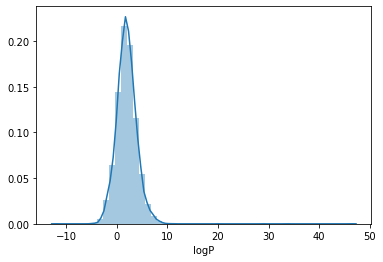

In [40]:
sns.distplot(all_data[VALUE_COLUMN])

In [41]:
ranges = [-20, -10, 0, 10, 20, 30, 40, 50]
all_data[VALUE_COLUMN].groupby(pd.cut(all_data[VALUE_COLUMN], ranges)).count()

logP
(-20, -10]        1
(-10, 0]       2442
(0, 10]       14867
(10, 20]          4
(20, 30]          2
(30, 40]          1
(40, 50]          1
Name: logP, dtype: int64

In [42]:
ranges = [-20, -10, -5, 0, 10, 20, 30, 40, 50]
all_data[VALUE_COLUMN].groupby(pd.cut(all_data[VALUE_COLUMN], ranges)).count()

logP
(-20, -10]        1
(-10, -5]         2
(-5, 0]        2440
(0, 10]       14867
(10, 20]          4
(20, 30]          2
(30, 40]          1
(40, 50]          1
Name: logP, dtype: int64

In [43]:
all_data_clipped_logp = all_data.drop(all_data[all_data[VALUE_COLUMN]>10].index) 
all_data_clipped_logp = all_data_clipped_logp.drop(all_data_clipped_logp[all_data_clipped_logp[VALUE_COLUMN]<-5].index) 
n = all_data_clipped_logp.shape[0]

<AxesSubplot:xlabel='logP'>

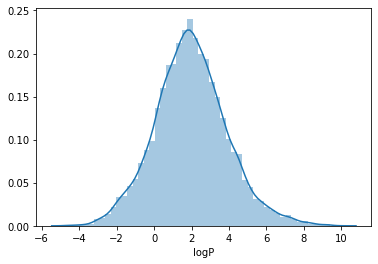

In [44]:
sns.distplot(all_data_clipped_logp[VALUE_COLUMN])

In [45]:
print('Total amount of rows = ', all_data_clipped_logp.shape[0])


Total amount of rows =  17307


### Check Temperature values

* Deleted 1 row with temperature = 257

In [46]:
# check NA temperature
num_of_na_temperature = all_data_clipped_logp[TEMPERATURE_COLUMN].isna().sum()
frac_of_na_temperature = int(100.0*(num_of_na_temperature / n))
print("# of NA values temperature = " + str(num_of_na_temperature) + ", " + str(frac_of_na_temperature) + "%")
temperature_df = all_data_clipped_logp[all_data_clipped_logp[TEMPERATURE_COLUMN].notna()][TEMPERATURE_COLUMN]
temperature_df.describe()

# of NA values temperature = 16522, 95%


count    785.000000
mean      25.519745
std        2.444262
min       25.000000
25%       25.000000
50%       25.000000
75%       25.000000
max       37.000000
Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Temperature'>

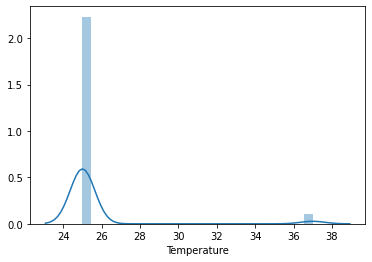

In [47]:
sns.distplot(temperature_df)

In [48]:
ranges = [0, 50, 100, 150, 200, 250, 300]
temperature_df.groupby(pd.cut(temperature_df, ranges)).count()

Temperature
(0, 50]       785
(50, 100]       0
(100, 150]      0
(150, 200]      0
(200, 250]      0
(250, 300]      0
Name: Temperature, dtype: int64

In [49]:
all_data_clipped_logp_temp = all_data_clipped_logp.drop(all_data_clipped_logp[all_data_clipped_logp[TEMPERATURE_COLUMN]>50].index) 
n = all_data_clipped_logp_temp.shape[0]

In [50]:
temperature_df = all_data_clipped_logp_temp[all_data_clipped_logp_temp[TEMPERATURE_COLUMN].notna()][TEMPERATURE_COLUMN]
temperature_df.describe()

count    785.000000
mean      25.519745
std        2.444262
min       25.000000
25%       25.000000
50%       25.000000
75%       25.000000
max       37.000000
Name: Temperature, dtype: float64

In [51]:
print('Total amount of rows = ', all_data_clipped_logp_temp.shape[0])

Total amount of rows =  17307


### Dataset without outliers and duplicated rows

* Temperature values have 2 most common values - 25 and 37
* 2785 duplicated rows have been removed
* Overall statistics - 16014 logP measurements


In [55]:
# let's look at final data
final_data = all_data_clipped_logp_temp[all_data_clipped_logp_temp[VALUE_COLUMN].notna()]
print(final_data.shape)
final_data.describe()

(17307, 4)


logP  Temperature           pH
count  17307.000000   785.000000  1325.000000
mean       1.973972    25.519745     6.872679
std        1.926201     2.444262     2.082032
min       -4.650000    25.000000     2.000000
25%        0.720000    25.000000     5.000000
50%        1.910000    25.000000     7.000000
75%        3.150000    25.000000     7.400000
max        9.960000    37.000000    13.000000

In [56]:
# remove duplicated rows
final_data.duplicated().sum()

2785

In [57]:
final_data = final_data.drop_duplicates()

In [58]:
print(final_data.shape)
final_data.describe()

(14522, 4)


logP  Temperature          pH
count  14522.000000   363.000000  991.000000
mean       2.067099    25.561983    6.728860
std        1.909776     2.538845    2.087958
min       -4.650000    25.000000    2.000000
25%        0.810000    25.000000    5.000000
50%        1.990000    25.000000    7.000000
75%        3.220000    25.000000    7.400000
max        9.960000    37.000000   13.000000

<AxesSubplot:xlabel='logP'>

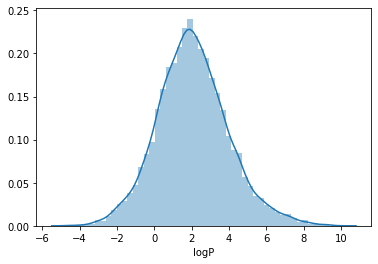

In [59]:
sns.distplot(final_data[VALUE_COLUMN])

### Check duplicated SMILES

* 14191 out of 16014 molecules are unique
* There are two molecules (which look alike: **Nc1ccc(S(=O)(=O)N=c2\[nH\]ccs2)cc1** and **Nc1ccc(S(=O)(=O)N=c2nccc\[nH\]2)cc1**) with 51 and 45 measurements - same logP for each molecule (0.05 and -0.09), Temperature is either 25 or 37 and pH is in some range

In [65]:
final_data[SMILES_COLUMN].unique().size

14102

In [66]:
final_data.shape[0] - final_data[SMILES_COLUMN].unique().size

420

In [67]:
statistics = final_data.groupby(SMILES_COLUMN).count()

In [68]:
statistics[VALUE_COLUMN].describe()

count    14102.000000
mean         1.029783
std          0.208243
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: logP, dtype: float64

In [69]:
ranges = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 60]
statistics[VALUE_COLUMN].groupby(pd.cut(statistics[VALUE_COLUMN], ranges)).count()

logP
(0, 1]      13748
(1, 2]        309
(2, 3]         32
(3, 5]         11
(5, 10]         2
(10, 20]        0
(20, 30]        0
(30, 40]        0
(40, 50]        0
(50, 60]        0
Name: logP, dtype: int64

<AxesSubplot:xlabel='logP'>

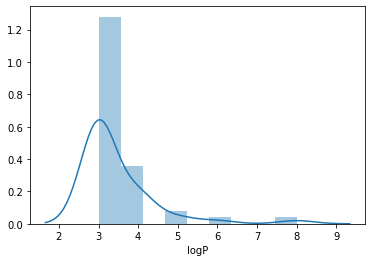

In [70]:
sns.distplot(statistics[statistics[VALUE_COLUMN]>2][VALUE_COLUMN])

In [71]:
statistics.index[(final_data.groupby(SMILES_COLUMN).count()[VALUE_COLUMN]>40).values]

Index([], dtype='object', name='smiles')

### Separate datasets into logP only, logP+pH, logP+T, logP+pH+T

In [74]:
import sys
sys.path
sys.path.append('../scripts/preprocess')
from remove_strange_mols import remove_strange_mols

In [75]:
num_of_strange_molecules = {}

In [76]:
def create_dataset(dataFrame, columns, filename, save_path = "../data/3_final_data"):
    dataset = dataFrame[columns].dropna()
    dataset = dataset.drop_duplicates()
    initial_size = dataset.shape[0]
    dataset.to_csv(os.path.join(save_path, filename), index= False)
    remove_strange_mols(os.path.join(save_path, filename), os.path.join(save_path, filename))
    dataset = pd.read_csv(os.path.join(save_path, filename))
    return dataset, initial_size

In [77]:
PROCESSED_PATH = "../data/3_final_data"

In [78]:
logP_dataset, logP_init_size = create_dataset(final_data, [SMILES_COLUMN, VALUE_COLUMN], 'logP_wo_logp_json.csv')

2020-10-03 19:41:49.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.360 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1(c2ccccc2)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.366 | DEBUG    | remove_st

2020-10-03 19:41:49.422 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.424 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCCc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2 isn't in 

2020-10-03 19:41:49.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CCBr)N1CCN(C(=O)CCBr)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C1CCc2nnnn2CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1ccccc1 isn't in the list of very soluble in wat

2020-10-03 19:41:49.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C1C(=O)C(C(N)=O)C(=O)C2(O)C(=O)C3C(=O)c4c(O)ccc(Cl)c4C(C)(O)C3CC12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.554 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.555 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)S(=O)(=O)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.556 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C(N)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.557 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)[nH]c(=NS(=O)(=O)c2ccc(N)cc2)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.558 | DEBUG   

2020-10-03 19:41:49.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C(=O)NNCc2ccccc2)no1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.623 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1[nH]nc(S(N)(=O)=O)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.625 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)NN=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.626 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN1CCOCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.627 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)O isn'

2020-10-03 19:41:49.688 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.689 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSCCC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.690 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.691 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C1=CCCN(C)C1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(Cc1ccccc1)C(=O)O isn't in the list of 

2020-10-03 19:41:49.754 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CS isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.755 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.756 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.758 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C=CC1=C(C)CCCC1(C)C)=CC=CC(C)=CCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(S(=O)(=O)N=c2nccc[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC(Cl)(Cl)c1ccc(C(C

2020-10-03 19:41:49.821 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.824 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCl isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CI isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#N isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.828 | DEBUG    | remove_strange_mols:check_not_stran

2020-10-03 19:41:49.887 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.888 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=CC(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.889 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCC(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.890 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.891 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.892 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(Cl)(Cl)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03

2020-10-03 19:41:49.951 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(C#N)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CC(O)(CC(=O)O)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CO)(CO)CO isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC[Pb](CC)(CC)CC isn't in the list of very soluble in water molecules
2020-10-03 19:41:49.959 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CC1(O)CCCCC1 isn't in the list of very soluble in 

2020-10-03 19:41:50.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OC(C)(C)C1CC=C(C)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(=NS(=O)(=O)c2ccc(N)cc2)[nH]n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.022 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOS(=O)(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.023 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(OOC(C)(C)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.024 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=C

2020-10-03 19:41:50.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1c2ccccc2C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1ccccc1C(=O)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.089 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCCCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.091 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.093 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule 

2020-10-03 19:41:50.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=O)C(O)C(O)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.155 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(O)cc(C)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.156 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.157 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CC)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.158 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CN1CCCC1=O isn't in the list of very sol

2020-10-03 19:41:50.220 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.224 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.225 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]nnc2ccccc12 isn't in the list of very soluble in water molecules
2

2020-10-03 19:41:50.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.295 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(N2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(N2CCNCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.297 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OC(OC(C)=O)c1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc2cc3ccc(N)cc3nc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Brc1ccc(-c2ccccc2)cc1 isn

2020-10-03 19:41:50.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.360 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(OCCO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(OOC(=O)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(C=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(OCc1ccccc1)c1cccnc1 isn't i

2020-10-03 19:41:50.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(C2CO2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC(Br)CBr isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.432 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)CC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.434 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC(Cl)CCl isn't in the list of very soluble in water molecules
2020

2020-10-03 19:41:50.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OB(O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=C(C)c1ccccc1 isn't in the list of very soluble

2020-10-03 19:41:50.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.554 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.555 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.556 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.558 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(=O)O)cc1 isn't in the list of very soluble in w

2020-10-03 19:41:50.616 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C1CN2CCC1CC2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1nc(=Nc2ccccc2Cl)nc(Cl)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OC(=O)Nc1cccc(Cl)c1 isn't in the list 

2020-10-03 19:41:50.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.690 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.692 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=CNc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50

2020-10-03 19:41:50.757 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)CC(=O)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC(=S)NCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.761 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(C)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.763 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(O)c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 

2020-10-03 19:41:50.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC=NO isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.832 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.833 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=C(C)CC(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OP(C)(=O)F isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.835 | DEBUG    | re

2020-10-03 19:41:50.891 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.900 | DEBUG 

2020-10-03 19:41:50.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC=CC=CC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCBr isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCN isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC#N isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCCCCN isn't in the list of very soluble in water molecules
2020-10-03 19:41:50.966 | DEBUG    | remove

2020-10-03 19:41:51.025 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCCOCCOC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.026 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.027 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.028 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOCCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.029 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOCCOCCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:5

2020-10-03 19:41:51.089 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=CC(C)(C)SC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.090 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S(=O)(c1ccc(Cl)cc1)c1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.094 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.095 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1c(Cl)c(Cl)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C2C(

2020-10-03 19:41:51.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2cc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C=O)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S(=O)(O)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(CCN)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)COc1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc(C=O)cc1OC isn't in the list of ve

2020-10-03 19:41:51.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.200 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]c(OC)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C

2020-10-03 19:41:51.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCNCC=C isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.251 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCCCCCCC isn't in the list of very soluble in water molecules
2

2020-10-03 19:41:51.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(S(=O)(=O)O[Na])c2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.301 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C=CC(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc(Cl)c2cccnc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccccc1C(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOC(=O)c1ccccc1C(=O)OCCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCOC(=O)c1ccccc1C(=O)

2020-10-03 19:41:51.353 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=S)S[Zn]SC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.354 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)CO isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.356 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.357 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCc1ccccc1OC1OC(CO)C(O)C(O)C1O isn

2020-10-03 19:41:51.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(O)C(C)(C)CO isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)CI isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(S(=O)(=O)N=c2cccc[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C1CCC2C3CC=C4CC

2020-10-03 19:41:51.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1cc[nH]c(=S)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCCCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C1=c2ccc3c4c(ccc(c24)=C1)=CC=3 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cnc2c(c1)cc1ccc3cccc4ccc2c1c34 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cc2ccc3ccc4ccc5ccc6ccc1c1c2c3c4c5c61 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cc2ccc3ccc4ccc5

2020-10-03 19:41:51.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)Oc1ccccc1O2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)Oc1ccccc1S2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2cc3sccc3cc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cc2ccsc2cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2nocc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2occc2c1 isn't in the list of very soluble in wa

2020-10-03 19:41:51.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=O)(OC)OC(Br)C(Cl)(Cl)Br isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.598 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC=CCC=CCC=CCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.599 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCS(=O)CCSP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.600 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NN isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.601 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(O)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#CC(CCN1CCC(C(N)=O)(N2CCCCC2)CC1)(c1ccccc1)c1cc

2020-10-03 19:41:51.658 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CON(C)C(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1cc(C(C)C)cc(C(C)C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C=Cc1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.667 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=S)(OCC)Oc1cc(C)

2020-10-03 19:41:51.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC(O)C=CC1C(O)CC(=O)C1CC=CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Fc1cc(F)c(F)c(F)c1F isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.727 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cc(F)ccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.729 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.731 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule 

2020-10-03 19:41:51.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)COc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccc(F)cc1 isn't in the list of very soluble

2020-10-03 19:41:51.843 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(=O)O)cc1F isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.844 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.845 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Fc1cccc(CCl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule FC(F)(F)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule FC(F)(F)Sc1ccccc1 isn't in the list of very soluble in water mo

2020-10-03 19:41:51.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(OCC)OC(=CCl)c1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CCC12C isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C=CC(=O)c2c(O)ccc(O)c21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(=O)C(O)C3 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.918 |

2020-10-03 19:41:51.982 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)CCC2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.984 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)COC2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.985 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)CCO2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:51.988 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1ccocc1O isn't in the list of very soluble in water molecu

2020-10-03 19:41:52.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(OC(C)=O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.049 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1(C2=CCCCCC2)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=C1C(=O)OC2C1CCC(C)C1=CCC(=O)C12C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(O)(c1ccc(Cl)cc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-10-03 19:41:52.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccccc1C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.113 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.115 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1cnc2[nH]c(=N)[nH]c(=N)c2n1)c1c(Cl)cc(C(=O)NC(CCC(=O)O)C(=O)O)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccccc1C#N isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecu

2020-10-03 19:41:52.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.186 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOCc1ccccc1 isn't in the list of very soluble in water mo

2020-10-03 19:41:52.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(C)=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CC(c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1cnc2[nH]c(=O)[nH]c(=O)c21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN

2020-10-03 19:41:52.313 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C1(c2ccccc2)CCN(CCC(O)c2ccccc2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.314 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=CCC(O)(C(C)C)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=S)(OCC)SCSP(=S)(OCC)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNC(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.319 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C1OC1C1CO1 isn't in the list of 

2020-10-03 19:41:52.379 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccccc1NC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.380 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc2cc3ccccc3nc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc2ccccc2cc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc2cc(C)ccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc2cc(O)ccc2c1 isn't in the list of very sol

2020-10-03 19:41:52.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(O)CCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(O)CCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(O)CC isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CCC(O)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CCC(=O)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:5

2020-10-03 19:41:52.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(Cl)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S(=O)(NO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(S(=O)(=O)N=c2cc[nH]cn2)cc1 isn't in the list of very so

2020-10-03 19:41:52.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cccc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1c(Br)cccc1Br isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(O)ccc(O)c1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1cc(Cl)c(Cl)c(Cl)c1 isn't in the list of very soluble i

2020-10-03 19:41:52.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)Cc1ccccc1C2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(-c2ccc(C)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.651 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)c1ccccc1 isn't in the

2020-10-03 19:41:52.715 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cc([N+](=O)[O-])ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cccc(CO)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccc(N)cc1

2020-10-03 19:41:52.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ON=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.771 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule [N-]=[N+]=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.779 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCSc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC(Cl)=Nc1ccccc1 isn't in the list of very soluble in water molecu

2020-10-03 19:41:52.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCc1cccc(CCl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Brc1cc(Br)cc(Br)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in wa

2020-10-03 19:41:52.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(Cl)cc1C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(Cl)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)CCCN2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(-n2cccc2)cc1 isn't in the list of very 

2020-10-03 19:41:52.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(-c2ncc[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.979 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1cc(C)c(C)cc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:52.980 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNNCc1ccc(C(=O)NC(C)C)cc1 isn't in

2020-10-03 19:41:53.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(O)c(C)c(C)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.046 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc([N+](=O)[O-])c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.049 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC(Cl)(Cl)Sc1ccccc1 isn't in the list of v

2020-10-03 19:41:53.113 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCC(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(C)(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.115 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(N=O)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)C(=O)SCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CN(N=O)C(N)=O isn't in the list of very soluble in water molecules
2020-

2020-10-03 19:41:53.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccsc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.175 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1CCCCC1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1ncccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(O)ccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-

2020-10-03 19:41:53.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cccs1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=Cc1ccncc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(C2CC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S(O[Na])c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10

2020-10-03 19:41:53.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1cccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN1CCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C=CCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.319 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ncccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N1CCCC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN1CCCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.32

2020-10-03 19:41:53.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(COc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CCCCCCCCCCCN1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cc2ccccc2c2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccccc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(N)Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(N=C1SCC(C)S1)OCC isn't in th

2020-10-03 19:41:53.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(C2CCCN2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=c1[nH]c(Cl)nc(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(-c2ccccn2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCCNC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(C(C)=O)cc1 isn't in the list of ver

2020-10-03 19:41:53.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)S(=O)(=O)N(SC(F)(Cl)Cl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.517 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C=NC(c2ccccc2)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.518 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C(=Nc2ccccc2)C(Cl)C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.519 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)CSP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.524 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - Th

2020-10-03 19:41:53.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C(Cc1ccccc1)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(C=CC(=O)O)ccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1ccc(C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)Nc1cccc(NC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1(CC(C)C)C(=O)NC(=O)N

2020-10-03 19:41:53.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.651 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(OC(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.654 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.655 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C(O)c1ccccc1)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.656 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cc2ccccc2[nH]1 isn't in the list of ver

2020-10-03 19:41:53.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1ccccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccccc1-c1ccccc1N isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1noc(-c2ccccn2)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CN(N=O)CC(C)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=O)Nc1ccccc1 isn't in the list of very soluble in

2020-10-03 19:41:53.750 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.751 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.752 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(O)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.753 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.753 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(Cl)ccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.754 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[PH](=O)(O)c1cc

2020-10-03 19:41:53.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CCCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CCC=C1c2ccccc2COc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C(N)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1cc2cc

2020-10-03 19:41:53.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1)c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cc(C)ccc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Oc1ccc(Cl)cc1)N1CCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC[Pb](C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC[Pb](C)(C)CC isn't in the list of very soluble in water

2020-10-03 19:41:53.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(OCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cccc(CO)c1 isn't 

2020-10-03 19:41:53.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]c(=N)c2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc(S(N)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.959 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNC(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=c1[nH]c(Cl)nc(=NC(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:53.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)c1nc(=NC(C)

2020-10-03 19:41:54.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCSC(=O)N(CC(C)C)CC(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.023 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.024 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1ccc(O)c(C)c1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.025 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.026 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C

2020-10-03 19:41:54.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C1NCCCN1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.073 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C(=O)C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=Nc1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC=CC#CC#CC#CC=CC(Cl)CO isn't in the list of very soluble in wat

2020-10-03 19:41:54.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(=O)OC1(C(=O)CO)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc(O)cc1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.127 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1c2ccccc2C(=O)C1c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.128 | DEBUG    | remove_strange_mols:check_n

2020-10-03 19:41:54.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.175 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=O)(OC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCCC(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCC#N isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccccc1Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cccc2c(N)ccc

2020-10-03 19:41:54.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1=CC(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.225 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.227 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.228 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cc([N+](=O)[O-])c2c([N+](=O)[O-])cccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.228 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(=O)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)N(CC

2020-10-03 19:41:54.275 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.276 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccncn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.277 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCN isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.279 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=S)c1ccccc1N isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.280 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc(OCCN(C)C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.280 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cncc(Cl)c1 isn't in the list of very soluble 

2020-10-03 19:41:54.325 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOP(=O)(OCCCC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.326 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.327 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc2c(ccc3ccccc32)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.328 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule BrC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCC1(CC(C)O)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.332 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1c(O)c(Cl)c(Cl)c(Cl)c1Cl is

2020-10-03 19:41:54.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=S)(OC)Oc1ccc(C#N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.375 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=c1cccc[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.376 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=S)(OCC)SCn1nnc2ccccc2c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.377 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cc2c3ccccc3ccc2c2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.378 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)CNC(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.379 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNC(=O)Nc1

2020-10-03 19:41:54.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc2c(c1)N(CCCN1CCN(CCO)CC1)c1ccccc1S2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1cc(C)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC1(C(=O)O)CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.431 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)C=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.432 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc(Cl)c(Cl)c1)C1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.432 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCc1cc(=O

2020-10-03 19:41:54.481 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C=NC(c2ccccc2)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)N=c1[nH]c(Cl)nc(=NCCO)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)c(C#[N+][O-])c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C

2020-10-03 19:41:54.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cccc(OC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(C=Cc1ccccc1)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CON(C)C(=O)Nc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1c(O)cc(C)c(O)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(OCC)Oc1ccc(SC)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=S)(OCC)Oc1ccc(SC)cc1 

2020-10-03 19:41:54.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(C=C[N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C=C[N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)NC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccco1 isn't in t

2020-10-03 19:41:54.637 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.638 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cnnc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cn(C2CCC(CO)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The m

2020-10-03 19:41:54.688 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.689 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(=O)NN)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.689 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(=O)ss1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.691 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cssc1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.692 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1(C2=CC3CCC(C2)C3)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cc1ccccc1)N1CCCCC1 isn't in the list of very solu

2020-10-03 19:41:54.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)c1ccccc1OC(=O)NC isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.741 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1ccc(C(C)C)c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(N(CCO)CCO)ccc1N=Nc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1cc2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.746 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-10-03 19:41:54.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1cc(C)ccc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOc1cccc(OC(=O)NC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOc1ccc(OC(=O)NC)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.797 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(C=Cc1ccco1)c1ccco1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.798 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(C#N)=NNc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.799 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1ccccc1Br isn't in t

2020-10-03 19:41:54.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Brc1cccc(Br)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1)c1cc(Cl)cc(Cl)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1ccc([N+](=O)[O-])c[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C(=O)O)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.871 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C

2020-10-03 19:41:54.934 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOC(=O)C1=C=CC(=O)NC(=O)N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.937 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:54.940 | DEBUG    | remove_strange_mols:check_not_strange_mo

2020-10-03 19:41:54.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)CC2OC2=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]c2ccccc2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]cco1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C(=O)O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.005 | DEBUG    | remove_strange_mols

2020-10-03 19:41:55.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc([N+](=O)[O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CCC2CCCCC2C1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(N=c1ccn(C2CC(O)C(CO)O2)c(=O)[nH]1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc([N+](=O)[O-])c1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - 

2020-10-03 19:41:55.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(-c2cnc3ccccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1CC=C(c2ccc(Cl)cc2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1cncc[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ncccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CCC(=O)N1C isn't in the list

2020-10-03 19:41:55.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.187 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(C7COC(=O)C7)CCC65O)C4)OC3C)OC2C)CC(O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1cc(O)n(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(N)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.191 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1c2ccccc2ncn1O isn't in the list of very soluble in water molecule

2020-10-03 19:41:55.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(c1ccccc1)c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc([N+](=O)[O-])cc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(N=O)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C=Cc1ccc(N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1cnc2cc(C)ccn2c1=O isn'

2020-10-03 19:41:55.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1cncc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=S)(OC)Oc1nc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)Nc1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.319 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ncccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN1CCNCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCCc1ccccn1 isn't in the list of very soluble 

2020-10-03 19:41:55.375 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CC=C(C)CC21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.376 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1ccn(C2C=CC(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.378 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CCC(c2cccnc2)N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.379 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cn(C2C=CC(CO)O2)c(=O)[nH]c1=S isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.380 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1ccn(C2CCC(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The

2020-10-03 19:41:55.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NCCO)c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1(CCC(C)C)C(=O)NC(=O)N(C)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.445 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1cncc[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NCO)c1ccccc1 isn

2020-10-03 19:41:55.504 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc(Cl)cc1)c1cccc([N+](=O)[O-])c1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.505 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)CCCCn1c(=O)c2c(ncn2C)n(C)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.506 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cn(CCN2CCOCC2)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cncn1CCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.508 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(CSSCC(NC(C)=O)C(N)=O)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.510 | DEBUG    | remove_strange_mols:check_not_s

2020-10-03 19:41:55.557 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cc2n(n1)CCN2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1c2ccccc2C(=O)C1c1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CC(C)(C)CC(OOC(C)(C)C)(OOC(C)(C)C)C1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCC1OC(n2ccc(=N)[nH]c2=O)C(OC(C)=O)C1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-10-03 19:41:55.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1[nH]cnc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)Nc1cccc(NS(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.651 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.655 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(N=O)ccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.657 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(N)=S isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.658 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)c1cccnc1 isn't in the list of v

2020-10-03 19:41:55.729 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.730 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C1CCCCCN1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.731 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S(=O)(CCl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.734 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=Cc1ccc2cccccc1-2 isn't in the list of

2020-10-03 19:41:55.799 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.800 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc(O)n1-c1ccccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.801 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.802 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ncc(NS(=O)(=O)c2ccc(N)cc2)c(C)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NCC(O)c1ccc([N+]

2020-10-03 19:41:55.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1c(N)c(NC=O)c(=O)n(C)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(CP(=O)(OCC)OCC)OCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.864 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)CNC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=Nc1ccc(N=Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=Nc1ccc2cc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.873 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cccc2c1ccc[n

2020-10-03 19:41:55.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(C(=O)C=CN2CC=CC2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=O)(OC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc2c(c1O)C(=O)C1C(=O)C3(O)C(=O)C(C(N)=O)C(=O)C(N(C)C)C3CC1C2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc(O)c2c1CC1CC3C(N(C)C)C(=O)C(C(N)=O)C(=O)C3(O)C(=O)C1C2=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:55.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1OC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(CCC6C5CCC5(C)C(c7coc(O)c7)C(OC=O)CC65O)C4)CC3OC=O)CC2OC=O)CC(OC=O)C1

2020-10-03 19:41:56.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(=O)C(O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CO)n1cnc2c(=N)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.006 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(S(=O)(=O)N(C)C(=O)c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc

2020-10-03 19:41:56.067 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.068 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cc1ccccc1)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cc1ccccc1)Nc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1)NC1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - Th

2020-10-03 19:41:56.129 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=C(C2CC2)Nc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=CCC2C(C1)C2(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.138 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1nccnc1C#N isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1ccn(C2OC(CO)C(O)C2O)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC(=O)Nc1cccc

2020-10-03 19:41:56.196 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule FC(F)OC(F)(F)C(F)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.198 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1nc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.200 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(CCO)c1nc(=Nc2ccc(C=Cc3ccc(N=c4[nH]c(N(C)CCO)nc(=Nc5ccccc5)[nH]4)cc3S(=O)(=O)O[Na])c(S(=O)(=O)O[Na])c2)[nH]c(=Nc2ccccc2)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Oc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.210 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN(CCCl)C(=O)NC1CCC(NC(=O)N(CCCl)N=O)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41

2020-10-03 19:41:56.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)CC(=O)CCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.273 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc2c1c([N+](=O)[O-])cc[n+]2[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.274 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc2c([N+](=O)[O-])cc[n+]([O-])c12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.278 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC1C2CCC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.279 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.281 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc

2020-10-03 19:41:56.337 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.338 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)CS(=O)(=O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc(O[Na])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=c1cc(Cc2ccccc2)ss1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cnc(C)c(C)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1

2020-10-03 19:41:56.401 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)CCC(C)(C)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)c2oc(=O)sc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CCN(N=O)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC(Cl)C(Cl)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(Oc1ccc(Cl)cc1Cl)C(=O)O isn't in the list of very 

2020-10-03 19:41:56.468 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C=C(C(C)=O)C(C)=O)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1ccccc1Cl)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.471 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1cccc(Cl)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.473 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1ccccc1OC)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.474 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The

2020-10-03 19:41:56.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C(N)NC(=O)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])OC1COC2C(O)COC12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.541 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)nc(Cl)c1 isn't i

2020-10-03 19:41:56.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.592 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.594 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CCC2(O)C3Cc4ccc(O)c5c4C2(CCN3CC2CC2)C1O5 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cccc(-c2ccccc2)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(-c2cc(Cl)ccc2Cl)cc1 i

2020-10-03 19:41:56.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.646 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(Sc1ccccc1)Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=NCc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccncn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.651 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cncnc1 isn't in the list of ver

2020-10-03 19:41:56.696 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1nonc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.697 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1no[nH]c1=N isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.698 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.699 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOC(=O)NC isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.700 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)NN isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc(Cl)c(Cl)c1Cl isn't in the list of very solubl

2020-10-03 19:41:56.748 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(Cc2nn[nH]n2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.749 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(COc1ccccc1)N1CCOCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.750 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1cn[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.751 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CC12COC(=O)C(=C)C1C1OC(=O)C(=C)C1C(O)C2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.752 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.755 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1[nH]c(=N

2020-10-03 19:41:56.800 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.801 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.802 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC1OC(CO)C(O)C(O)C1O isn't in the list of very

2020-10-03 19:41:56.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=CNc2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=CNc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.851 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.852 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=S)NN=Cc1ccc(O)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=NCc1ccc2ccccc2c1 isn't in the lis

2020-10-03 19:41:56.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(=C)C1C(O)C3OC3(C)C21O isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CCl)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.904 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.905 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)N(Cc1cccnc1)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCCc1cccnc1 isn'

2020-10-03 19:41:56.950 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(C=CC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.951 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C=Cc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C=Cc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)cc(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(C)C)c(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:56.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCC1OC(Oc

2020-10-03 19:41:57.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CCCC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc(C)c1NC(=O)CN(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)C=CC=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-10-

2020-10-03 19:41:57.049 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1cnc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]c(C=Cc2ccc([N+](=O)[O-])o2)no1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc([N+](=O)[O-])c(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1ccc(C(=O)OC)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecu

2020-10-03 19:41:57.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)N1CCCC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)C(C)NC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(c1ccccc1)c1ccc(NS(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(c1ccccc1)c1cccc(NS(=O)(=O)C(F)F)

2020-10-03 19:41:57.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc(Cl)c1Nc1ccccc1CC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1ccc2c(c1)C(c1ccccc1)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N)C(O)C(C)O1)CC(O)(C(=O)CO)C=4 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.155 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)N1CCOC(c2ccccc2)C1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.156 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=Nc1ccc(Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.157 | DEBUG    | remove_strange_m

2020-10-03 19:41:57.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)c1cnc([N+](=O)[O-])n1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cnc([N+](=O)[O-])n1CCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[PH](=O)(O)CN(CCCCCCN(C[PH](=O)(=O)O)C[PH](=O)(=O)O)C[PH](=O)(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-10-03 19:41:57.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C1C(C=C(C)C)C1(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOP(=S)(OCCC)SCC(=O)N1CCCCC1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)N=C(N=c2[nH]cc([N+](=O)[O-])s2)OC1(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1c[nH]c(=NC2=NCCO2)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cnc(N=C2OCCN2CCO)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.260 | DEBUG    | remove_strange_mols:check_not_strang

2020-10-03 19:41:57.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=c1nc(C(Cl)(Cl)Cl)nc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)C1CCCN1C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CC)COC(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The mole

2020-10-03 19:41:57.358 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCN(CCC)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccco1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.360 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N=[N+]=[N-])C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule BrC=CBr isn't in the list of very soluble in water molecules
2020-

2020-10-03 19:41:57.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cccc2c1CCNCC2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCCc1cccc(S(=O)(=O)O[Na])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(c1ccccc1)c1ccc(N=C=S)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CC1CC1)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.413 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccccc1OP(=O)(Oc1ccccc1)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.414 | DEBUG    | remove_strange_mols:check_not_

2020-10-03 19:41:57.459 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1nnc(C)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.460 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CN1CCCCC1)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.463 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=C1NC(=O)C(=CC=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.463 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.464 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.465 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-10-03 19:41:57.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C#N)=NNc1ccc(S(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.525 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(C#N)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.526 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C#N)=NNc1c(Cl)cc(C(F)(F)F)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C#N)=NNc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C#N)=NNc1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.530 | DEBUG    | r

2020-10-03 19:41:57.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.589 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cnc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)cc2)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCON=C(OC(=O)c1ccccc1)c1c(OC)ccc(Cl)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NCC(O)COc1cccc(CC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NCC(O)COc1ccc(CC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.596 | DEBUG

2020-10-03 19:41:57.646 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1cc(O)n(Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc2c(c1)C(c1ccccc1Cl)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C(=O)CN=C(c2c(Cl)cccc2Cl)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.652 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(C23CC4CC(CC(C4)C2)C3)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.653 | DEBUG    | remove_strange_mols:check_not_st

2020-10-03 19:41:57.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CN(C)C(N=c2[nH]cc([N+](=O)[O-])s2)=N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1CCN(C)C1=Nc1ncc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CN=C(N=c2[nH]cc([N+](=O)[O-])s2)N1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC(CCC)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1CC(OC2CCC3(C)C2CCC2C3CCC3(C)C(c4coc(O)c4)CCC23O)OC(C)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.729 | DEBUG    | remove_strange

2020-10-03 19:41:57.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=C(NC)NC#N isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1c([N+](=O)[O-])ncn1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CC(Oc2ccc3ccccc3c2)N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecul

2020-10-03 19:41:57.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCOC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.854 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Oc1ccccc1C(=O)OCn1c(O)ccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)ON=c1cc[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCCOC(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(-c2cc(Cl)c(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule

2020-10-03 19:41:57.918 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cccc(Cl)c1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cccc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1cc(N(CCO)CCO)ccc1NCCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(-c2ccccc2)c(Cl)c1 isn'

2020-10-03 19:41:57.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Fc1cncc(F)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Fc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.979 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1C=CC(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.981 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)cc2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.982 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)N(C)c1nnc(C(C)(C)C)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:57.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NCC(=O)NC(Cc1ccccc1)C(N

2020-10-03 19:41:58.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=C(C(=O)O)N2C(=O)C(NC(=O)Cc3cccs3)C2SC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CCC[N+]1([O-])c2ccccc2Sc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(N2CCNCC2)nc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(OC)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C(=O)C(O)CC1c1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-10-03 19:41:58.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1[nH]c(C)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1c([N+](=O)[O-])nc(C)n1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(-c2ccccc2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)ccc2Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - Th

2020-10-03 19:41:58.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1nccn1CCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NC(=O)n1cc(O)n(-c2cc(Cl)cc(Cl)c2)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Fc1ccccc1C1=NCC(=S)N(CC(F)(F)F)c2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.187 | DEBUG    | remove_strange_mols:check_not

2020-10-03 19:41:58.233 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=C(C2CCCCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.235 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=C(C2=CCCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=C(C2CC=CC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S1(=O)N=C(C2CC=CCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.239 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 -

2020-10-03 19:41:58.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cnccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2ccccc2cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.312 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.313 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.314 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The mo

2020-10-03 19:41:58.372 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CS(=O)(=O)c1ccccc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(N(C)C)c(=O)n(C)c(=O)n1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.375 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.376 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.377 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=S)NCCSCc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.378 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N(C)Nc1ccccc1 isn't in

2020-10-03 19:41:58.435 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1cc2cccc(OCC(O)CNC(C)C)c2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.436 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.437 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NCc1ccc(OCC(O)CNC(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=S)(OCC)Oc1cccc(F)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.441 | DEBUG    | remove_strange_mo

2020-10-03 19:41:58.502 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(NN=C(C#N)C#N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.503 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cncc(C#N)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.504 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cncc(N(C)C)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.505 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cncc(C(N)=O)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc2oc3ccccc3c(=O)c2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.508 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1ccc2ccccc2n1 isn't in th

2020-10-03 19:41:58.569 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1cncc(C)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.570 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1OC(CNC(=O)N(C)N=O)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc(O)n1-c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCSP(=O)(OCC)Oc1ccc(Br)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C(Cl)=C(Cl)C(=O)N1c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cc

2020-10-03 19:41:58.635 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.636 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.637 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cc(Oc2ccc(Cl)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.638 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C(=O)NC(C)(C)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.641 | DEBUG    | remove_strange_mo

2020-10-03 19:41:58.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CF)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Br)(Br)Br isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cc1ccccc1)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.706 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#CC(C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.707 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CC)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 1

2020-10-03 19:41:58.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)CSc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.767 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1ccc(=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.771 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(CC)SCCSCC isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.772 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOC(=O)C(C(=O)OCCC)=C1SCCS1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOC(=O)C(C(=O)OCCCC)=C1SCC

2020-10-03 19:41:58.836 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccc2c(c1)=C(c1ccccc1F)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.837 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCSC(=Nc1cccnc1)SCc1ccc(C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.838 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)COc1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.839 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C)Oc1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.841 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.842 | DEBUG    | remove_strange_mols:check_not_strange_m

2020-10-03 19:41:58.905 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCCC(=O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccsc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1OCC(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.908 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1OC(CO)C(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1OC(CO)C(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)

2020-10-03 19:41:58.969 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cc(=S)ss1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.970 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)(C)COC(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.971 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1c(O)ccc(O)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.973 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:58.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=C1

2020-10-03 19:41:59.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc(N2CCNC2=S)o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC1=NCCN1c1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NC(=O)C=Cc1ncc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.037 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)N(C)C(=O)Nc1ccccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.038 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.039 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(C

2020-10-03 19:41:59.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)c1ccc(OC(=O)NC)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1COCS1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1SCOC1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1COCCS1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC1OCSC1=NOC(=O)NC isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1SCOC1C(C)C isn't in the list of 

2020-10-03 19:41:59.159 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(O)C(Oc1ccc(-c2ccccc2)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cc(NC(C)=O)cc(CC)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.163 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.166 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CCNC(=O)c1cc(F)ccc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.167 | DEBUG    | remove_strange_mols:check_not_strange

2020-10-03 19:41:59.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(=O)CS(C)(=O)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.224 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.226 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.227 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1CC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CCC4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)OC(C)C1OC1CC(O)C(O)C(C)O1 isn't in the list

2020-10-03 19:41:59.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]c(N2CCOCC2)cc(N)[n+]1[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.290 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]c(N2CCCC2)cc(N)[n+]1[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.291 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.292 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNc1cc(N)[n+]([O-])c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OCCN(C)Cc2ccccc2)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.300 | DEBUG    | remov

2020-10-03 19:41:59.357 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(=O)Oc2cccc(F)c2)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(=O)Oc2ccc(F)cc2)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.360 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(=O)Oc2ccccc2Cl)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(=O)Oc2cccc(Cl)c2)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 -

2020-10-03 19:41:59.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C[N+]([O-])=C(c2ccccc2)c2cc(Cl)ccc2N1CCO isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O[Na])C1CC1C#Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.431 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1CC(Cl)C(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.432 | DEBUG    | remo

2020-10-03 19:41:59.490 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N(C)CCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1c[nH]c(Cl)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.498 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=N

2020-10-03 19:41:59.548 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CN1CCCCC1)Nc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CN1CCCCC1)Nc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.550 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)Cc1cc(C(=O)NN)ccn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.554 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cc(C(=O

2020-10-03 19:41:59.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOC(=O)c1cccs1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCN1CCCC1CNC(=O)c1cc2[nH]nnc2cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.623 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(N)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCC(O)c1cccc

2020-10-03 19:41:59.679 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)c1ccsc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.680 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1c(C)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.681 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CNC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOc1ccc(CC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1)NC(CO)

2020-10-03 19:41:59.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc(O)n1-c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.746 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCNC(=O)c1ccco1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.748 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.749 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN(CCCl)C(=O)NCCCCNC(=O)N(CCCl)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.750 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=NN(CCCl)C(=O)NCCO isn

2020-10-03 19:41:59.814 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1CC(O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C(N)N=Nc1ccc(NNC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOc1cc(N)ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CCOc1cc(N)ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.820 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(N(C)C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.822 | DEBUG    | remove_strange_mols:check_not_strang

2020-10-03 19:41:59.878 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#CN=[N+]([O-])c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.879 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#CN=[N+]([O-])c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc([N+]([O-])=NC#N)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.884 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.885 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The mol

2020-10-03 19:41:59.940 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)N(C)SN(C)C(=O)ON=C(C)SC isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.943 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCNC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.944 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.946 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cc(O)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.947 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1nc(N(C)C)nc(N(C)O)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:41:59.948 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - T

2020-10-03 19:42:00.005 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)COC21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.006 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)NCC(O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CCNC(=O)c1ccccc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.009 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CCNC(=O)c1cc(C#N)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.011 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1nc(-c2cccc(SC(F)(F)F)c2)[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.012 | DEBUG    | remove_stran

2020-10-03 19:42:00.068 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.076 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.077 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.078 | DEBUG    | remove_strange_mols:ch

2020-10-03 19:42:00.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCCOC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.138 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N(CCO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]cnc2[nH]cnc12 isn't in the list of very soluble in water molecules
2

2020-10-03 19:42:00.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1ccccc1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1ccccc1CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCN(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CON(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.212 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(N)=O)cc1N=NN(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1cc(C#N)cc(C#N)c1 is

2020-10-03 19:42:00.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCC1OC(n2ccnc2[N+](=O)[O-])C(OC(C)=O)C(OC(C)=O)C1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.268 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CN(N=O)CC(C)N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The mole

2020-10-03 19:42:00.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(=O)CC(C(O)C(C)(C)C)n1cncn1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)Oc1ccccc1OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CON=CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NNC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=C(C)c1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC

2020-10-03 19:42:00.402 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cn(C23CC4CC(CC(C4)C2)C3)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)CCc1c[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(NCc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(C)c(O)cc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1cc

2020-10-03 19:42:00.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1c(C)nc2n(c1=O)C(C)CCC2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCc1c(C)nc2ccccn2c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.477 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1nc2cccc(C)n2c(=O)c1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.478 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCc1nc2cccc(C)n2c(=O)c1CC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.479 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)cc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.481 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule 

2020-10-03 19:42:00.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(S(=O)(=O)CCC(C)C)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(S(=O)(=O)CC(O)c2ccccc2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.542 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCN(C)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.543 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCN(CCCC)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.544 | DEBUG    | remove_strange_m

2020-10-03 19:42:00.605 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)NC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.606 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=NN=C(N)N)c1cccs1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.612 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.614 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CC(C)(C)CC(c2ccccc2)(N2CCCCC2)C1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.615 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CC1CCCCC1)N1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.620 | DEBUG    | remove_strange_mols:check_not_str

2020-10-03 19:42:00.674 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(=Cc1ccco1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.677 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1OC2(CCCC2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.679 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1-n1cccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.680 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 

2020-10-03 19:42:00.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(Cn1ccnc1)c1ccc(CCc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.741 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)nc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)OC1C(C)OC(OC2C(C)OC(OC3C(CC=O)CC(C)C(O)C=CC=CCC(C)OC(=O)CC(O)C3OC)C(O)C2N(C)C)CC1(C)OC(=O)CC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=O)CC1 isn't in the list of very soluble in water mole

2020-10-03 19:42:00.801 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1c([N+](=O)[O-])cnc1C1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.802 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ncc([N+](=O)[O-])n1CC(O)Cn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CC(O)Cn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=Cc1cc(Br)ccc1Br isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1CCN(CCn2cncc2[N+](=O)[O-])CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.807 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-10-03 19:42:00.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCOCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.864 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCN(C)CC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCNCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.867 | DEBUG    | remove_strange_mols:check_not_s

2020-10-03 19:42:00.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.927 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N(C)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(C(=O)NC2CC3CCC(C2)N3Cc2ccccc2)c1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSCOC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.932 

2020-10-03 19:42:00.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:00.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)On1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1[nH]c(=O)n(OCC(C)C)c(=O)c1Br isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.005 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The m

2020-10-03 19:42:01.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(NC(N)=O)ccc1Br isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.062 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Oc1cc(OC(C)CCCc2ccccc2)cc2c1C1CC(O)CCC1C(C)N2C isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Brc1cc2ccccc2nn1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.064 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - T

2020-10-03 19:42:01.134 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cc1cccnc1)NN1CC=CCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(=O)NN1CC=CCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NN1CC=CCC1)C1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NN1CC=CCC1)c1ccco1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NN1CC=CCC1)c1cccs1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Brc1cccc(-c2cc3ccccn3c2)c1 isn'

2020-10-03 19:42:01.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(Cl)c(Cl)c(C(C)C)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(C)C)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)CON(Cc2ccccc2Cl)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CC)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])cc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(=O)NS(=O)(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.205 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-10-03 19:42:01.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.268 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.271 | DEBUG    | remove_str

2020-10-03 19:42:01.330 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1C(C)(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.331 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.332 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OCC#N isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)COc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.336 | DEBUG    | remove_st

2020-10-03 19:42:01.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(CN(C)N=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.397 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1ccc(F)cc1)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1ccc(Cl)cc1)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.399 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1ccc(C#N)cc1)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.400 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1ccc([N+](=O)[O-])cc1)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.402 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)CCc1ccccn1 isn't in the li

2020-10-03 19:42:01.459 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(CNC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.460 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCC(c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.461 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCC(CC(C)C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.462 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(S)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.464 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C(c1ccc(OC)cc1)c1ccc(OC)cc1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.465 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(C[N+](=O)[O-])c2cc

2020-10-03 19:42:01.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=Cc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=Cc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1cccc(NC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)Nc1ccc(Oc2ccc(Br)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCc1ccc(NC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(Oc2c

2020-10-03 19:42:01.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CCc1ccccc1)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.596 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.597 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.598 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC1CC2OC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.599 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(Cl)no[n+]1[O-] isn't in th

2020-10-03 19:42:01.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1c(=O)[nH]c2ncn(Cc3ccccc3)c2c1=N isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCCn1cnc2c(=N)n(C)c(=O)[nH]c21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.665 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.667 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOC(=O)COc1cc(-n2c(O)c3c(c2O)CCC=C3)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.670 | DEBUG    | re

2020-10-03 19:42:01.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CON(C)C(=O)Nc1ccc(OCCCCOc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CON(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCc1cccc(NC(=O)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)Nc1ccc(C2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(CC(C)C)OC(=O)c1ccc(NC(=O)N(C)C)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.727 | DEBUG    | remove_strange_mols:check_not_stran

2020-10-03 19:42:01.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1[nH]c(NCC(O)CO)c(Cl)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1[nH]c(N2CCN(C)CC2)c(Cl)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.779 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)NC1=NCC(c2cccc(F)c2)N1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.780 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)NC1=NCC(c2ccc(F)cc2)N1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)NC1=NCC(c2ccc(CO)cc2)N1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.783 | DEBUG    | remove_strange_m

2020-10-03 19:42:01.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=S(=O)(c1ccccc1)c1cccc2cccnc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc2nccnc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=c1nc(-c2ccccc2)c2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.871 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOc1cccnn1 isn't 

2020-10-03 19:42:01.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1ccc(Br)c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)cc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.932 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cccc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)cc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.940 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-10-03 19:42:01.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(CO)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:01.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)c1ccccc1)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(C)=O)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C(=O)OCc1ccc(C(C)(C)C)cc1)C(CO)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.0

2020-10-03 19:42:02.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.067 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOCc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc(-n2c(O)ccc2O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCC(C)=NN=C(N)N isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.073 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC

2020-10-03 19:42:02.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1NC(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.138 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1ccc(C=CS(=O)(=O)c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.139 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOP(=O)(SC(C)CC)SC(C)CC isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc2[nH]c(N3CCN(C(=O)C(C)OC)CC3)nc(=N)c2cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.142 | DEBUG    | remove_str

2020-10-03 19:42:02.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(c1ccccc1)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(=O)OCOC(=O)C1=C(CSc2nncs2)CSC2C(NC(=O)Cn3cnnn3)C(=O)N12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42

2020-10-03 19:42:02.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cccccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccc(Cl)cc1Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC)[nH]c(=NC)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.268 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.269 | DEBUG    | remove_strange_mols:check_n

2020-10-03 19:42:02.332 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(N)C(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)C(C)C(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.338 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)CCCN=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.339 | DE

2020-10-03 19:42:02.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)c1cccc2c(Cc3ccccc3)cc(S(=O)(=O)O[Na])c-2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc2c(S(=O)(=O)O[Na])cc(C)c1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.408 | DEBUG    

2020-10-03 19:42:02.467 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(N=Cc1ccc(F)cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(N=Cc1ccc(Br)cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C=NN(C)P(=O)(N2CC2)N2CC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.471 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(N=Cc1ccc([N+](=O)[O-])cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.472 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=P(N1CC1)(N1CC1)N(N=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.474 | DEBUG    | remove_stra

2020-10-03 19:42:02.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CC(=O)NCCCN(CCO)CCO isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)C(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCN1CCc2[nH]c(=N)sc2CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCCCOc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molec

2020-10-03 19:42:02.602 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)Nc1cccc(CCc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.604 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=c1[nH]c(Cl)nc(=NC2CCC2)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.605 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC(C)N=c1[nH]c(Cl)nc(=NCC)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.606 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)N=c1[nH]onc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1c(OC)c(OC(C)=O)c2cc(C)c(C)cc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.608 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-10-03 19:42:02.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)C(C)(C)N1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.665 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)CC(C)(C)N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.666 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)CN1P(=O)(NC(=O)NC12CC3CC(CC(C3)C1)C2)N1CC1(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cc(CN2CCCCC2)cc(OCCCN=c2[nH]c3ccccc3s2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.669 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 isn't in the list of very soluble in water molecules


2020-10-03 19:42:02.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOc1ccc([N+](=O)[O-])c(S(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.727 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)CCCCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.730 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(S(=O)(=O)c2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.734 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(S(=O)(=O)c2ccc(N)cc2)c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.736 | DEBUG    | remove_strange_mols:check_not_strange

2020-10-03 19:42:02.792 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1CSCCS1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1SCCSC1(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.794 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1CSCS1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1SCSC1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1SCSC1(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.797 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C1CSC(C)(C)S1 isn't in the list of v

2020-10-03 19:42:02.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc([N+](=O)[O-])c1C(=O)NC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1C(=O)NC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1c(F)cccc1Br isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1c(Cl)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1c(Br)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-10-03 19:42:02.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.918 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(SCCCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 

2020-10-03 19:42:02.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NNC(=O)Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NNC(=O)Nc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NNC(=O)Nc1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NNC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(NC(=O)NNC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:02.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc

2020-10-03 19:42:03.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)=NOCCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C1CC2C3CC=C4CC(=O)C=CC4(C)C3C(O)CC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1nn(C)c(Oc2ccccc2)c1C=NOCc1ccc(C(=O)OC(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(OC)[nH]c(=NC(=O)NS(=O)(=O)c2ncccc2C(=O)N(C)C)n1 isn't in the list of very soluble in water molecules

2020-10-03 19:42:03.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)cc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(Cl)cccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(=O)NN(C(=O)c2ccccc2Cl)C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.12

2020-10-03 19:42:03.196 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc2c(c1)N=C(SCC(=O)O)NS2(=O)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.197 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CSC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1c2c(c(O)n1CCCCN1CCN(c3ncccn3)CC1)C1C=CC2C2C=CC12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.208 | DEBUG    | re

2020-10-03 19:42:03.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(CCC(=O)O)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)CCC(C)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(CC(N)=O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(CCC(=O)O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(CCC(N)=O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.273 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(=N)[nH]o[n+

2020-10-03 19:42:03.332 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1c(C)[nH]c(-c2cc(Cl)ccn2)c1C(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.333 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCn1cccc(O)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)C(=O)COC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)C(=O)COC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C(C)C)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.337 | DEBUG    | remove_strange_mols:check_not_stra

2020-10-03 19:42:03.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOCCCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(C=Cc1ccc(O)c(O)c1)CCCCCO isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.399 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.401 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC(=O)COC(=O)c1ccccc1

2020-10-03 19:42:03.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c(=O)n(C2CC(F)C(CO)O2)cc1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.459 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.460 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(S(=O)(=O)c2csc(S(N)(=O)=O)c2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.462 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1)C(=O)OCC1CCCO1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1[nH]n(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c(=N)c1S(=O)C(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.471 | DEB

2020-10-03 19:42:03.526 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OC(C(=O)ON=C(C)C12CC3CC(CC(C3)C1)C2)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOc1ccc([N+](=O)[O-])cc1NC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCNC(=O)c1ccc[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1nc2c(c[nH]1)ncn2COCCOC(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC(=O)C(NC(=O)CNC(=O)c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.531 | DEBUG    | remove_strange_mols:check_

2020-10-03 19:42:03.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)OC(c2ccco2)CN1C(=O)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.592 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)N(C)C(=O)Nc1cc(C(=O)OC)ccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)N(C)C(=O)Nc1cc([N+](=O)[O-])ccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.594 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)N(C)C(=O)Nc1cc(S(=O)(=O)C(C)C)ccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.595 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)NS(=O)(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.596 | DEBUG    | remove_strange_mols:check_not

2020-10-03 19:42:03.656 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cccc(NC(=O)OCCN2CCOCC2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.658 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.659 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCOC(=O)N(C)SN(C)C(=O)Oc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=NNC(=O)N(N=Cc2cccnc2)C1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CCC(C=O)=CC21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.663 | DEBUG    | remove_strange_mol

2020-10-03 19:42:03.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCn1cc(C(=O)OCOC(C)=O)c(=O)c2ccc(C)nc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)OCOC(=O)c1cn(CC)c2nc(C)ccc2c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.727 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(Cn2cc(F)c(=O)[nH]c2=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.729 | DEBUG    | remove_strange_mo

2020-10-03 19:42:03.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Br isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccccc1Nc1cc(Cl)ccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.791 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccccc1Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.792 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(Cl)c(F)c(Cl)c1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The mol

2020-10-03 19:42:03.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CCl)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(=O)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.863 | DEBUG    | remove_strange_mols:check_not_s

2020-10-03 19:42:03.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1c2nc3ccccc3c(=O)n2CN1CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1c2nc3ccccc3c(=O)n2CN1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1c2nc3ccccc3c(=O)n2CN1c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(N2Cn3c(nc4ccccc4c3=O)C2C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(N2Cn3c(nc4ccccc4c3=O)C2C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.932 | DEBUG    | remove_strange_mols:check_not_str

2020-10-03 19:42:03.990 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.991 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C=Cc1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC12CC(O)CCC1CCc1ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC12c3ccccc3CC1CCCC2C isn't in the list of very soluble in water molecules
2020-10-03 19:42:03.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC12CCCCC1CCc1ccc(OC)cc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC12CCCCC

2020-10-03 19:42:04.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(C(=O)NC(C)C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(C=O)C(=O)NC(C(C)C)C(N)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(C=O)C(=O)NC(Cc1ccccc1)C(N)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(C(=O)NC(C(N)=O)C(C)C)C(C)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.054 | DEBUG    | remove_strange_mols:ch

2020-10-03 19:42:04.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OC(=O)c1cc(OC(=O)N2CCCC2)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C1CCN1CC(O)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C1CCN1CC(O)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(CNC1CCCCC1Br)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(CNC1COCCC1Br)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(

2020-10-03 19:42:04.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cnc(N(C)C)cn1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.181 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccc([N+](=O)[O-])cc2)c1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.192 | DEBUG    | remove_stra

2020-10-03 19:42:04.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1cccc(-c2ccncc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(Cn1ccnc1)(c1ccc(Cl)cc1)c1ccc(-c2ccncc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-0

2020-10-03 19:42:04.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOCc1cc(=O)c(O)co1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOCc1cc(=O)c(O)co1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.321 | DEBUG    | remove_strange_mols:check_not_str

2020-10-03 19:42:04.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)N1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1CC=C(c2ccncc2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1[nH]o[nH]c1=N isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]o[nH]c1=NC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=c1[nH]o[nH]c1=N isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule 

2020-10-03 19:42:04.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(Cn1ccnc1)(c1ccccc1)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Oc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(C)(OC)c1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC(CN1CCCC1)(c1ccc(F)cc1)c1ccc(-c2ccncc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:4

2020-10-03 19:42:04.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(Cl)cc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCOc1cc(NC(C)=O)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(Br)cc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.517 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.518 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(OC(F)(F)F)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.519 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The m

2020-10-03 19:42:04.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1CCN(CC2CN=C(N)O2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccc(C(F)(F)F)nc1S(=O)(=O)N([Na])C(=O)N=c1nc(OC)cc(OC)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C1NCC(CN2CCN(c3ccc(Cl)cc3)CC2)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C1NCC(CN2CCN(c3ccc(Cl)c(Cl)c3)CC2)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.580 | DEBUG    

2020-10-03 19:42:04.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C=O)c2ccccc12)NC(O)Cc1nc(O)c2n(c1=O)C1CCC2CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.651 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)n1cc(CC(NC(O)Cc2nc(O)c3n(c2=O)C2CCC3CC2)C(=O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.653 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)n1cc(CC(NC(=O)Cc2nc(O)c3n(c2=O)C2CCC3CC2)C(O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.655 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C(=O)OCc2ccccc2)c2ccccc12)NC(O)Cc1nc(O)c2n(c1=O)C1CCC2CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:

2020-10-03 19:42:04.713 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(Oc2c(Cl)ccc(Cl)c2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.715 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Oc2c(Cl)ccc(Cl)c2Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ssc(=S)c1CC isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1cc(Cl)cc(Oc2cc(Cl)c(Cl)cc2Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(Oc2c(Cl)cc(Cl)c(Cl)c2Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-10-03 19:42:04.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(-c2nc3cc([N+](=O)[O-])ccc3[nH]2)c(C)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC1OC2OC3(C)CCC4C(C)C(OC5OC(C(=O)O)C(O)C(O)C5O)CC(C1C)C24OO3 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC1OC2OC3(C)CCC4C(COC5OC(C(=O)O)C(O)C(O)C5O)CCC(C1C)C24OO3 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC1OC2OC3(C)CC(OC4OC(C(=O)O)C(O)C(O)C4O)C4C(C)CCC(C1C)C24OO3 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CCC2C(C)C(OC3OC(C(=O)O)C(O)C(O)C3O)OC3OC4(C)CCC1C32OO4 isn't i

2020-10-03 19:42:04.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2ccncn2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1CCN(CCNC(=S)C2CCCCC2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1CCN(CCN=C(N)C2CCCCC2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1CCN(CCCCc2ccc(F)cc2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1CCN(CCC=Cc2ccc(F)cc2)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.856 | DEBUG    | remove_strange_mols:chec

2020-10-03 19:42:04.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCNC(=O)CC1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#Cc1ccc(C[Se]CCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Oc1cccc(OC(C)=O)c1C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(-c2ncc[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)OC1OC(=O)C2C3C=CC(C3)C12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NN=CC

2020-10-03 19:42:04.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCCN=c1ccc(-c2ccncc2)c(C)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)OCCN=c1ccc(-c2ccncc2)c[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.979 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OCCCN=c1ccc(-c2ccncc2)c[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.981 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)C(=O)Nc1cccc(OCc2ccc(Cl)cc2Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.982 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=C(C(=O)O)N2C(=O)C(NC(=O)C(O)c3ccccc3)C2SC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:04.983 | DEBUG    | remove_strange_m

2020-10-03 19:42:05.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NN=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1nnnc1Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.046 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)c1cccc(CC(=O)O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)c1cccc(OCC(=O)O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)Oc1ccccc1SC isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N(c1ccccc1)S(C)(=O)=O isn'

2020-10-03 19:42:05.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NCC(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(C#N)=NNc1ccc(Cl)cc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.115 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NC(CO)C(O)c1cccc([N+](=O)[O-])c1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NC(CO)C(O)c1ccc(Cl)cc1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.118 | DEBUG    | remove_strange_mols:ch

2020-10-03 19:42:05.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C(=Cc1cccc(C)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC1OC(=O)c2cc(NC(C)=O)ccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)NC(=O)C=C(C)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.186 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)c1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.187 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - 

2020-10-03 19:42:05.244 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#CCCN(N)c1nc2cc(Cl)ccc2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(=Cc1ccc(I)o1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(=Cc1ccc(C(=O)OC)o1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH]cnc2c1ncn2C1OC2COP(=O)(OCc3ccccc3)OC2C1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.251 | DEBUG    | remove_strange_mols:check_not_s

2020-10-03 19:42:05.313 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCS(=O)c1ccc(C(=O)c2ccccc2)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.314 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCS(=O)c1ccc([N+](=O)[O-])cc1C#N isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC1(c2ccc(S(=O)CC)c([N+](=O)[O-])c2)OCCO1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCS(=O)c1ccc(Cl)cc1S(C)(=O)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCS(=O)c1c(Cl)cncc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.319 | DEBUG    | remove_strange_mols:check_not_stra

2020-10-03 19:42:05.378 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(C=NO)ccc1OCCOC(=O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.379 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(OCc2cccc(CN3CCOCC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(Nc1ccccc1)C(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)Cc1ccc(C(=O)Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOCCOC(=O)C(C#N)C(=NCc1ccc(Cl)cc1)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.388 | DEBUG    | remove_strange_mols:check_not_s

2020-10-03 19:42:05.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)Nc1cc(C(C)(C)C)c(O)cc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCCC2)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=c1[nH]c(C)c(C(=O)CCN(CC)CC)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule [Li]OC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc2c(=O)c(C)c(C(C)C)oc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-10-03 19:42:05.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNS(=O)(=O)c1n[nH]c(=NC(C)=O)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)CCC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])c1nccn1CC(F)(F)CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cn1cccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)c1ccco1 isn't i

2020-10-03 19:42:05.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN=c1[nH]c(SC(F)F)nc(=NCC)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=c1[nH]c(SC(F)F)nc(=NC(C)(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(CC1CCCCC1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(NC(C)=O)C(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecu

2020-10-03 19:42:05.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CC=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCn1cnc2c(=NC(C)=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1nnnn1C12CC3CC(CC(C3)C1)C2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=C(N)NCCCCc1ccccc1 i

2020-10-03 19:42:05.707 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C(Cc1ccccc1)n1cccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.712 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(N)(C(=O)O)c1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.713 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(Cc1ccc2ccccc2c1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.715 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)OC=Cc1c(O)c(N2CC2)c(Br)c(O)c1N1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cn1c(=O)sc2ccc(Cl)cc21)N1CCNCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The

2020-10-03 19:42:05.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.779 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc2ncc(-c3ccccc3)c(=O)n12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)CN1CCN(C(=O)Cn2c(=O)sc3ccc(Cl)cc32)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1NC(=O)Nc1ccccc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.784 | DEBUG    | remove_strange_mols:check_not_strange_m

2020-10-03 19:42:05.854 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NCC(O)CO)c1c(I)c(N(CCO)C(=O)CO)c(I)c(N(CCO)C(=O)CO)c1I isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cc(-c2ccccc2)n[nH]c1=NCCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCC1(c2ccncc2)CCC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOCc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=NOCC)C1C(=O)CC2(CC(C)CC(C)C2)OC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.861 | DEBUG    | remove_

2020-10-03 19:42:05.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC=NP(=O)(N=CC)NC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC=NP(=O)(N=CC)NC(=O)c1cccc(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.927 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1CCc2cccc(Cl)c2CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The 

2020-10-03 19:42:05.985 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc2occ(C)c2c2oc(=O)ccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.986 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)c1cccc(C(C)C)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)C1CCOc2c(O)cccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.989 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C=CC3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.990 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1=CC2(Cl)C3C(Cl)C(Cl)C(Cl)C3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:05.992 | DEBUG    | remove_strange_mols:check_not_strange_mol

2020-10-03 19:42:06.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1nonc1Cc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)OC(C)(C)C)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(NC(=O)C(CCC(=O)O)NC(C)=O)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C12OC(C)(c3ccc(F)cc3)OC1CC1C3CC=C4CC(=O)CCC4(C)C3CCC12C isn't in the list of very soluble in water molecules
2020-10-03 19:

2020-10-03 19:42:06.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ncc([N+](=O)[O-])n1CCSC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CCOc1cc2c(c3ccccc13)-c1ccccc1C2=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)C(c1ccc(-c2ccccc2)cc1)C(O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(c2ccc(F)cc2)OC2CC3C4CC=C5CC(=O)CCC5C4CCC3(C)C2(C(=O)CO)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule S=C=NCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.125 | DEBUG    | remove_strang

2020-10-03 19:42:06.184 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.187 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1nc(N(C)C)nc(C(Cl)(Cl)Cl)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(CCc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.190 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc

2020-10-03 19:42:06.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CS(=O)(=O)CCOCn1ccnc1C=NO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCC1CCC(n2cnc3c(=S)[nH]cnc32)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1ncc([N+](=O)[O-])n1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(SCCNc2ccccc2C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1COC(Cn2cncn2)(c2ccc([N+](=O)[O-])cc2)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The

2020-10-03 19:42:06.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])CC1=NCCCN1Cc1ccc(Cl)nc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1COC(Cn2cncn2)(c2ccc(NC(=O)NC)cc2)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)C1(c2cccc(O)c2)CCN(C)CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.322 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCC(C)(C)c1ccc(C2CC(O)CC3CCC(O)CC32)c(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.324 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CC1(OC(=O)C2=CN(C)C=CC2)CCC2C3CC=C4CC(=O)CCC4(C)C3CCC21C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.325 | DEBUG

2020-10-03 19:42:06.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1[nH][n+]([O-])c2cc(OCC(O)CO)ccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)n1ccnc1C=NO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCC[N+]1([O-])CCOCC1)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(OCCN(C)C)c(C(C)C)cc1OS(=O)(=O)C12CCC(CC1=O)C2(C)C isn't in the list of very soluble

2020-10-03 19:42:06.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1cccc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSCCNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(NC(=O)C(CCCN)NC(C)=O)C(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.458 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(C)C(=O)NC(CCC(=O)O)C(=O)NC(C)C(=O)NC(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.460 | DEBUG    | remove_strange_mols:che

2020-10-03 19:42:06.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(CC(C)C)C(=O)NC(CCCN)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.516 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.517 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(OC)c(Cc2c[nH]c(=N)[nH]c2=N)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.518 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(CCCCN)C(=O)NC(CC(C)C)C(N)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(CCCN)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O isn't in the list of very soluble in water molecules
2020

2020-10-03 19:42:06.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1CC2C3CC=C4CC(=O)CCC4C3CCC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(c2ccccc2)OC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)N=Nc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)N1C(=O)C(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.585 | DEBUG    | re

2020-10-03 19:42:06.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C1CCC2C3CCC4CC(O)CCC4(C)C3C(=O)CC12C isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccccc1CS(=O)(=O)N=c1nc(OC)cc(OC)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(O)Cn1c(Br)cnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN1C(=O)C(=O)c2ccc(OC)cc2C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.650 | DEBUG    

2020-10-03 19:42:06.713 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCOc1c(Cl)cc(N=CNOCC=C)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.714 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)Cc1ccccc1Nc1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)OC1CC(OC2CCC3(C)C(CCC4C3CC(O)C3(C)C(c5coc(O)c5)CCC43O)C2)OC(C)C1OC1CC(O)C(OC2CC(O)C(O)C(C)O2)C(C)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(COCc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CCn1cnc([N+](=O)[O-])n1)NCCO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.

2020-10-03 19:42:06.771 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1ccccc1-n1c(O)ccc1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCOc1c(Cl)cc(N=CNOCC#N)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN1C(=O)NC(=O)C(=O)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN1C(=O)C(=O)C(=O)N(C)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN1C(=O)NC(=O)C(=O)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1NC(=O)N

2020-10-03 19:42:06.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCCCO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CC(O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.851 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCCn1cnc2c(=O)[nH]c(=Nc3ccccc3)[nH]c21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCn1cnc2c(=O)[nH]c(=Nc3ccccc3)[nH]c21 isn't in the list of very soluble in water molecules
2020-10

2020-10-03 19:42:06.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC[Sn](CCCC)(CCCC)O[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccccc2)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(O)cc2)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(C)cc2)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.925 | DEBUG    | remov

2020-10-03 19:42:06.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.989 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccccc3)snc2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1nn2c(=Nc3cccc(Cl)c3)snc2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccc(Cl)cc3)snc2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(N=c2snc3sc(S(N)(=O)=O)nn23)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:06.995 | DEBUG    | remove_stra

2020-10-03 19:42:07.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)ON=C(CSC)C(C)(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1cc[n+]([O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN=c1[nH]cnc2c1ncn2Cc1ccccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)c1cc[n+]([O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1cc[n+]([O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCNC(=O)NCCCC(NC(C)=O)

2020-10-03 19:42:07.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc(NC(=O)OCCBr)cc1OCC isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOc1ccccc1NC(=O)OC1CCCCC1CN(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCOc1ccccc1NC(=O)OC1CCCCC1CN(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccccc1NC(=O)OC1CCCCC1CN(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1NC(=O)OC1CCCCC1CN(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 

2020-10-03 19:42:07.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)NC(CCCCNC(=O)NCCCl)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.184 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)N(C)N=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCN(N=O)C(=O)N(CCCCC(NC(C)=O)C(=O)Nc1ccccc1)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.187 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCN(N=O)C(=O)N(CCC)CCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C=CCN(N=O)C(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-

2020-10-03 19:42:07.251 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc2cc3c(C)cc(=O)oc3c(C)c2o1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1ncn(C2CC(O)C(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC1(Cn2cncn2)CCCC1Cc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC1CCC(Cc2ccc(Cl)cc2)C1(O)Cn1cncn1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OC1(Cn2cncn2)CCCC1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 -

2020-10-03 19:42:07.320 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc2c(c1)[n+]([O-])nc(N)[n+]2[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc2c(cc1C)[n+]([O-])c(=N)[nH][n+]2[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.323 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)N=c1[nH][n+]([O-])c2cc(C)ccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.324 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule [O-][n+]1cn[n+]([O-])c2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.325 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.327 | DEBUG    | remove_str

2020-10-03 19:42:07.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC1(CCl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC1(C(Cl)Cl)C2C(Cl)CC1(C(Cl)Cl)C(Cl)C2Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)C1(C(Cl)Cl)CC2(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.392 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.39

2020-10-03 19:42:07.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C[N+](C)(CCCc1ccccc1)CCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C[N+](C)(CCCCc1ccccc1)CCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCc1ccc(CCC[N+](C)(C)CCCS(=O)(=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCc1ccc(CCC[N+](C)(C)CCCS(=O)(=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC[N+](C)(C)CCCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.457 | DEBUG    | remove_

2020-10-03 19:42:07.516 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNc1ccc(-c2nc3ccc(O)cc3s2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.517 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNc1ccc(-c2nc3ccc(C#N)cc3s2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.519 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNc1ccc(-c2nc3ccc(Br)cc3s2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)c1ccc(-c2nc3ccccc3s2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.521 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc2nc(-c3ccc(N(C)C)cc3)sc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The 

2020-10-03 19:42:07.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2c(O)ccc(CCNCCS(=O)(=O)CCCOCCc3ccc(Br)cc3)c2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2c(O)ccc(CCNCCSCCCOCCc3ccc(NS(=O)(=O)c4ccccc4)cc3)c2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2c(O)ccc(CCNCCS(=O)(=O)NCCOCCc3ccccc3)c2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCSCCOCCCc3ccccc3)c2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2c(O)ccc(CCNCCSCCCOCCCc3ccccc3)c2s1 isn't in the list of very soluble in

2020-10-03 19:42:07.658 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCCOCCOCCc1ccccc1)CCc1ccc(O)c2[nH]c(=O)sc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)NCCOCCc3cccc(C(F)(F)F)c3)c2s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)cc(CCOCCS(=O)(=O)NCCNCCc2ccc(O)c3[nH]c(=O)sc23)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(CCc1ccc(O)c2[nH]c(=O)sc12)CCN(C)C(=O)CCOCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(Cc1ccccc1)OCCCS(=O)(=O)CCNCCc1ccc(O)c2[nH]c(=O)sc12 isn't in the list o

2020-10-03 19:42:07.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(CCCN=c1[nH][n+]([O-])c2ccccc2[n+]1[O-])CCCNC(=O)c1cccc2cccnc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.730 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(CCCN=c1[nH][n+]([O-])c2ccccc2[n+]1[O-])CCCNC(=O)c1cccc2nc3ccccc3nc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(CCCNC(=O)c1cccc2ccc(-c3ccncc3)nc12)CCCNc1n[n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(CCCN=c1[nH][n+]([O-])c2ccccc2[n+]1[O-])CCCNC(=O)c1cccc2cc3ccccc3nc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cccc2nc3cccc

2020-10-03 19:42:07.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)Cc1ccc(C(C)C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.792 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)NCC(O)c1cc(O)cc(O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NCC(=O)NC(Cc1ccccc1)C(=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.794 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(N)C(=O)NC(C(=O)O)C(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(N)C(=O)O.CC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC

2020-10-03 19:42:07.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)NCC(O)COc1ccc(CC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNCCCN1c2ccccc2CCc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCCc1ccc(OCC(O)CNC(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(NC(=O)C(N)Cc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The

2020-10-03 19:42:07.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSCCC(NC(=O)C(N)Cc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C(NC(=O)C([NH3+])Cc1ccccc1)C(=O)NCC(=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(N)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(N)C(=O)NC(C)C(=O)NC(CC(C)C)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule [NH3+]C(Cc1c[nH]c2ccccc12)C(=O)NCC(=O)NCC(=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.930 | DE

2020-10-03 19:42:07.986 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC([NH3+])C(=O)NC(C=O)C(=O)NC(CC(C)C)C([O-])O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.988 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C([NH3+])C(=O)NC(C=O)C(=O)NC(CC(C)C)C([O-])O isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.989 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C([NH3+])C(=O)NC(C=O)C(=O)NC(C([O-])O)C(C)CC isn't in the list of very soluble in water molecules
2020-10-03 19:42:07.990 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(NC(=O)C(CC(C)C)NC(=O)C([NH3+])C=O)C([O-])O isn't in the list of very soluble in water mole

2020-10-03 19:42:08.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cl[Pt]1(Cl)NC2CCCCC2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1O[Pt]2(NC3CCCCC3N2)OC1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule OCCN1CCN[Pt]1(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.046 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CC(=O)C(O)O[Pt]2(NCCN2)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1CCC(=O)O[Pt]2(NCCN2)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N[Pt]1(N)OC(=O)C2(

2020-10-03 19:42:08.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])O[Pt](NC1CCCCC1)(NC1CCCCC1)O[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])O[Pt](NC1CCCCCC1)(NC1CCCCCC1)O[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)N[C@H]2CCCC[C@@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.105 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)NC2CCCCC2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.106 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)N[C@@H]2CCCC[C@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.108 | 

2020-10-03 19:42:08.164 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCC(=O)O[Pt]12(Cl)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@@H]3[C@@H](O)[C@H](N)C[C@H](N)[C@H]3O[C@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3N)[C@@H]2O)[C@H](N)[C@@H](O)[C@@H]1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CO[C@H]1/C=C\O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c5c(c4c3C2=O)=NC2(CCN(CC(C)C)CC2)N=5)NC(=O)C(C)=CC=CC(C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C isn't in the list of very soluble

2020-10-03 19:42:08.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(=O)O[Pt]1(OC(=O)CC)(OC(=O)C(F)(F)F)(OC(=O)C(F)(F)F)N[C@@H]2CCCC[C@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.237 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCN1CCN[Pt]1(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCN1CCN[Pt]1(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.239 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCN1CCN[Pt]1(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.240 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCCCN1CCN[Pt]1(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.242 | DEBUG    | remove_strange_mols:

2020-10-03 19:42:08.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)O[Pt]1(Cl)(Cl)(OC(C)=O)N[C@@H]2CCCC[C@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.301 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)O[Pt]1(Cl)(Cl)(OC(=O)CCC)N[C@@H]2CCCC[C@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCC(=O)O[Pt]1(Cl)(Cl)(OC(=O)CCCCCC)N[C@@H]2CCCC[C@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCC(=O)O[Pt]1(OC(=O)CCC)(OC(=O)CCC)(OC(=O)CCC)N[C@@H]2CCCC[C@H]2N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)O[Pt]1(Cl)(Cl)(OC(C)=O)NCCN1 isn't in the list of very solub

2020-10-03 19:42:08.360 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCNC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCNC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCCCCCNC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCC(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)Oc2c(I)cc(I)cc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)C1O[C@@H]2CN[Pt]3(NC[C@H]2O1)OC(=O)c1cc(I)cc(I)c1O3 isn't in the list of very soluble in water

2020-10-03 19:42:08.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C(NC(=O)C(CC(C)C)NC(=O)C(Cc1ccccc1)NC(=O)C(N)C(C)C)C(O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)CCSC)C(C)CC)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)C(CCSC)NC(=O)C(N)C(C)C)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=O)C1CCCN1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)CC(N)C(=O)N1CCCC1C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(

2020-10-03 19:42:08.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc(C(F)(F)F)cc1)C1CCc2ccccc2O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COCc1cc(OC(=O)N(C)C)nc(SCC(=O)C(C)(C)C)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C1C[C@@H](c2c(F)cccc2Cl)c2cc3c(cc2N1)OCCO3 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.499 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CSc1scc(-c2cccs2)c1C#N isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.500 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccccc1C(F)(F)F)NC1CCCCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.502 | DEBUG    | remove_strange_mols:check_n

2020-10-03 19:42:08.560 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)/N=c1/sc2nc3ccccc3nc2n1N(C(C)=O)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.561 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Clc1ccc(/C=N/N=C2Cn3c(nc4ccccc43)NN2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc2c(C)c(C)c(=O)oc2c1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.563 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1c2ccccc2n2c3nc(C#N)c(C#N)nc3c(C#N)c12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.565 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)OC(=O)c1ccc2[nH]c3c(c2c1)CCCC3 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.566 | DEBUG    | remove_strange_mo

2020-10-03 19:42:08.625 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(N(CCOC(=O)c2ccc(S(=O)(=O)N3CCCCC3)cc2)C2=NS(=O)(=O)c3ccccc32)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.627 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)Cn1c(O)c(OC(=O)c2ccccc2)c(OC(=O)c2ccccc2)c1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.628 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N#CC1C(=N)OC2=C(C(=O)C[C@H](c3ccccc3)C2)[C@H]1c1ccccc1F isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(NCc2ccc3n2CC(=C2CCn4c(CNc5ccc(C)cc5)ccc42)C3=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C(=O)OC)c3)cc(N3C(=O)

2020-10-03 19:42:08.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=c1[nH]c2ccccc2nc1CC(O)Nc1ccccc1NC(O)Cc1nc2ccccc2[nH]c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1sc2nc(SCC(=O)N3CCCC3)n(C3CCCCC3)c(=O)c2c1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(Cn2cc(N)cn2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.697 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(NC(=O)C2CCCCN2S(=O)(=O)c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.698 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(OC)c1C(=O)Nc1ccc(N2CCN(C(=O)c3ccccc3C)CC2)cc1 isn't in the list of very soluble in water molecules

2020-10-03 19:42:08.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)c1cc(-c2nc(-c3ccc(C(F)(F)F)cn3)no2)n(Cc2ccccc2)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.764 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule FC(F)(F)c1ccc(-n2cc3ccccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCN(CCC)S(=O)(=O)c1ccc(C(=O)N2CC[C@@H]3c4ccccc4C(=O)N3C2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.767 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C[C@H]1CN(C(=N)NS(=O)(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)C[C@@H](C)O1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.768 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C)n(C2=NCCN2S(=O)(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)n1 isn't in the list o

2020-10-03 19:42:08.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(NC(=O)c2ccc(S(=O)(=O)N3CCOCC3)cc2)c(C(=O)c2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(=O)C1=C(C)N=C(SCC(=O)c2ccc(Cl)cc2Cl)C(C#N)[C@@H]1c1cccs1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc([C@@H]2C3=C(CCCC3=O)N=C(C)C2C(=O)OC[C@@H]2CCCO2)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule NC(=O)c1cc(NC(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)cc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.828 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1N1C(=O)c2ccc(C(=O)Nc3ccc(-c4nnc(-c5ccccc5)o4)cc3)

2020-10-03 19:42:08.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc([C@@H]2CC(=O)N(c3sc4c(c3C#N)CCCC4)C3=C2C(=O)CCC3)c(OC)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cccc(OCCn2c(=O)c3cc4c(=O)n(CCOc5cccc(OC)c5)c(=O)c4cc3c2=O)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C)(C)C(=O)C1[C@H](c2ccsc2)C(C#N)(C#N)[C@H]2C=Cc3ccccc3N12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1=C(C(=O)OCCc2ccccc2)[C@@H](c2ccc3c(c2)OCO3)C2C(=O)C[C@@H](c3cccs3)CC2=N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.901 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccccc1[C@@H]1C=C2N=C(C)C(C(

2020-10-03 19:42:08.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(N2C(=S)N=C(N[C@@H]([C@@H](Oc3ccc(Cl)cc3)n3cncn3)C(C)(C)C)C2(C)C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCSC1=C(C#N)C(c2cccs2)C(C(=O)Nc2ccccc2OC)C(C)=N1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule ClC1=C(Cl)[C@]2(Cl)[C@@H]3C=CC[C@@H]3[C@@]1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc2c(C=Nc3c(C)n(C)n(-c4ccccc4)c3=O)c(=O)n(Cc3ccco3)c(O)c2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:08.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)Cc1nc2nonc2[nH]c1=O isn't in the list of

2020-10-03 19:42:09.029 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(CSc1nnc(-c2cccs2)o1)NCCn1c(O)csc1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.031 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1c(C(C#N)C(=O)C(Sc2ccccc2)c2ccccc2)nc2ccccc21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Nc1ccc(OC(F)F)cc1)c1ccc(COc2ccc(I)cc2)o1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(Cn2c(O)c(C=C3CC=CCC3)sc2=S)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(NCCc1ccccc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.037 | DEBUG    | remove_s

2020-10-03 19:42:09.096 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1nn(C)cc1-c1cc(C(F)(F)F)n2nc(C(=O)N3C[C@H](C)O[C@H](C)C3)cc2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1nn(C)cc1-c1cc(C(F)(F)F)n2ncc(C(=O)N(C3CCCCC3)C3CCCCC3)c2n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC(C(=O)Nc1ccc2c(C(F)(F)F)cc(=O)oc2c1)n1nc(C(F)(F)F)c(Cl)c1C1CC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c(Cl)c(C(F)(F)F)nn1C(C)C(=O)N1CCOCC1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(Cn1nnc2c(O)n(-c3ccc(Cl)cc3Cl)c(O)c21)Nc1ccccc1 isn't in the li

2020-10-03 19:42:09.163 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc([C@@H]2C3=C(CC(C)(C)CC3=O)N(c3ccc(Cl)cc3)C(=N)C2C#N)cc1OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.165 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOc1ccc(Br)cc1[C@H]1C2C(=O)CC(C)(C)CC2=Nc2ncnn21 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.166 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)CSc1nnnn1-c1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.168 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.169 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(-n2nnnc2OCCOc2nnnn2-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.1

2020-10-03 19:42:09.227 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC[C@H](C)NC(=O)NC(C(F)(F)F)C(F)(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.228 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCc1ccccc1NC(=O)[C@]12CC[C@](C)(C(=O)O1)C2(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)C(CCSC)NC(=O)c1cc2c(n(-c3ccccc3)c1=O)CC(C)(C)CC2=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.231 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(C(=O)COc2cccc(-n3c(O)c4c(c3O)[C@@H]3CC[C@H]4C3)c2)cc1C isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.232 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(C)(C)C3)cc1OCC isn't in the list of very soluble

2020-10-03 19:42:09.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1cc(/C=C/C(=O)Nc2ccc(N3CCCCC3)cc2)ccc1OC(F)F isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC[C@@H]1CCCCN1C(=O)CSc1nc(C)cc(C)n1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.307 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(S(=O)(=O)N2CCCCCC2)cc1C(=O)OCC(=O)c1c(N)n(C)c(=O)n(C)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(NC(=O)C(OC(=O)CNC(=O)c2ccc(C)s2)c2ccccc2)cc1Cl isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)S(=O)(=O)c1ccc(C(=O)N2CCNC(=O)C2CC(=O)OC)cc1 isn't in the list of very soluble in wat

2020-10-03 19:42:09.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cn1c(N)c(C(=O)CSc2nc3sc4c(c3c(=O)n2Cc2ccccc2)CCC4)c(=O)n(C)c1=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(N(CC(=O)Nc2ccccc2C(=O)NCc2ccco2)S(C)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)/C=c1/s/c(=C/c2c(F)cccc2F)c(=O)n1CC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.366 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CC1(C)[C@@]2(C)CC[C@]1(C(=O)Nc1ccccc1C(F)(F)F)c1nc3ccccc3nc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.367 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(C(=O)Cn2c(O)c3c(c2O)CC=CC3)c(C)n1Cc1ccc2c(c1)OCO2 isn't in 

2020-10-03 19:42:09.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)C1C(C)=NC(=O)C[C@@H]1c1cc(OC)c(OC)cc1Br isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.440 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccc(C)c(NC(=O)Cc2coc3cc4c(cc23)CCC4)c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCN(CC)S(=O)(=O)c1ccc(/C=C/C(=O)NC2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(COC(=O)c1ccccc1F)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCNc1ccccc1C(=O)OCC(=O)N[C@@H]1CCS(=O)(=O)C1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.446 |

2020-10-03 19:42:09.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(Br)ccc1NC(=O)CSc1n[nH]c(=N)s1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccc(-n2c(C)cc(C(=O)COc3cccc(-n4cnnn4)c3)c2C)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1ccc(OCCC(=O)N2CCN(S(=O)(=O)c3cccs3)CC2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COc1ccc(C(C(=O)Nc2ccc3c(c2)OCCO3)N(C)C(=O)Cc2c[nH]c3ccccc23)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)S(=O)(=O)c1cccc(C(=O)NCCc2ccc(Cl)cc2Cl)c1 isn't in the list of very soluble in water molec

2020-10-03 19:42:09.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1ccc(/N=N/c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=[N+]([O-])/C=C/c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(C(O)CO)C(O)C(O)CO isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)/C=C/C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1cc(Cl)ccc1O

2020-10-03 19:42:09.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule N=c1cc[nH]cc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule COC(=O)c1ccccc1C(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C(O)c1cc2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule O=C/C=C/c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21 

2020-10-03 19:42:09.712 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule c1cnc2[nH]ccc2c1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.713 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCOC(=O)/C(=C/c1ccccc1)C(C)=O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.715 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C/N=C/c1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Cc1c2cc[nH]cc2

2020-10-03 19:42:09.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCS(=O)CCSP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CNC(=O)O/N=C\C(C)(C)SC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Nc1cccc2c(N)cccc12 isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule C/C(=C\c1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule CCCCCCCC/C=C/CCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-10-03 19:42:09.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:44 - The molecule Oc1ccc2ccc(O)cc2c1 isn't in the 

2020-10-03 19:42:09.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCNNC(=O)c1ccncc1)NCc1ccccc1 are allowed
2020-10-03 19:42:09.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cc(Br)c(=O)[nH]1 are allowed
2020-10-03 19:42:09.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cc(F)c(=O)[nH]1 are allowed
2020-10-03 19:42:09.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:09.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C2CC(OC(=O)C(CO)c3ccccc3)CC1C1OC12 are allowed
2020-10-03 19:42:09.875 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1CC(O)CN1 are allowed
2020-10-03 19:42:09.877 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-10-03 19:42:09.954 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCc2nnnn2CC1 are allowed
2020-10-03 19:42:09.955 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)N=O are allowed
2020-10-03 19:42:09.957 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1 are allowed
2020-10-03 19:42:09.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccncc1 are allowed
2020-10-03 19:42:09.959 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1ccc(SC)c(C)c1 are allowed
2020-10-03 19:42:09.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N=C(N)NCCCCCCN=C(N)N=C(N)Nc1ccc(Cl)cc1)Nc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:09.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])OCC(CO[N+](=O)[O-])

2020-10-03 19:42:10.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(N(C)C)c(=O)n(-c2ccccc2)n1C are allowed
2020-10-03 19:42:10.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C2CCC2(C)C1CCC2(C)O are allowed
2020-10-03 19:42:10.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2(C)C(CCC3C4CCC(O)C4(C)CCC32)CC1=O are allowed
2020-10-03 19:42:10.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C2CCC2(C)C(O)CCC12 are allowed
2020-10-03 19:42:10.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C1C=[N+]([O-])C(c2ccccc2)c2cc(Cl)ccc2N1 are allowed
2020-10-03 19:42:10.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(=O)c2ccccc2C1=O are allowed
2020-10-03 19:42:10.049 | DEBUG    | remove_strange_mols:check_al

2020-10-03 19:42:10.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CN1c2ccccc2Sc2ccccc21)N(C)C are allowed
2020-10-03 19:42:10.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCN1c2ccccc2Sc2ccc(Cl)cc21 are allowed
2020-10-03 19:42:10.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1OC2CO[PH](=O)(=O)OC2C1O are allowed
2020-10-03 19:42:10.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)N(CC(C)CN(C)C)c1ccccc1S2 are allowed
2020-10-03 19:42:10.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)N(CCCN(C)C)c1ccccc1S2 are allowed
2020-10-03 19:42:10.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-10-03 19:42:10.138 | DEBUG    | remove_strang

2020-10-03 19:42:10.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC(C)C(=O)C(C(O)CC2CC(=O)NC(=O)C2)C1 are allowed
2020-10-03 19:42:10.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccc2cc3ccoc3cc2o1 are allowed
2020-10-03 19:42:10.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)cn1N=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-10-03 19:42:10.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1OCCN1N=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-10-03 19:42:10.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)[nH]n1 are allowed
2020-10-03 19:42:10.224 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(O)[nH]c(=O)[nH]1 are allowed
2020-10-03 19:42:10.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-10-03 19:42:10.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1C(F)(F)F)NC(Cc1ccccc1)NS2(=O)=O are allowed
2020-10-03 19:42:10.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:10.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NCCCC(N)C(=O)O are allowed
2020-10-03 19:42:10.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C are allowed
2020-10-03 19:42:10.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CBr are allowed
2020-10-03 19:42:10.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC are allowed
2020-10-03 19:42:10.305 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C are allowed
2020-10-03 19:42:10.306 | DEBUG    | remove_strange_mol

2020-10-03 19:42:10.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)C(Cl)(Cl)Cl are allowed
2020-10-03 19:42:10.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(Cl)(Cl)Cl are allowed
2020-10-03 19:42:10.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C(Cl)(Cl)Cl are allowed
2020-10-03 19:42:10.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(Cl)C(F)(Cl)Cl are allowed
2020-10-03 19:42:10.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(Cl)C(F)(F)Cl are allowed
2020-10-03 19:42:10.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)C(F)(F)F are allowed
2020-10-03 19:42:10.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(CC1=O)C2(C)C are allowed
2020-10-03 19:42:10.40

2020-10-03 19:42:10.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CN are allowed
2020-10-03 19:42:10.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C#N are allowed
2020-10-03 19:42:10.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CO are allowed
2020-10-03 19:42:10.475 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)Cl are allowed
2020-10-03 19:42:10.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)CCl are allowed
2020-10-03 19:42:10.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)O are allowed
2020-10-03 19:42:10.484 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)=O are allowed
2020-10-03 19:42:10.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-10-03 19:42:10.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(=O)c2cccc3cccc1c23 are allowed
2020-10-03 19:42:10.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(c1ccc(Cl)cc1)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:10.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2C(=O)C1c1ccccc1 are allowed
2020-10-03 19:42:10.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccccc1 are allowed
2020-10-03 19:42:10.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cc2c3c(cccc3c1)CC2 are allowed
2020-10-03 19:42:10.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C(=O)O)c1O are allowed
2020-10-03 19:42:10.572 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc([N+](=O)[O-])c1C

2020-10-03 19:42:10.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])OC1COC2C(O[N+](=O)[O-])COC12 are allowed
2020-10-03 19:42:10.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)cc(Cl)cc1Cl are allowed
2020-10-03 19:42:10.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1OCc2ccccc21 are allowed
2020-10-03 19:42:10.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1c[nH]c2ccccc12 are allowed
2020-10-03 19:42:10.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(Cl)c1Cl are allowed
2020-10-03 19:42:10.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1N are allowed
2020-10-03 19:42:10.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(Cl)c1O are allowed
2020-10-03 1

2020-10-03 19:42:10.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccccc1O are allowed
2020-10-03 19:42:10.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule Oc1ccccc1[Hg]Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:10.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N are allowed
2020-10-03 19:42:10.744 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1O are allowed
2020-10-03 19:42:10.745 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2ccccc12 are allowed
2020-10-03 19:42:10.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc2ccccc12 are allowed
2020-10-03 19:42:10.748 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cccc2ccccc12 are allowed
2020-10-03 19:42:10.749 | DEBUG 

2020-10-03 19:42:10.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc2ccccc2cc1O are allowed
2020-10-03 19:42:10.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cnc(-c3ccccc3)o2)cc1 are allowed
2020-10-03 19:42:10.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2nc3ccccc3nc2c1 are allowed
2020-10-03 19:42:10.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Cc1ccccc1O2 are allowed
2020-10-03 19:42:10.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Nc1ccccc1S2 are allowed
2020-10-03 19:42:10.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Sc1ccccc1S2 are allowed
2020-10-03 19:42:10.827 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccc(-c2ccc(Br)cc2)cc1 are 

2020-10-03 19:42:10.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1Cl are allowed
2020-10-03 19:42:10.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccccc1Cl are allowed
2020-10-03 19:42:10.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1Cl are allowed
2020-10-03 19:42:10.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1N are allowed
2020-10-03 19:42:10.918 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1N are allowed
2020-10-03 19:42:10.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1O are allowed
2020-10-03 19:42:10.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccccc1Br are allowed
2020-10-03 19:42:10.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:6

2020-10-03 19:42:11.008 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCC are allowed
2020-10-03 19:42:11.009 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=S)SSC(=S)N(CC)CC are allowed
2020-10-03 19:42:11.010 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCC(C)C are allowed
2020-10-03 19:42:11.011 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCCCC are allowed
2020-10-03 19:42:11.012 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccco1 are allowed
2020-10-03 19:42:11.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccco1 are allowed
2020-10-03 19:42:11.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1cccs1 are allowed
2020-10-03 19:42:11.016 | DEBUG    | remove_strang

2020-10-03 19:42:11.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccc(O)cc1 are allowed
2020-10-03 19:42:11.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(C)cc1 are allowed
2020-10-03 19:42:11.095 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(O)cc1 are allowed
2020-10-03 19:42:11.097 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:11.098 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(C(C)C)CC1 are allowed
2020-10-03 19:42:11.099 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CCC(C(C)C)=CC1 are allowed
2020-10-03 19:42:11.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC=C(C(C)C)CC1 are allowed
2020-10-03 19:42:1

2020-10-03 19:42:11.180 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C)c1 are allowed
2020-10-03 19:42:11.182 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1nc(=Nc2ccccc2Cl)nc(Cl)[nH]1 are allowed
2020-10-03 19:42:11.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl are allowed
2020-10-03 19:42:11.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)Nc1cccc(Cl)c1 are allowed
2020-10-03 19:42:11.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Cc1ccccc1 are allowed
2020-10-03 19:42:11.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccccc1 are allowed
2020-10-03 19:42:11.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OC1CCCCC1 are allowed
2

2020-10-03 19:42:11.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)cc1 are allowed
2020-10-03 19:42:11.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(C)cc1 are allowed
2020-10-03 19:42:11.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(O)cc1 are allowed
2020-10-03 19:42:11.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(=O)O)cc1 are allowed
2020-10-03 19:42:11.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:11.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:11.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(CCO)cc1 are allowed
2020-10

2020-10-03 19:42:11.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(N)cc1 are allowed
2020-10-03 19:42:11.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=CC(=O)C=C1 are allowed
2020-10-03 19:42:11.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCN(C)CC1 are allowed
2020-10-03 19:42:11.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)COC(C)CO are allowed
2020-10-03 19:42:11.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)OCC(C)C are allowed
2020-10-03 19:42:11.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CCC(=O)OC are allowed
2020-10-03 19:42:11.388 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC1CCC2OC2C1 are allowed
2020-10-03 19:42:11.394 | DEBUG    | remove_strange_mol

2020-10-03 19:42:11.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CC(=O)OC are allowed
2020-10-03 19:42:11.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CCl)OC(C)CCl are allowed
2020-10-03 19:42:11.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(C)OC(C)OC(C)O1 are allowed
2020-10-03 19:42:11.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(C)OC(C)=O are allowed
2020-10-03 19:42:11.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)cc(C)c1 are allowed
2020-10-03 19:42:11.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)cc(O)c1 are allowed
2020-10-03 19:42:11.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)cc(Cl)c1 are allowed
2020-10-03 19:42:11.480 | DEBUG    | remo

2020-10-03 19:42:11.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCC(C)C are allowed
2020-10-03 19:42:11.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(=O)OC are allowed
2020-10-03 19:42:11.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(C)=O are allowed
2020-10-03 19:42:11.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC=CC(=O)O are allowed
2020-10-03 19:42:11.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCBr are allowed
2020-10-03 19:42:11.572 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC are allowed
2020-10-03 19:42:11.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN are allowed
2020-10-03 19:42:11.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-10-03 19:42:11.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCCCC(=O)OC are allowed
2020-10-03 19:42:11.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCC are allowed
2020-10-03 19:42:11.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOCCOCCCC are allowed
2020-10-03 19:42:11.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCO are allowed
2020-10-03 19:42:11.660 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOCCOCCSC#N are allowed
2020-10-03 19:42:11.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOCCOCCO are allowed
2020-10-03 19:42:11.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCCCCCC(=O)OC are allowed
2020-10-03 19:42:11.664 | DEBUG    | remove

2020-10-03 19:42:11.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1occc(=O)c1O are allowed
2020-10-03 19:42:11.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-10-03 19:42:11.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(Br)cc(Br)cc1Br are allowed
2020-10-03 19:42:11.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Cl)cc1C(F)(F)F are allowed
2020-10-03 19:42:11.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1C(=O)O are allowed
2020-10-03 19:42:11.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1Cl are allowed
2020-10-03 19:42:11.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1C(=O)O are allowed
2020-10-03 19:

2020-10-03 19:42:11.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CC2C=CC1C2 are allowed
2020-10-03 19:42:11.830 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(C(F)(F)F)ccc1Cl are allowed
2020-10-03 19:42:11.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:11.833 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)O)cc1 are allowed
2020-10-03 19:42:11.834 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(S(N)(=O)=O)cc1 are allowed
2020-10-03 19:42:11.835 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cc([N+](=O)[O-])s1 are allowed
2020-10-03 19:42:11.836 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccccc1 are allowed


2020-10-03 19:42:11.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC=O are allowed
2020-10-03 19:42:11.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCNC1 are allowed
2020-10-03 19:42:11.927 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CCC(=O)O are allowed
2020-10-03 19:42:11.928 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N=NC(N)=O are allowed
2020-10-03 19:42:11.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(C)N are allowed
2020-10-03 19:42:11.931 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(C)=O are allowed
2020-10-03 19:42:11.934 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1COCCO1 are allowed
2020-10-03 19:42:11.935 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-10-03 19:42:12.005 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=CC(=O)c2ccccc21 are allowed
2020-10-03 19:42:12.007 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Cl)c2cccnc12 are allowed
2020-10-03 19:42:12.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccccc1C(=O)OC are allowed
2020-10-03 19:42:12.020 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccccc1C(=O)OCCC are allowed
2020-10-03 19:42:12.021 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOC(=O)c1ccccc1C(=O)OCC=C are allowed
2020-10-03 19:42:12.022 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOC(=O)c1ccccc1C(=O)OCCCCC are allowed
2020-10-03 19:42:12.025 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(=O)c2ccccc

2020-10-03 19:42:12.111 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Sc2ccccc2)cc1 are allowed
2020-10-03 19:42:12.112 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CNc1cccc(Cl)c1 are allowed
2020-10-03 19:42:12.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCc1cccc(O)c1 are allowed
2020-10-03 19:42:12.115 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc(O)c(O)c1 are allowed
2020-10-03 19:42:12.118 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C=Cc1ccccc1 are allowed
2020-10-03 19:42:12.120 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCc1ccccc1 are allowed
2020-10-03 19:42:12.122 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCc1ccccc1 are allowed
2020-10-03 19:42:12.123 | DEBUG    |

2020-10-03 19:42:12.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(OC)OC are allowed
2020-10-03 19:42:12.200 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(O)c(O)c(O)c1 are allowed
2020-10-03 19:42:12.201 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)O)cc1 are allowed
2020-10-03 19:42:12.202 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(O)c1 are allowed
2020-10-03 19:42:12.207 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1ccccc1)C(=O)O are allowed
2020-10-03 19:42:12.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:12.210 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(O)cc1 are allowed
2020-10-03 19:42:12.211 | DEBUG    |

2020-10-03 19:42:12.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)cnc1ccccc12 are allowed
2020-10-03 19:42:12.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cnc2ccc3ncccc3c2c1 are allowed
2020-10-03 19:42:12.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)nnc1ccccc12 are allowed
2020-10-03 19:42:12.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1cccnc12 are allowed
2020-10-03 19:42:12.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cnc2c(c1)ccc1ncccc12 are allowed
2020-10-03 19:42:12.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1sccc12 are allowed
2020-10-03 19:42:12.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1ccsc12 are allowed
202

2020-10-03 19:42:12.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-10-03 19:42:12.385 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(NC(C)C)Oc1ccc(Cl)cc1Cl are allowed
2020-10-03 19:42:12.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(C(C)(C)C)cc1Cl are allowed
2020-10-03 19:42:12.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(CC(N)C(=O)O)ccc1O are allowed
2020-10-03 19:42:12.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCc1ccccc1 are allowed
2020-10-03 19:42:12.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)OC(Br)C(Cl)(Cl)Br are allowed
2020-10-03 19:42:12.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC=CCC=CC

2020-10-03 19:42:12.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1cc(C)nc(C(C)C)n1 are allowed
2020-10-03 19:42:12.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(=O)O are allowed
2020-10-03 19:42:12.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12C=CC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F are allowed
2020-10-03 19:42:12.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-10-03 19:42:12.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ncnc2c1ncn2C1OC(CO)C(O)C1O are allowed
2020-10-03 19:42:12.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Cl)cc1C(F)(F)F are allowed
2020-10-03 19:42:12.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-10-03 19:42:12.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccc(OC(F)(F)F)cc1 are allowed
2020-10-03 19:42:12.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(F)cc1 are allowed
2020-10-03 19:42:12.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(F)cc1 are allowed
2020-10-03 19:42:12.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCF are allowed
2020-10-03 19:42:12.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=O)O are allowed
2020-10-03 19:42:12.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(F)c1 are allowed
2020-10-03 19:42:12.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc(F)c1 are allowed
2020-10-03 19:42:12.564 | DEBUG    | remove_strange_mols:che

2020-10-03 19:42:12.647 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CCO are allowed
2020-10-03 19:42:12.648 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccccc1C(F)(F)F are allowed
2020-10-03 19:42:12.649 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1F are allowed
2020-10-03 19:42:12.650 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1F are allowed
2020-10-03 19:42:12.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:12.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)O)c(F)c1 are allowed
2020-10-03 19:42:12.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(F)cc1O are 

2020-10-03 19:42:12.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC(OC2CCC3(CO)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)OC(C)C1O are allowed
2020-10-03 19:42:12.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C=C3CCC4C(CCC5(C)C(c6ccc(=O)oc6)CCC45O)C3(C)CC2)C(O)C(O)C1O are allowed
2020-10-03 19:42:12.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1C(O)C(C)OC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)CCC43O)C2)C1O are allowed
2020-10-03 19:42:12.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc2c3c1OC1C(O)C=CC4C(C2)NCCC341 are allowed
2020-10-03 19:42:12.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c3c1OC1C(O)C=CC4C(C2)NCCC341 are allowed
2020-10-03 19:42:12.743 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC1(c2cc

2020-10-03 19:42:12.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)c1ccccc1 are allowed
2020-10-03 19:42:12.825 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC(=O)c1ccccc1 are allowed
2020-10-03 19:42:12.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccc2c(c1)OCO2 are allowed
2020-10-03 19:42:12.827 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)CCC2 are allowed
2020-10-03 19:42:12.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)COC2 are allowed
2020-10-03 19:42:12.830 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)CCO2 are allowed
2020-10-03 19:42:12.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc2ccccc2o1 are allowed
2020-10-03 19:42:12.832 | DEBUG    

2020-10-03 19:42:12.906 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)N are allowed
2020-10-03 19:42:12.907 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)C(C)O are allowed
2020-10-03 19:42:12.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21C are allowed
2020-10-03 19:42:12.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CCN1CCCCC1)(c1ccccc1)C1CC2C=CC1C2 are allowed
2020-10-03 19:42:12.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C2CC=C(CO)C1C2 are allowed
2020-10-03 19:42:12.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)(C(=O)O)c1ccccc1 are allowed
2020-10-03 19:42:12.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]c(C)

2020-10-03 19:42:12.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2cc(=S)ss2)cc1 are allowed
2020-10-03 19:42:12.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1Cl are allowed
2020-10-03 19:42:12.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C are allowed
2020-10-03 19:42:12.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncsc1CCCl are allowed
2020-10-03 19:42:13.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccccc1I are allowed
2020-10-03 19:42:13.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CSC(=S)N(C)C1 are allowed
2020-10-03 19:42:13.003 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cccccc1O are allowed
2020-10-03 19:42:13.004 | DEBUG    | remove_st

2020-10-03 19:42:13.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCOCCC(C)C are allowed
2020-10-03 19:42:13.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCCC#N are allowed
2020-10-03 19:42:13.085 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CC=CCC=C1 are allowed
2020-10-03 19:42:13.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCC(=O)O are allowed
2020-10-03 19:42:13.087 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(Cl)(Cl)Cl are allowed
2020-10-03 19:42:13.089 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(O)CC1CCC1C2CCC2(C)C(c3coc(O)c3)C(O)CC12O are allowed
2020-10-03 19:42:13.090 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(O)C

2020-10-03 19:42:13.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(C)(=O)SCCSCC are allowed
2020-10-03 19:42:13.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)N[N+](=O)[O-] are allowed
2020-10-03 19:42:13.162 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nccc[nH]1 are allowed
2020-10-03 19:42:13.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC are allowed
2020-10-03 19:42:13.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCC(O)CO are allowed
2020-10-03 19:42:13.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)Cl are allowed
2020-10-03 19:42:13.166 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule BrC(Br)(Br)Br are allowed
2020-10-03 19:42:13.168 | DEBUG    | remove_strange_mols:check

2020-10-03 19:42:13.252 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccccc1NC(C)=O are allowed
2020-10-03 19:42:13.253 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2nc3ccccc3cc2c1 are allowed
2020-10-03 19:42:13.254 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2cc3ccccc3nc2c1 are allowed
2020-10-03 19:42:13.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2ccccc2cc1C are allowed
2020-10-03 19:42:13.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2cc(C)ccc2c1 are allowed
2020-10-03 19:42:13.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc2cc(O)ccc2c1 are allowed
2020-10-03 19:42:13.264 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccncc2)nc1 are allowed
2020-10-03 19:42:13.26

2020-10-03 19:42:13.338 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C=O)c1 are allowed
2020-10-03 19:42:13.339 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(NC(C)=O)c1 are allowed
2020-10-03 19:42:13.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)cc(Cl)c1 are allowed
2020-10-03 19:42:13.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Ic1ccccc1 are allowed
2020-10-03 19:42:13.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]cn1 are allowed
2020-10-03 19:42:13.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(C)=O are allowed
2020-10-03 19:42:13.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CN=C=S are allowed
2020-10-03 19:42:13.346 | DEBUG    | remove_strange_mols:c

2020-10-03 19:42:13.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Cl)c2ccccc12 are allowed
2020-10-03 19:42:13.423 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCC1OC(OC(C)=O)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O are allowed
2020-10-03 19:42:13.424 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1Nc2ccc(Cl)cc2C(c2ccccc2)NC1=O are allowed
2020-10-03 19:42:13.425 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)c1ccccc1C(=O)OC(C)C are allowed
2020-10-03 19:42:13.427 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc2c([N+](=O)[O-])cccc12 are allowed
2020-10-03 19:42:13.433 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)C(=O)C=CC2=O are allowed
2020-10-03 19:42:13.434 | DEBUG    | remove_strange_mols:check_allowed_atoms:6

2020-10-03 19:42:13.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)c1ccccc1 are allowed
2020-10-03 19:42:13.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1ccccc1 are allowed
2020-10-03 19:42:13.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1CO are allowed
2020-10-03 19:42:13.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:13.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:13.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccccc1CO are allowed
2020-10-03 19:42:13.507 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNc1ccccc1[N+](=O)[O-] are allowed
2020-10-03 19:42

2020-10-03 19:42:13.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)c1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:13.585 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:13.586 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:13.588 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C1CCC(C)C(O)C1 are allowed
2020-10-03 19:42:13.589 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)O)cc1N are allowed
2020-10-03 19:42:13.590 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc([N+](=O)[O-])cc1O are allowed
2020-10-03 19:42:13.592 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc([N+](

2020-10-03 19:42:13.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)=Nc1ccccc1 are allowed
2020-10-03 19:42:13.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Oc1ccccc1 are allowed
2020-10-03 19:42:13.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(CC(=O)O)cc1 are allowed
2020-10-03 19:42:13.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(I)cc1 are allowed
2020-10-03 19:42:13.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N=C=S)cc1 are allowed
2020-10-03 19:42:13.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(O)cc1 are allowed
2020-10-03 19:42:13.677 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C=NCc1ccccc1 are allowed
2020-10-03 19:42:13.678 | DEBUG    | remo

2020-10-03 19:42:13.761 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC are allowed
2020-10-03 19:42:13.762 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CCCCC(=O)OC are allowed
2020-10-03 19:42:13.763 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC[N+](=O)[O-] are allowed
2020-10-03 19:42:13.765 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCCCl are allowed
2020-10-03 19:42:13.766 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC are allowed
2020-10-03 19:42:13.767 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCCl are allowed
2020-10-03 19:42:13.771 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CCC=CC1 are allowed
2020-10-03 19:42:13.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-10-03 19:42:13.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)c(O)co1 are allowed
2020-10-03 19:42:13.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(I)c1 are allowed
2020-10-03 19:42:13.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1nc(N(C)C)nc(N(C)C)n1 are allowed
2020-10-03 19:42:13.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:13.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(C(C)C)cc1 are allowed
2020-10-03 19:42:13.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(O)cc1 are allowed
2020-10-03 19:42:13.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCc1ccccc1 are allowed
2020-10-03 

2020-10-03 19:42:13.952 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=CC(=O)C(Cl)=C1 are allowed
2020-10-03 19:42:13.953 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cc(I)c(=O)[nH]1 are allowed
2020-10-03 19:42:13.954 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=I(=O)c1ccccc1 are allowed
2020-10-03 19:42:13.956 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNc1cccc(C)c1 are allowed
2020-10-03 19:42:13.957 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1ccncc1 are allowed
2020-10-03 19:42:13.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-10-03 19:42:13.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccc(Br)cc1 are allowed
2020-10-03 19:42:13.961 | DE

2020-10-03 19:42:14.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCCN1CCC2(CC1)C(=O)NCN2c1ccccc1)c1ccc(F)cc1 are allowed
2020-10-03 19:42:14.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCC(F)(F)F are allowed
2020-10-03 19:42:14.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(C)(=O)OC are allowed
2020-10-03 19:42:14.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)N(C)C are allowed
2020-10-03 19:42:14.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(N=O)C(N)=O are allowed
2020-10-03 19:42:14.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C(=O)SCC are allowed
2020-10-03 19:42:14.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CN(N=O)C(N)=O are allowed
2020-10-03 19:42:14.048

2020-10-03 19:42:14.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2nnco2)cc1 are allowed
2020-10-03 19:42:14.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(I)cc1 are allowed
2020-10-03 19:42:14.127 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2cccc(O)c2n1 are allowed
2020-10-03 19:42:14.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(-c2ccccc2)ss1 are allowed
2020-10-03 19:42:14.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2cc(C)c(C)cc2c1 are allowed
2020-10-03 19:42:14.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:14.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C=Cc1ccc([N+](=O)[O-])o1 ar

2020-10-03 19:42:14.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Cl)cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:14.190 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C=Cc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:14.192 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(Oc1ccc(Cl)cc1)C(=O)O are allowed
2020-10-03 19:42:14.193 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-10-03 19:42:14.194 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C=Cc1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:14.195 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(SSc2ccccc2)cc1 are allowed
2020-10-03 19:42:14.195 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-10-03 19:42:14.254 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)c1ccccc1 are allowed
2020-10-03 19:42:14.255 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(-c2ccccc2)o[nH]1 are allowed
2020-10-03 19:42:14.256 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccncc2)cc1 are allowed
2020-10-03 19:42:14.258 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc2ccccc2c1 are allowed
2020-10-03 19:42:14.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)c1ccccc1 are allowed
2020-10-03 19:42:14.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCn1nc2ccccc2n1 are allowed
2020-10-03 19:42:14.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:14.2

2020-10-03 19:42:14.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOP(C)(=O)OCCCCC are allowed
2020-10-03 19:42:14.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCC[Si](C)(C)C has the atom that out of the list of allowed atoms
2020-10-03 19:42:14.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCC[Si](C)C has the atom that out of the list of allowed atoms
2020-10-03 19:42:14.319 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCC[Sn]CCCC has the atom that out of the list of allowed atoms
2020-10-03 19:42:14.320 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCCCCC(=O)O are allowed
2020-10-03 19:42:14.324 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cccs1 are allowed
2020-10-03 19:42:14.325 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1c

2020-10-03 19:42:14.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCOC(=O)c1ccc(O)cc1 are allowed
2020-10-03 19:42:14.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)S(=O)(=O)N(SC(F)(Cl)Cl)c1ccccc1 are allowed
2020-10-03 19:42:14.385 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOC(=O)c1cc(O)c(O)c(O)c1 are allowed
2020-10-03 19:42:14.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2)c2cc(Cl)ccc2N1 are allowed
2020-10-03 19:42:14.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(=Nc2ccccc2)C(Cl)C(=O)c2ccccc21 are allowed
2020-10-03 19:42:14.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)CSP(=O)(OC)OC are allowed
2020-10-03 19:42:14.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-10-03 19:42:14.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)c1cc(O)c(O)c(O)c1 are allowed
2020-10-03 19:42:14.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1SSc1ccccc1N are allowed
2020-10-03 19:42:14.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(Br)CC1(C(C)CC)C(=O)NC(=O)NC1=O are allowed
2020-10-03 19:42:14.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CC(C)n1nnc2ccccc21 are allowed
2020-10-03 19:42:14.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOc1ccc(S(N)(=O)=O)cc1 are allowed
2020-10-03 19:42:14.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2C(=O)C1c1ccc(Br)cc1 are allowed
2020-10-03 19:42:14.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule 

2020-10-03 19:42:14.543 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NN1CCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:14.545 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCCCN1c2ccccc2Sc2ccc(Cl)cc21 are allowed
2020-10-03 19:42:14.546 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=N)c2nc(-c3ccc(O)cc3)c(=N)[nH]c2[nH]1 are allowed
2020-10-03 19:42:14.548 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NN1CCCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:14.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(CC)COP(=O)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-10-03 19:42:14.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1C are allowed
2020-10-03 19:42:14.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-10-03 19:42:14.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(F)n1 are allowed
2020-10-03 19:42:14.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1ccc(C#N)cc1 are allowed
2020-10-03 19:42:14.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(O)c2ccccc2)cc1 are allowed
2020-10-03 19:42:14.634 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)c1ccccc1 are allowed
2020-10-03 19:42:14.635 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule C[Pb](C)(C)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:14.636 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1cccc([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:14.639 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc2ccccc2c1 are allowed


2020-10-03 19:42:14.716 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccnn1 are allowed
2020-10-03 19:42:14.717 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccncc1C#N are allowed
2020-10-03 19:42:14.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(C)(C)C are allowed
2020-10-03 19:42:14.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C=Nc1ccc2ccccc2c1 are allowed
2020-10-03 19:42:14.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(O)cc1 are allowed
2020-10-03 19:42:14.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(C)c(C)c1C are allowed
2020-10-03 19:42:14.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(CCl)cc1 are allowed
2020-10-03 19:42:14.726 | DEBUG    | remove_s

2020-10-03 19:42:14.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(C)ccc1C are allowed
2020-10-03 19:42:14.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Oc1ccc(Cl)cc1)N1CCCC1 are allowed
2020-10-03 19:42:14.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1CC1 are allowed
2020-10-03 19:42:14.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC[Pb](C)(C)C has the atom that out of the list of allowed atoms
2020-10-03 19:42:14.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC[Pb](C)(C)CC has the atom that out of the list of allowed atoms
2020-10-03 19:42:14.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC1Nc2cc(C(F)(F)F)c(S(N)(=O)=O)cc2S(=O)(=O)N1 are allowed
2020-10-03 19:42:14.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in 

2020-10-03 19:42:14.884 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1cccc(OCC(=O)O)c1 are allowed
2020-10-03 19:42:14.886 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(C2CCCCC2)cc1 are allowed
2020-10-03 19:42:14.887 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(-c2ccccc2)c1 are allowed
2020-10-03 19:42:14.888 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc2c(c1)CCC2 are allowed
2020-10-03 19:42:14.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc2c(c1)CCCC2 are allowed
2020-10-03 19:42:14.891 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(C(=O)O)c1 are allowed
2020-10-03 19:42:14.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccc1OC

2020-10-03 19:42:14.965 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])cc2)cc1 are allowed
2020-10-03 19:42:14.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1 are allowed
2020-10-03 19:42:14.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC(=O)C=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-10-03 19:42:14.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1c(O)[nH]c(=O)[nH]c1=O are allowed
2020-10-03 19:42:14.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc2[nH]ccc2c1 are allowed
2020-10-03 19:42:14.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CN=C(c2ccc(Cl)cc2)c2cc(F)ccc21 are allowed
2020-10-03 19:42:14.976 | DEBUG    | remove_strange_mols:check_allo

2020-10-03 19:42:15.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(C)cc(C)c1 are allowed
2020-10-03 19:42:15.057 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(-c2cccc(Cl)c2)c1 are allowed
2020-10-03 19:42:15.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccc(Cl)cc2)cc1 are allowed
2020-10-03 19:42:15.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2ccccc2c1Cl are allowed
2020-10-03 19:42:15.066 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2cccc(Cl)c2c1 are allowed
2020-10-03 19:42:15.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc2cccc(Cl)c12 are allowed
2020-10-03 19:42:15.068 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2ccccc2cc1Cl are allowed
2020-1

2020-10-03 19:42:15.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccc1Cl are allowed
2020-10-03 19:42:15.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccc1Br are allowed
2020-10-03 19:42:15.151 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C=Cc1ccccc1F are allowed
2020-10-03 19:42:15.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(C)O1 are allowed
2020-10-03 19:42:15.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1cccc(Cl)c1 are allowed
2020-10-03 19:42:15.155 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-10-03 19:42:15.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-10-03 19:42:15.157 

2020-10-03 19:42:15.236 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1Oc1ccccc1 are allowed
2020-10-03 19:42:15.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2c(N)cccc12 are allowed
2020-10-03 19:42:15.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cccc2ccccc12 are allowed
2020-10-03 19:42:15.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=C(C(F)(F)F)Nc2cc(Cl)ccc21 are allowed
2020-10-03 19:42:15.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(N2CCNCC2)cc1 are allowed
2020-10-03 19:42:15.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])c(Cl)c1 are allowed
2020-10-03 19:42:15.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)Oc

2020-10-03 19:42:15.307 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)C(c1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:15.308 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-10-03 19:42:15.310 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)c1cc([N+](=O)[O-])ccc1O are allowed
2020-10-03 19:42:15.311 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(C)O1 are allowed
2020-10-03 19:42:15.312 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C=Nc1cccc(Cl)c1 are allowed
2020-10-03 19:42:15.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(Br)c1 are allowed
2020-10-03 19:42:15.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(CC)c1ccccc1 are

2020-10-03 19:42:15.411 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-10-03 19:42:15.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCc1ccccc1 are allowed
2020-10-03 19:42:15.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)SCCS(=O)(=O)CC are allowed
2020-10-03 19:42:15.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)SCCS(=O)CC are allowed
2020-10-03 19:42:15.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2C(=O)c2c1ccc1ccccc21 are allowed
2020-10-03 19:42:15.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(C)(C)C are allowed
2020-10-03 19:42:15.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc[

2020-10-03 19:42:15.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)P(=O)(N(CC)CC)N(CC)CC are allowed
2020-10-03 19:42:15.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc2c(c1)N(CCCN1CCC(O)CC1)c1ccccc1S2 are allowed
2020-10-03 19:42:15.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(OC(C)=O)cc1 are allowed
2020-10-03 19:42:15.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1C(C)(C)C are allowed
2020-10-03 19:42:15.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(C(C)(C)C)cc1 are allowed
2020-10-03 19:42:15.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc(Br)cc1)c1ccccc1O are allowed
2020-10-03 19:42:15.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-10-03 19:42:15.592 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=S)NCc1ccccc1 are allowed
2020-10-03 19:42:15.594 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=S)Nc1ccccc1 are allowed
2020-10-03 19:42:15.595 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=S)NCc1ccccc1 are allowed
2020-10-03 19:42:15.596 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCc1ccco1 are allowed
2020-10-03 19:42:15.598 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc2c(c1)N(CCCN1CCN(CCO)CC1)c1ccccc1S2 are allowed
2020-10-03 19:42:15.599 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(C)c(Cl)cc1Cl are allowed
2020-10-03 19:42:15.601 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1(C(=O)O)CCCCC1 are allowed


2020-10-03 19:42:15.678 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1OC1CN1CCN(CC2CO2)CC1 are allowed
2020-10-03 19:42:15.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl are allowed
2020-10-03 19:42:15.680 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1ccc([N+](=O)[O-])cc1)C(=O)O are allowed
2020-10-03 19:42:15.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)CN(CC(F)(F)F)c1ccccc1 are allowed
2020-10-03 19:42:15.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OCC(O)CNC(C)C)c1 are allowed
2020-10-03 19:42:15.694 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NCCO are allowed
2020-10-03 19:42:15.696 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(CC#N)

2020-10-03 19:42:15.774 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1=C(OC)C(=O)C(OC)=C(OC)C1=O are allowed
2020-10-03 19:42:15.775 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(S(N)(=O)=O)c1 are allowed
2020-10-03 19:42:15.777 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(S(N)(=O)=O)cc1 are allowed
2020-10-03 19:42:15.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)OCCOC are allowed
2020-10-03 19:42:15.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(N)C(=O)C3 are allowed
2020-10-03 19:42:15.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)COC(N)=O are allowed
2020-10-03 19:42:15.782 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cccc(N=C=

2020-10-03 19:42:15.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(CO)(CBr)CBr are allowed
2020-10-03 19:42:15.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Oc1ccc(Cl)cc1)C(=O)O are allowed
2020-10-03 19:42:15.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(O)c(O)c1 are allowed
2020-10-03 19:42:15.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccccc(O)c1 are allowed
2020-10-03 19:42:15.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccss1 are allowed
2020-10-03 19:42:15.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-10-03 19:42:15.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(O)c1ccc(O)c(O)c1 are allowed
2020-10-03 19:42:1

2020-10-03 19:42:15.946 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc(Cl)c(Cl)c1)Nc1cc(Cl)ccc1Oc1ccc(Cl)cc1S(=O)(=O)O[Na] are allowed
2020-10-03 19:42:15.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(OC(N)=O)c1ccccc1 are allowed
2020-10-03 19:42:15.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-10-03 19:42:15.950 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1ccc(Br)cc1 are allowed
2020-10-03 19:42:15.951 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-10-03 19:42:15.953 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=[N+]([O-])c2ccccc2)cc1 are allowed
2020-10-03 19:42:15.954 | DEBUG    | remove_strange_mols:check_allowed

2020-10-03 19:42:16.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:16.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccccc1OC(=O)NC are allowed
2020-10-03 19:42:16.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(C(C)C)c(C)c1 are allowed
2020-10-03 19:42:16.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-10-03 19:42:16.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(N(CCO)CCO)ccc1N=Nc1ccc([N+](=O)[O-])cc1Cl are allowed
2020-10-03 19:42:16.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cc2ccccc2[nH]1 are allowed
2020-10-03 19:42:16.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-10-03 19:42:16.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1ccccc1 are allowed
2020-10-03 19:42:16.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(=O)O)C(N)=O are allowed
2020-10-03 19:42:16.127 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(OC(=O)NC)c1 are allowed
2020-10-03 19:42:16.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1ccc(C(=O)O)cc1 are allowed
2020-10-03 19:42:16.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(ccc[n+]2[O-])c1 are allowed
2020-10-03 19:42:16.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1C2CC3C1C3C2O are allowed
2020-10-03 19:42:16.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=CC(=O)c1ccccc1)c1ccccc1 

2020-10-03 19:42:16.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC#CC#CC#Cc1ccccc1 are allowed
2020-10-03 19:42:16.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(OCc2ccccc2)C(O)C(O)C1O are allowed
2020-10-03 19:42:16.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1cccnc1 are allowed
2020-10-03 19:42:16.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1c(Cl)ncnc1Cl are allowed
2020-10-03 19:42:16.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cssc1=O are allowed
2020-10-03 19:42:16.217 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(=Cc1ccccc1)C(C)=O are allowed
2020-10-03 19:42:16.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCCc1ccncc1 are allowed
2020-10-03 19:

2020-10-03 19:42:16.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(C)c1ccccc1 are allowed
2020-10-03 19:42:16.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(CCCC)c1ccccc1 are allowed
2020-10-03 19:42:16.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(CCC)c1ccccc1 are allowed
2020-10-03 19:42:16.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCC(C)c1ccccc1 are allowed
2020-10-03 19:42:16.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(CCCCC)c1ccccc1 are allowed
2020-10-03 19:42:16.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(CCCC)c1ccccc1 are allowed
2020-10-03 19:42:16.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)c1ncccn1 are allowed
2020-10-03 19:42

2020-10-03 19:42:16.379 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1NCc1ccco1 are allowed
2020-10-03 19:42:16.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NC2=NCCN2)c(C)c1 are allowed
2020-10-03 19:42:16.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[PH](=O)(Oc1ccc(Cl)cc1)Oc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:16.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OC1C2C=CC1C=C2)c1ccccc1 are allowed
2020-10-03 19:42:16.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(OCC)Oc1ccc(SC)c(C)c1 are allowed
2020-10-03 19:42:16.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1ccccc1O are allowed
2020-10-03 19:42:16.388 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mo

2020-10-03 19:42:16.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cnc3ccccc3n2)cc1 are allowed
2020-10-03 19:42:16.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CC=C(c2ccc(Cl)cc2)CC1 are allowed
2020-10-03 19:42:16.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cncc[nH]1 are allowed
2020-10-03 19:42:16.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncccn1 are allowed
2020-10-03 19:42:16.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(=O)N1C are allowed
2020-10-03 19:42:16.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NN=C1c2ccccc2C(=O)C1C(=O)C(c1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:16.475 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C

2020-10-03 19:42:16.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccc2ncccc2c1 are allowed
2020-10-03 19:42:16.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]ncc1[N+](=O)[O-] are allowed
2020-10-03 19:42:16.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccncc1 are allowed
2020-10-03 19:42:16.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCc1ccncc1 are allowed
2020-10-03 19:42:16.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1c(Cl)cccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:16.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N)cc1Cl are allowed
2020-10-03 19:42:16.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)c1ccccn1 are allowed
2020-10-03 19:42:16.558 | DEBUG 

2020-10-03 19:42:16.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1ccc(N)cc1 are allowed
2020-10-03 19:42:16.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc2ccccc2n1 are allowed
2020-10-03 19:42:16.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1C(O)c1ccccc1 are allowed
2020-10-03 19:42:16.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCN1C(=O)c2ccccc2C1=O are allowed
2020-10-03 19:42:16.623 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC1CC1 are allowed
2020-10-03 19:42:16.623 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1cccc(C(C)CC)c1O are allowed
2020-10-03 19:42:16.625 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C

2020-10-03 19:42:16.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:16.688 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)CC1CCCCC1 are allowed
2020-10-03 19:42:16.689 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(Cc2ccccc2)o1 are allowed
2020-10-03 19:42:16.690 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(-c2ccccc2)o1 are allowed
2020-10-03 19:42:16.691 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(O)c(-c2ccccc2)oc1=O are allowed
2020-10-03 19:42:16.692 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccnc1 are allowed
2020-10-03 19:42:16.693 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(OCc2ccccc2)c(

2020-10-03 19:42:16.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C(=O)OCC)=C(C(=O)OCC)C(=O)OCC are allowed
2020-10-03 19:42:16.747 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=C[N+](=O)[O-])ccc1O are allowed
2020-10-03 19:42:16.748 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N=c1[nH]c(Cl)nc(=N)[nH]1 are allowed
2020-10-03 19:42:16.749 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)n1 are allowed
2020-10-03 19:42:16.750 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O[Na])c1ccccc1Nc1ccccc1 are allowed
2020-10-03 19:42:16.751 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(C=NO)o1 are allowed
2020-10-03 19:42:16.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(

2020-10-03 19:42:16.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cncn1CCN1CCOCC1 are allowed
2020-10-03 19:42:16.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CSSCC(NC(C)=O)C(N)=O)C(N)=O are allowed
2020-10-03 19:42:16.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(=O)NC1CCc2ccccc21 are allowed
2020-10-03 19:42:16.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(Cl)n1 are allowed
2020-10-03 19:42:16.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(Cl)c(Cl)cc1Cl are allowed
2020-10-03 19:42:16.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1ccccc1Cl are allowed
2020-10-03 19:42:16.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccccc1

2020-10-03 19:42:16.879 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccccc1OC)C(=O)OCC are allowed
2020-10-03 19:42:16.881 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccc(OC)cc1)C(=O)OCC are allowed
2020-10-03 19:42:16.881 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1ccc(COC)cc1 are allowed
2020-10-03 19:42:16.882 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1cccc(OC)c1)C(=O)OCC are allowed
2020-10-03 19:42:16.883 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)cn1Cc1ccccc1 are allowed
2020-10-03 19:42:16.884 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(C(C)=O)c1 are allowed
2020-10-03 19:42:16.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O

2020-10-03 19:42:16.954 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)NCCCN(CC)CC are allowed
2020-10-03 19:42:16.955 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)N=O are allowed
2020-10-03 19:42:16.956 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(NC(C)=O)cc1Cl are allowed
2020-10-03 19:42:16.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)ccc1OC(C)C(=O)O are allowed
2020-10-03 19:42:16.959 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(=O)Oc1cccc2ccccc12 are allowed
2020-10-03 19:42:16.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(cc1Cl)=c1cc(Cl)c(Cl)cc1=2 are allowed
2020-10-03 19:42:16.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCC(=O)NCC(=O)NCC(=O)NCC(=O)NC

2020-10-03 19:42:17.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:17.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1ccccc1Br are allowed
2020-10-03 19:42:17.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OC(=O)N(C)C are allowed
2020-10-03 19:42:17.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OC(=O)N(C)C)c1 are allowed
2020-10-03 19:42:17.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OC(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:17.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC(=O)N(C)C)c1 are allowed
2020-10-03 19:42:17.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC(=O)N(C)C)cc1 are allowed

2020-10-03 19:42:17.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C(COc1ccc(Cl)cc1Cl)O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:17.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule II are allowed
2020-10-03 19:42:17.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2cncnc2c1 are allowed
2020-10-03 19:42:17.136 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C=C[N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:17.138 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C1CCCCC1)C1CCCCC1 are allowed
2020-10-03 19:42:17.139 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc(C2C(=O)c3ccccc3C2=O)cc1 are allowed
2020-10-03 19:42:17.140 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-10-03 19:42:17.210 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc2c(c1O)C(=O)C1C(=O)C3(O)C(=O)C(C(N)=O)C(=O)C(N(C)C)C3CC1C2 are allowed
2020-10-03 19:42:17.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc(O)c2c1CC1CC3C(N(C)C)C(=O)C(C(N)=O)C(=O)C3(O)C(=O)C1C2=O are allowed
2020-10-03 19:42:17.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(CCC6C5CCC5(C)C(c7coc(O)c7)C(OC=O)CC65O)C4)CC3OC=O)CC2OC=O)CC(OC=O)C1OC=O are allowed
2020-10-03 19:42:17.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(Cl)c(C#N)cc1-c1ccccc1 are allowed
2020-10-03 19:42:17.217 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC=C1CSC2C(NC(=O)CC#N)C(=O)N2C1C(=O)O are allowed
2020-10-03 19:42:17.219 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-10-03 19:42:17.282 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C1CCC(C)(O)C1C are allowed
2020-10-03 19:42:17.283 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2Cl)c(Cl)c1 are allowed
2020-10-03 19:42:17.284 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccc(Cl)c(Cl)c2Cl)cc1Cl are allowed
2020-10-03 19:42:17.286 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccccc1-c1ccccc1 are allowed
2020-10-03 19:42:17.287 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=C(C)C(=O)OC1CC(OC(C)=O)C2(C(=O)OC)COC3C2C12COC(O)(C(=O)OC)C2C(C)(C12OC1(C)C1CC2OC2OC=CC21O)C3O are allowed
2020-10-03 19:42:17.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule S=C1NCCNC(=S)S[Zn]S1 has the atom that out of the list of allowed atoms
2020-10-03 19:42

2020-10-03 19:42:17.365 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N)c(S(=O)(=O)O)c1 are allowed
2020-10-03 19:42:17.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN(CCCCC)N=O are allowed
2020-10-03 19:42:17.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCc1ccncc1 are allowed
2020-10-03 19:42:17.368 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)NCCN1CCOCC1 are allowed
2020-10-03 19:42:17.370 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1Nc1cccc(Cl)c1 are allowed
2020-10-03 19:42:17.371 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(OCC)SCc1ccccc1 are allowed
2020-10-03 19:42:17.372 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C(=O)N2CCCCC2)c1 are allowed
2020-10-

2020-10-03 19:42:17.445 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(OC(CCl)CCl)(OC(CCl)CCl)OC(CCl)CCl are allowed
2020-10-03 19:42:17.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2c(ccc[n+]2[O-])c1 are allowed
2020-10-03 19:42:17.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC#CC#Cc1ccccc1 are allowed
2020-10-03 19:42:17.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule NCC(=O)O[Al](O)O has the atom that out of the list of allowed atoms
2020-10-03 19:42:17.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Nc1cccc(OC(=O)Nc2ccccc2)c1 are allowed
2020-10-03 19:42:17.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1cccc(OC(=O)Nc2cccc(C)c2)c1 are allowed
2020-10-03 19:42:17.465 | DEBUG    | remove_strange_mols:check_allowed_a

2020-10-03 19:42:17.534 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(C(C)C)C(=O)C1 are allowed
2020-10-03 19:42:17.535 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ncccn1 are allowed
2020-10-03 19:42:17.537 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cncnc1 are allowed
2020-10-03 19:42:17.538 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2ccsc12 are allowed
2020-10-03 19:42:17.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1ssc2c1CCC2 are allowed
2020-10-03 19:42:17.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1ssc2c1CCCC2 are allowed
2020-10-03 19:42:17.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(c1ccc(Cl)cc1)(c1ccc(Cl)cc1)C1CC1 are allowed
2020-10-03 19:42:17.

2020-10-03 19:42:17.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(O[Na])cc1 are allowed
2020-10-03 19:42:17.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1cc(Cc2ccccc2)ss1 are allowed
2020-10-03 19:42:17.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc(C)c(C)n1 are allowed
2020-10-03 19:42:17.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NC(=O)C(Cl)Cl are allowed
2020-10-03 19:42:17.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCc1ccccc1O)c1ccccc1 are allowed
2020-10-03 19:42:17.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)CC(N)CC(C)(C)N1O are allowed
2020-10-03 19:42:17.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cc(C(=O)O)c(=O)c2cc3c(cc21)OCO3

2020-10-03 19:42:17.700 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)n1c(=O)n(C2CCN(CCC(c3ccccc3)c3ccccc3)CC2)c2ccccc21 are allowed
2020-10-03 19:42:17.701 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)c(Nc2ccccc2CC(=O)O)c1Cl are allowed
2020-10-03 19:42:17.702 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1Nc1c(Cl)cccc1Cl)O[Na] are allowed
2020-10-03 19:42:17.704 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1Nc1c(Cl)cccc1Cl)O[K] are allowed
2020-10-03 19:42:17.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl are allowed
2020-10-03 19:42:17.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(NC2=NCCN2)c1Cl are allowed
2020-10-03 19:42:17.708 | DEBUG    | remove_strange_mols:check_a

2020-10-03 19:42:17.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2ccccc2[nH]c1=O are allowed
2020-10-03 19:42:17.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(=Cc1ccccc1)C(=O)Nc1ccccc1 are allowed
2020-10-03 19:42:17.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C=C(C(N)=O)C(N)=O)c1 are allowed
2020-10-03 19:42:17.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(=O)Oc1ccccc1 are allowed
2020-10-03 19:42:17.794 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(=Cc1ccc(C)cc1)C(C)=O are allowed
2020-10-03 19:42:17.796 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C=C(C(C)=O)C(C)=O)c1 are allowed
2020-10-03 19:42:17.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=

2020-10-03 19:42:17.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ncnc2ccccc12 are allowed
2020-10-03 19:42:17.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CN(Cc1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:17.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(O)c(C)c1 are allowed
2020-10-03 19:42:17.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCO[PH](C)=O are allowed
2020-10-03 19:42:17.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N1CCCC1C(N)=O are allowed
2020-10-03 19:42:17.875 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CC(C)CCC1C(C)C are allowed
2020-10-03 19:42:17.876 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21

2020-10-03 19:42:17.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC=CCCCCCCC(=O)O are allowed
2020-10-03 19:42:17.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(NC(C)=O)cc1 are allowed
2020-10-03 19:42:17.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1(CCCC)C(=O)NC(=O)NC1=O are allowed
2020-10-03 19:42:17.964 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(CC)C1 are allowed
2020-10-03 19:42:17.965 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C1C(O)CC(C)C1CCC(=O)C12C are allowed
2020-10-03 19:42:17.966 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(C)cc1 are allowed
2020-10-03 19:42:17.967 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-10-03 19:42:18.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1no[nH]c1=N are allowed
2020-10-03 19:42:18.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])cc1Cl are allowed
2020-10-03 19:42:18.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)NC are allowed
2020-10-03 19:42:18.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NN are allowed
2020-10-03 19:42:18.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Cl)c(Cl)c1Cl are allowed
2020-10-03 19:42:18.058 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1c(Cl)cccc1Cl are allowed
2020-10-03 19:42:18.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1cccc([N+](=O)[O-])c1 are

2020-10-03 19:42:18.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ssc(=S)c1-c1ccccc1 are allowed
2020-10-03 19:42:18.139 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(C(C)C)cc1C are allowed
2020-10-03 19:42:18.140 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(C)cc(C(C)(C)C)c1 are allowed
2020-10-03 19:42:18.141 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(=Nc2ccccc2)C(S(=O)(=O)O[K])C(=O)c2ccccc21 are allowed
2020-10-03 19:42:18.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(=Nc2ccccc2)C(S(=O)(=O)c2ccccc2)C(=O)c2ccccc21 are allowed
2020-10-03 19:42:18.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)c1nc2ccccc2s1 are allowed
2020-10-03 19:42:18.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:6

2020-10-03 19:42:18.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2OC(=O)C3(C)C2C(OC3(C)O)C2(C)C(=O)C=CC12 are allowed
2020-10-03 19:42:18.221 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1n[nH]c(=O)[nH]c1=O are allowed
2020-10-03 19:42:18.222 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1NC(=O)C(C)N(C)C are allowed
2020-10-03 19:42:18.224 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Cl)cc1Nc1ccccc1 are allowed
2020-10-03 19:42:18.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(I)c1 are allowed
2020-10-03 19:42:18.227 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1C(C)C are allowed
2020-10-03 19:42:18.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C

2020-10-03 19:42:18.305 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(-c2ccc(O)c(O)c2)oc2cccc(O)c12 are allowed
2020-10-03 19:42:18.308 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(O)c(-c2ccccc2)[nH]1 are allowed
2020-10-03 19:42:18.309 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C=[N+]([O-])c2ccccc2)cc1 are allowed
2020-10-03 19:42:18.310 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)c1nc2ccncc2[nH]1 are allowed
2020-10-03 19:42:18.312 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl)(Cl)Cl are allowed
2020-10-03 19:42:18.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(NC(=O)N(C)C)cc1Cl are allowed
2020-10-03 19:42:18.314 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-10-03 19:42:18.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1ccccc1Cl are allowed
2020-10-03 19:42:18.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCN(C=O)c1c(C)cccc1C are allowed
2020-10-03 19:42:18.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(O)c2ccc(O)cc2OC1c1ccc(O)c(O)c1 are allowed
2020-10-03 19:42:18.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccnnc1 are allowed
2020-10-03 19:42:18.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]nc1 are allowed
2020-10-03 19:42:18.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C=CC(C)=O)c1 are allowed
2020-10-03 19:42:18.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C=Cc1cccc(Cl)c1 are allowed
2020-10

2020-10-03 19:42:18.475 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 are allowed
2020-10-03 19:42:18.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN=C(N)N=C(N)N are allowed
2020-10-03 19:42:18.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 are allowed
2020-10-03 19:42:18.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(Cl)c1C(=O)O are allowed
2020-10-03 19:42:18.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1c(C)cccc1Cl are allowed
2020-10-03 19:42:18.479 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1cncc[nH]1 are allowed
2020-10-03 19:42:18.480 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(CC1=O)C2(C)C 

2020-10-03 19:42:18.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1CC(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-10-03 19:42:18.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1ccc(C)c(Cl)c1 are allowed
2020-10-03 19:42:18.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)CCCCSc1ncnc2[nH]cnc12 are allowed
2020-10-03 19:42:18.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)CNC(=O)CCCCSc1ncnc2[nH]cnc12 are allowed
2020-10-03 19:42:18.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCN(CCC=C2c3ccccc3Sc3ccc(S(=O)(=O)N(C)C)cc32)CC1 are allowed
2020-10-03 19:42:18.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(C(C)C(=O)O)ccc2c1 are allowed
2020-10-03 19:42:18.563 | DEBUG    | remove_strange_mols:check_allowe

2020-10-03 19:42:18.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)NC(=O)C1CCC1 are allowed
2020-10-03 19:42:18.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)NC(=O)C1CCC1 are allowed
2020-10-03 19:42:18.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(Cl)c1Cl are allowed
2020-10-03 19:42:18.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc2nccnc2c1 are allowed
2020-10-03 19:42:18.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CN=C(c2ccccc2)c2cc(Cl)ccc2N1CC(F)(F)F are allowed
2020-10-03 19:42:18.635 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1nnc(-c2ccccc2)c2ccccc12 are allowed
2020-10-03 19:42:18.636 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(N(C)C)nc(O

2020-10-03 19:42:18.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccccc1OC(=O)NC are allowed
2020-10-03 19:42:18.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=Cc1ccc2c(c1)OCO2)N1CCCCC1 are allowed
2020-10-03 19:42:18.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nc(-c2ccccc2)c2ccccc2[nH]1 are allowed
2020-10-03 19:42:18.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccnc2ccccn12 are allowed
2020-10-03 19:42:18.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2nccc(=O)n12 are allowed
2020-10-03 19:42:18.728 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccn2c(=O)ccnc12 are allowed
2020-10-03 19:42:18.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2nccc(=O)n2c1 are allowed


2020-10-03 19:42:18.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ncn(-c2ccccc2)n1 are allowed
2020-10-03 19:42:18.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1cc(Cl)cc(Cl)c1 are allowed
2020-10-03 19:42:18.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)cc1C are allowed
2020-10-03 19:42:18.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nccnn1 are allowed
2020-10-03 19:42:18.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1C(C=C(C)C)C1(C)C are allowed
2020-10-03 19:42:18.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOP(=S)(OCCC)SCC(=O)N1CCCCC1C are allowed
2020-10-03 19:42:18.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N=c2[nH]cc(

2020-10-03 19:42:18.886 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccncn1 are allowed
2020-10-03 19:42:18.887 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)cc(Oc2ccccc2)c1 are allowed
2020-10-03 19:42:18.888 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(Oc2ccccc2)c1 are allowed
2020-10-03 19:42:18.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)cc(Cl)c2)cc1 are allowed
2020-10-03 19:42:18.891 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(C=O)c1 are allowed
2020-10-03 19:42:18.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(Oc1cc(Cl)c(Br)cc1Cl)c1ccccc1 are allowed
2020-10-03 19:42:18.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccccc1OC(=O)N(C)C

2020-10-03 19:42:18.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc2ccccc12 are allowed
2020-10-03 19:42:18.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CN=c1[nH]ccs1 are allowed
2020-10-03 19:42:18.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 are allowed
2020-10-03 19:42:18.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O are allowed
2020-10-03 19:42:18.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=N)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O are allowed
2020-10-03 19:42:18.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C1SC(=Cc2ccc([N+](=O)[O-])o2)C(=O)N1C are allowed
2020-10-03 19:42:18.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-10-03 19:42:19.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cccc2Cl)cc1 are allowed
2020-10-03 19:42:19.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1cccc(C)c1 are allowed
2020-10-03 19:42:19.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1ccc(C)cc1 are allowed
2020-10-03 19:42:19.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)NCC(O)COc1nsnc1N1CCOCC1 are allowed
2020-10-03 19:42:19.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C=Cc1cccc(Br)c1 are allowed
2020-10-03 19:42:19.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(SC=C2CSC3C(NC(=O)Cc4cccs4)C(=O)N3C2C(=O)O)s1 are allowed
2020-10-03 19:42:19.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the

2020-10-03 19:42:19.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCc1cccc(O)c1O are allowed
2020-10-03 19:42:19.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOP(N)(=O)SCCC are allowed
2020-10-03 19:42:19.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)SC are allowed
2020-10-03 19:42:19.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1cccc(F)c1 are allowed
2020-10-03 19:42:19.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(NC(=O)N(C)C)c1 are allowed
2020-10-03 19:42:19.136 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(F)cccc1F are allowed
2020-10-03 19:42:19.138 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(OCC(O)CNC(C)C)c(C(C)=O)c1 are allowed
20

2020-10-03 19:42:19.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NC2 are allowed
2020-10-03 19:42:19.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)N(N)c2ccccc2)cc1 are allowed
2020-10-03 19:42:19.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-10-03 19:42:19.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N+](=O)[O-] are allowed
2020-10-03 19:42:19.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N+](=O)[O-] are allowed
2020-10-03 19:42:19.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)cc2)cn1 are allowed
2020-10-

2020-10-03 19:42:19.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccc[nH]2)c2cc(Cl)ccc2N1 are allowed
2020-10-03 19:42:19.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)N(Cc2ccccc2)C1=O are allowed
2020-10-03 19:42:19.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)OCc1ccccc1 are allowed
2020-10-03 19:42:19.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1-c1nc(=N)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:19.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cccc(C(F)(F)F)c2)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:19.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O are allowed
2020-10-03 19:42:19.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-10-03 19:42:19.379 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(OC(C)=O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1C are allowed
2020-10-03 19:42:19.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(OC=O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1C are allowed
2020-10-03 19:42:19.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(OC(C)=O)C1C are allowed
2020-10-03 19:42:19.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2cccc(Cl)c2N1 are allowed
2020-10-03 19:42:19.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2ccc(C)cc2N1 are allowed
2020-10-03 19:42:19.387 | DEBUG    | remove

2020-10-03 19:42:19.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(CC(C)N)c(OC)cc1Br are allowed
2020-10-03 19:42:19.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CCC(C(C)(C)C)CC1 are allowed
2020-10-03 19:42:19.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CCC(C(C)(C)O)CC1O are allowed
2020-10-03 19:42:19.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCF)C(=O)NC1CCSCC1 are allowed
2020-10-03 19:42:19.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)NS(=O)(=O)c1ccccc1 are allowed
2020-10-03 19:42:19.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)NS(=O)(=O)c1ccccc1 are allowed
2020-10-03 19:42:19.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ccc

2020-10-03 19:42:19.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21 are allowed
2020-10-03 19:42:19.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N=CN(C)C=Nc2ccc(C)cc2C)c(C)c1 are allowed
2020-10-03 19:42:19.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=CNc1ccc(C)cc1C are allowed
2020-10-03 19:42:19.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1NC(C)=O are allowed
2020-10-03 19:42:19.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1c(Br)cccc1Br are allowed
2020-10-03 19:42:19.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1COCCOCCOCCOCCO1 are allowed
2020-10-03 19:42:19.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=O)n(-c2

2020-10-03 19:42:19.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2c(c1)Oc1ccc(Cl)cc1O2 are allowed
2020-10-03 19:42:19.634 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNP(=O)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-10-03 19:42:19.635 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=O)[nH]c2[nH]c(=O)n(C)c2c1=O are allowed
2020-10-03 19:42:19.637 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cncc(OCC)n1 are allowed
2020-10-03 19:42:19.638 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cncc(F)n1 are allowed
2020-10-03 19:42:19.639 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cncc(Cl)n1 are allowed
2020-10-03 19:42:19.641 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C=CC(Cl)C(Cl)C1Cl are allowed
202

2020-10-03 19:42:19.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C(O)CC[Se]Cc1ccc([N+](=O)[O-])cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:19.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=S)NCCSCc1[nH]cnc1C are allowed
2020-10-03 19:42:19.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cnc2ccccc2c1 are allowed
2020-10-03 19:42:19.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(C(C)C)cc1 are allowed
2020-10-03 19:42:19.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2ccccc2)c1 are allowed
2020-10-03 19:42:19.727 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)cc(-c2ccccc2)c1 are allowed
2020-10-03 19:42:19.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-10-03 19:42:19.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)c2ccc(N)cc2N)cc1 are allowed
2020-10-03 19:42:19.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(C2CCCCC2)cc1 are allowed
2020-10-03 19:42:19.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c([N+](=O)[O-])ccc2ncccc12 are allowed
2020-10-03 19:42:19.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NN1CC=CCC1 are allowed
2020-10-03 19:42:19.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CCc2[nH]c(=N)oc2CC1 are allowed
2020-10-03 19:42:19.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cnc(Cl)cn1 are allowed
2020-10-03 19:42:19.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cncc(Cl)n1 are all

2020-10-03 19:42:19.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=N)sc1C(=O)CCN(C)C are allowed
2020-10-03 19:42:19.886 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCn1ccc(=O)c(O)c1 are allowed
2020-10-03 19:42:19.887 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(C=CC(C)=O)cc1 are allowed
2020-10-03 19:42:19.889 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)C(O)CC1c1cccnc1 are allowed
2020-10-03 19:42:19.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=C1CC(=O)N(c2ccc(Cl)cc2)C1=O are allowed
2020-10-03 19:42:19.891 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2ccc(Br)cc2N1 are allowed
2020-10-03 19:42:19.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O

2020-10-03 19:42:19.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 are allowed
2020-10-03 19:42:19.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(-c2ccccc2)nc2[nH]nnc12 are allowed
2020-10-03 19:42:19.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN(CC=C)C(=O)C(Cl)Cl are allowed
2020-10-03 19:42:19.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(=O)NC1C(O)OC(CO)C(O)C1O are allowed
2020-10-03 19:42:19.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(=O)NC1C(O)OC(CO)C(O)C1O are allowed
2020-10-03 19:42:19.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(SC)nn1 are allowed
2020-10-03 19:42:19.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecul

2020-10-03 19:42:20.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccccc2Cl)cc1Cl are allowed
2020-10-03 19:42:20.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(-c2cc(Cl)cc(Cl)c2)c1 are allowed
2020-10-03 19:42:20.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccc(Cl)c(Cl)c2)cc1 are allowed
2020-10-03 19:42:20.058 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(-c2cccc(Cl)c2Cl)c1Cl are allowed
2020-10-03 19:42:20.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)CS(=O)(=O)c2ccccc2)cc1 are allowed
2020-10-03 19:42:20.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CS(=O)(=O)c1ccccc1)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:20.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms i

2020-10-03 19:42:20.136 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c1 are allowed
2020-10-03 19:42:20.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)cc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c1 are allowed
2020-10-03 19:42:20.139 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)C(N)Cc1ccc(O)c(O)c1 are allowed
2020-10-03 19:42:20.140 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1ccncc1 are allowed
2020-10-03 19:42:20.141 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C1CCCO1 are allowed
2020-10-03 19:42:20.142 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)C(Cl)C3C1(Cl)C2(Cl)Cl are allowed
2020-10-03 19:42:20.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms i

2020-10-03 19:42:20.224 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Oc1ccc(Cl)cc1Cl)N1CCCC1 are allowed
2020-10-03 19:42:20.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(cc1Cl)Oc1c(Cl)ccc(Cl)c1O2 are allowed
2020-10-03 19:42:20.227 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(C)(C)CCCC(C)C=CC=C(C)CC(=O)OC(C)C are allowed
2020-10-03 19:42:20.228 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c[nH]c(C)c1 are allowed
2020-10-03 19:42:20.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc([N+](=O)[O-])c1C(N)=O are allowed
2020-10-03 19:42:20.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(C=[N+](C)[O-])cnc1[N+](=O)[O-] are allowed
2020-10-03 19:42:20.232 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms 

2020-10-03 19:42:20.312 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)SC2C(NC(=O)C(c3ccccc3)S(=O)(=O)O)C(=O)N2C1C(=O)O are allowed
2020-10-03 19:42:20.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2sc3nncn3c12 are allowed
2020-10-03 19:42:20.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCc1ccc(O)cc1)c1ccccc1 are allowed
2020-10-03 19:42:20.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1nc(Sc1ccc(Cl)cc1)n2C1OC2CO[PH](=O)(=O)OC2C1O are allowed
2020-10-03 19:42:20.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC[Ge]1(CC)CCC(=O)CC1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:20.319 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C=CC(Cl)C(Cl)C1Cl are allowed
2020-10-03 19:42:20.321 | DEBUG    | remove_stran

2020-10-03 19:42:20.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(I)=C(N(C)C)N(C)C)cc1 are allowed
2020-10-03 19:42:20.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1ccc(I)cc1 are allowed
2020-10-03 19:42:20.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NC(=O)Nc1ccc([N+](=O)[O-])c(Cl)c1 are allowed
2020-10-03 19:42:20.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(S(I)=C(N(C)C)N(C)C)cc1 are allowed
2020-10-03 19:42:20.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(S(I)=C(N(C)C)N(C)C)cc1 are allowed
2020-10-03 19:42:20.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1ccc(C(F)(F)F)cc1 are allowed
2020-10-03 19:42:20.408 | DEBUG    | remove_strange_mols:check_allo

2020-10-03 19:42:20.490 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:20.492 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:20.493 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-10-03 19:42:20.494 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(SCCCc2ccccc2)C(O)C(O)C1O are allowed
2020-10-03 19:42:20.496 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)NS(=O)(=O)c1ccccc1 are allowed
2020-10-03 19:42:20.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2C3CC(F)=C4CC(=O)C(Cl)=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO are allowed
2020-10-03 19:42:20.499 | 

2020-10-03 19:42:20.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Oc2ccc(Cl)cc2Cl)cc1 are allowed
2020-10-03 19:42:20.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C)Oc1ccc(Oc2ccc(Cl)cc2Cl)cc1 are allowed
2020-10-03 19:42:20.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OCCN(C)C)cc1 are allowed
2020-10-03 19:42:20.582 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OCCN(C)C)cc1 are allowed
2020-10-03 19:42:20.583 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1cccc(OC)c1 are allowed
2020-10-03 19:42:20.584 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]oc(=O)c1N=Nc1ccccc1Cl are allowed
2020-10-03 19:42:20.586 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1c

2020-10-03 19:42:20.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(NCC(C)C)SC are allowed
2020-10-03 19:42:20.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNP(=O)(OC)SC are allowed
2020-10-03 19:42:20.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)c(OC)c(OC)c(O)c1OC are allowed
2020-10-03 19:42:20.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNNC(=O)COc1ccccc1 are allowed
2020-10-03 19:42:20.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1ccccc1)NNCc1ccccc1 are allowed
2020-10-03 19:42:20.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(NNC(=O)COc1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:20.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NS(=O)(=O)c1ccccc1 are 

2020-10-03 19:42:20.750 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(-c2ccc(Cl)c(Cl)c2Cl)c1 are allowed
2020-10-03 19:42:20.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)cc1Cl are allowed
2020-10-03 19:42:20.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c1Cl are allowed
2020-10-03 19:42:20.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(-c2c(Cl)c(Cl)cc(Cl)c2Cl)c1Cl are allowed
2020-10-03 19:42:20.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c1 are allowed
2020-10-03 19:42:20.758 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c1 are allowed
2020-10-03 19:42:20.760 | DE

2020-10-03 19:42:20.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-10-03 19:42:20.827 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-10-03 19:42:20.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C=Cc1ccoc1 are allowed
2020-10-03 19:42:20.829 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C1(C)C(=O)NC(=O)NC1=O are allowed
2020-10-03 19:42:20.830 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cnc2ccccc2c1 are allowed
2020-10-03 19:42:20.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(c2ccc(C(F)(F)F)cc2)Cc2c1c(=O)c1cc(Cl)ccc1n2O are allowed
2020-10-03 19:42:20.832 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-10-03 19:42:20.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1ccc(Cl)cc1)NNCc1ccccc1 are allowed
2020-10-03 19:42:20.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(c2ccccc2)(N2CCCCC2)CC1 are allowed
2020-10-03 19:42:20.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CN1CCCCC1 are allowed
2020-10-03 19:42:20.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)c(C=CC(C)=CC=CC(C)=CC(=O)O)c(C)c1C are allowed
2020-10-03 19:42:20.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(SC)=C(C(=O)OC(C)C)C(=O)OC(C)C are allowed
2020-10-03 19:42:20.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(NN=C(C#N)C#N)cc1 are allowed
2020-10-03 19:42:20.901 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in 

2020-10-03 19:42:20.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-10-03 19:42:20.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O are allowed
2020-10-03 19:42:20.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CCC4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)OC(C)C1OC1CC(O)C(O)C(C)O1 are allowed
2020-10-03 19:42:20.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2ccccc2)c1Cl are allowed
2020-10-03 19:42:20.963 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccccc2)c(Cl)c1Cl are allowed
2020-10-03 19:42:20.964 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c2cc(Cl)ccc2c1 are allowed
2020-10-03 19:42

2020-10-03 19:42:21.019 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-10-03 19:42:21.020 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-10-03 19:42:21.021 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)n1c(=O)[nH]cc(F)c1=O are allowed
2020-10-03 19:42:21.022 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1N are allowed
2020-10-03 19:42:21.023 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1N are allowed
2020-10-03 19:42:21.024 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1N(C)C are allowed
2020-10-03 19:42:21.025 | DEBUG    | remove_strange_mols:check_allowed_

2020-10-03 19:42:21.088 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(O)(c1ccc(OC(F)(F)F)cc1)c1cncnc1 are allowed
2020-10-03 19:42:21.089 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNc1c(Cl)cccc1Cl are allowed
2020-10-03 19:42:21.090 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(N)(=O)=O)cc1C(=O)NCC1CCCN1Cc1ccc(F)cc1 are allowed
2020-10-03 19:42:21.091 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(NC2=NCCN2)c1 are allowed
2020-10-03 19:42:21.092 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Br are allowed
2020-10-03 19:42:21.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Cl are allowed
2020-10-03 19:42:21.094 | DEBUG    | remove_strange_mols:check_allowe

2020-10-03 19:42:21.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cccc2c(Cl)ccnc12 are allowed
2020-10-03 19:42:21.151 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(O)c2nccc(C)c12 are allowed
2020-10-03 19:42:21.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCc2cccc3c2N1CC3 are allowed
2020-10-03 19:42:21.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cc(Cl)ccc2Cl)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:21.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cc(Cl)ccc2F)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:21.155 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cc(Cl)ccc2Br)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:21.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mole

2020-10-03 19:42:21.228 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1nnnc1SC=C1CSC2C(NC(=O)C(O)c3ccccc3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C are allowed
2020-10-03 19:42:21.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Cc1ccsc1 are allowed
2020-10-03 19:42:21.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)n1cc(F)c(=O)[nH]c1=O are allowed
2020-10-03 19:42:21.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccc(Br)cc1 are allowed
2020-10-03 19:42:21.233 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccc(I)cc1 are allowed
2020-10-03 19:42:21.234 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccccc1F are allowed
2020-10-03 19:42:21.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-10-03 19:42:21.307 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCCC1CNC(=O)c1cc2[nH]nnc2cc1OC are allowed
2020-10-03 19:42:21.309 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(N)C(=O)Nc1c(C)cccc1C are allowed
2020-10-03 19:42:21.310 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(O)c1ccccc1Cl are allowed
2020-10-03 19:42:21.311 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CCCCC1NC(=O)N(CCCl)N=O are allowed
2020-10-03 19:42:21.312 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CCCCC1NC(=O)N(CCCl)N=O are allowed
2020-10-03 19:42:21.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=NO)c1cccs1 are allowed
2020-10-03 19:42:21.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(NC

2020-10-03 19:42:21.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)cc2Cl)c(Cl)c1 are allowed
2020-10-03 19:42:21.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)cc2Cl)cc1Cl are allowed
2020-10-03 19:42:21.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1C(Cl)C(Cl)C(Cl)C(Cl)C1OC are allowed
2020-10-03 19:42:21.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-10-03 19:42:21.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C=NCC(=O)NC(=O)C=[NH+][NH-] are allowed
2020-10-03 19:42:21.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC=NC(=O)CNC(=O)C=[NH+][NH-] are allowed
2020-10-03 19:42:21.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-10-03 19:42:21.481 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCO2 are allowed
2020-10-03 19:42:21.484 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2ccccc2Cl)cc1Cl are allowed
2020-10-03 19:42:21.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)cc2Cl)cc1 are allowed
2020-10-03 19:42:21.486 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(Cl)C(=O)NC(N)=O are allowed
2020-10-03 19:42:21.487 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(CC)C(=O)NC(=O)N(C)C1=O are allowed
2020-10-03 19:42:21.488 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(C(C)c2ccccc2)C(=O)NC(=O)N(C)C1=O are allowed
2020-10-03 19:42:21.489 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All a

2020-10-03 19:42:21.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccc(Cl)cc1)c1cc(F)ccc1O are allowed
2020-10-03 19:42:21.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(=O)[nH]c(=O)[nH]c2c1 are allowed
2020-10-03 19:42:21.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2[nH]c(=O)[nH]c(=O)c2c1 are allowed
2020-10-03 19:42:21.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccnn1 are allowed
2020-10-03 19:42:21.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CS)C(=O)N1CCCC1C(=O)O are allowed
2020-10-03 19:42:21.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CC(O)CO are allowed
2020-10-03 19:42:21.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1CC2CC1c1cccc

2020-10-03 19:42:21.650 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)n1nnc2ccccc21 are allowed
2020-10-03 19:42:21.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(N)Cc1ccccc1 are allowed
2020-10-03 19:42:21.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC2C(C)C(=O)OC3OC4(C)CCC1C32OO4 are allowed
2020-10-03 19:42:21.654 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C1OC(=O)c2ccccc21 are allowed
2020-10-03 19:42:21.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-10-03 19:42:21.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)OC(C)(C)C are allowed
2020-10-03 19:42:21.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O

2020-10-03 19:42:21.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1cc(C#N)c(N)cc1OC are allowed
2020-10-03 19:42:21.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cccc(SC(F)(F)F)c2)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:21.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1cccc(-c2nc(=N)[nH]c(=N)[nH]2)c1 are allowed
2020-10-03 19:42:21.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1cccc(-c2nc(=N)[nH]c(=N)[nH]2)c1 are allowed
2020-10-03 19:42:21.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cc(C(F)(F)F)ccc2Cl)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:21.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Br)cc1-c1nc(=N)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:21.743 | DEBUG    | remo

2020-10-03 19:42:21.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(Cc1ccc(Cl)cc1)N=Nc1ccc(C(=O)O)cc1 are allowed
2020-10-03 19:42:21.818 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(Cc1ccc([N+](=O)[O-])cc1)N=Nc1ccc(C(=O)O)cc1 are allowed
2020-10-03 19:42:21.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(Cc1ccc(C#N)cc1)N=Nc1ccc(C(=O)O)cc1 are allowed
2020-10-03 19:42:21.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(CN(C)N=Nc2ccc(C(=O)O)cc2)cc1 are allowed
2020-10-03 19:42:21.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CN(C)N=Nc2ccc(C(=O)O)cc2)cc1 are allowed
2020-10-03 19:42:21.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(CN(C)N=Nc2ccc(C(=O)O)cc2)cc1 are allowed
2020-10-03 19:42:21.826 | DEBUG    | remove

2020-10-03 19:42:21.908 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)N(CCCC)SN(C)C(=O)ON=C(C)SC are allowed
2020-10-03 19:42:21.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(SN(C)C(=O)ON=C(C)SC)C(=O)OC are allowed
2020-10-03 19:42:21.910 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)n1nc2ccccc2n1 are allowed
2020-10-03 19:42:21.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(=O)NC1C(O)OC(CO)C(O)C1O are allowed
2020-10-03 19:42:21.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CN=CCc1ccccc1 are allowed
2020-10-03 19:42:21.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc(CC=NC=O)cc1 are allowed
2020-10-03 19:42:21.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC

2020-10-03 19:42:21.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1 are allowed
2020-10-03 19:42:21.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(N)(=O)ON=C(C#N)c1ccccc1 are allowed
2020-10-03 19:42:21.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(ON=C(C#N)c1ccccc1)N(C)C are allowed
2020-10-03 19:42:21.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(NC)ON=C(C#N)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:22.002 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNP(=O)(OCC)ON=C(C#N)c1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:22.003 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNP(=O)(OCC)ON=C(C#N)c1ccc(OC)cc1 are allowed
2020-10-03 19:42:22.004 | DEBUG    | remove_strange_

2020-10-03 19:42:22.072 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1SC are allowed
2020-10-03 19:42:22.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1SC are allowed
2020-10-03 19:42:22.074 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2ccccc2Cl)c(Cl)c1 are allowed
2020-10-03 19:42:22.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Sc2ccc(Cl)cc2)N1 are allowed
2020-10-03 19:42:22.076 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C(NC#N)NCCSCc1csc(=NC(=N)N)[nH]1 are allowed
2020-10-03 19:42:22.077 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1c2oc(C(=O)O)cc(=O)c2cc2c(=O)cc(C(=O)O)n(CC)c12 are allowed
2020-10-03 19:42:22.078 | DEBUG    | remove_strange_mols:check_a

2020-10-03 19:42:22.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(C)c(O)c(C)c1C are allowed
2020-10-03 19:42:22.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccc([N+](=O)[O-])o1)C(=O)OCC are allowed
2020-10-03 19:42:22.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(Br)CC1(C(C)CC)C(=O)NC(=O)N(C)C1=O are allowed
2020-10-03 19:42:22.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=Cc1ccc(I)o1 are allowed
2020-10-03 19:42:22.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=Cc1ccc(I)o1 are allowed
2020-10-03 19:42:22.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)c1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-10-03 19:42:22.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-10-03 19:42:22.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c2oc3c(Cl)ccc(Cl)c3c2c1Cl are allowed
2020-10-03 19:42:22.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N(C(=O)c1ccccc1Cl)C(C)C are allowed
2020-10-03 19:42:22.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2cccnc2N1C are allowed
2020-10-03 19:42:22.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2cccnc2N1 are allowed
2020-10-03 19:42:22.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCC(c1ccccc1)c1ccc(C(C)(C)C)cc1 are allowed
2020-10-03 19:42:22.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCCC(c1ccccc1)c1ccc(C(C)(C)C)cc1 are allowed
2020-10-03 19:42:22.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-10-03 19:42:22.329 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2ccc(Cl)c(Cl)c2Cl)c(Cl)c1Cl are allowed
2020-10-03 19:42:22.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1Cl are allowed
2020-10-03 19:42:22.332 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C)N(C(=O)Cc1ccccc1)c1c(C)cccc1C are allowed
2020-10-03 19:42:22.333 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(c(Cl)c1Cl)Oc1c(Cl)cccc1O2 are allowed
2020-10-03 19:42:22.335 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC are allowed
2020-10-03 19:42:22.336 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)n1cc(F)c(=O)[nH]c1=O are allowed
2020-10-03 19:42:22.338 | DEBUG    | remove_strange_m

2020-10-03 19:42:22.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1cccc(F)c1 are allowed
2020-10-03 19:42:22.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1-c1nc(=N)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:22.410 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1-c1nc(=N)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:22.411 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccccc1-c1nc(=N)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:22.412 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(NCC(C)C)c(=O)n(-c2ccccc2)c(=O)n1C are allowed
2020-10-03 19:42:22.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2ccccc2I)[nH]c(=N)[nH]1 are allowed
2020-10-03 19:42:22.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-10-03 19:42:22.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC(CC=C)(C(=O)NC(N)=O)C(=O)OC are allowed
2020-10-03 19:42:22.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NC(=O)C(C)(C(=O)OC)C1C=CCCC1 are allowed
2020-10-03 19:42:22.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NC(=O)C(C)(C(=O)OCOC)C1=CCCCC1 are allowed
2020-10-03 19:42:22.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)O)c(I)c1 are allowed
2020-10-03 19:42:22.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CC)(C(=O)NC(N)=S)C(=O)OC are allowed
2020-10-03 19:42:22.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(Cn1ccnc1)c1ccc(CCc2ccccc2)cc1 are allowed
2020-10-03 19:42:22.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-10-03 19:42:22.534 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCN(CCn2cncc2[N+](=O)[O-])CC1 are allowed
2020-10-03 19:42:22.536 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1NC(=O)c1cccc(CN2CCCC2)c1 are allowed
2020-10-03 19:42:22.540 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1NC(=O)c1ccc(CN2CCCCC2)cc1 are allowed
2020-10-03 19:42:22.541 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1NC(=O)c1cccc(CN2CCOCC2)c1 are allowed
2020-10-03 19:42:22.542 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(=O)N=c1[nH]c(-c2ccc3c(c2)OCCO3)cs1 are allowed
2020-10-03 19:42:22.543 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N=NCc1ccc2ccccc2n1)Nc1ccccc1 are allowed
2020-10-03 19:42:22.544 | DEBUG    | remove_strange_mols:c

2020-10-03 19:42:22.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1CCCC1C(=O)O are allowed
2020-10-03 19:42:22.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C(=O)CCS(C)=O)c1ccc(S(=O)(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:22.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C(=O)CCC(N)=O)c1ccc(S(=O)(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:22.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:22.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C(=O)CCO)c1ccc(S(=O)(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:22.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C(=O)CCC#N)c1ccc(S(=O)(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:22.609 | DEBUG 

2020-10-03 19:42:22.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(OCCCc2ccccc2)c(Cl)c1 are allowed
2020-10-03 19:42:22.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCCCOC(=O)c1ccccc1 are allowed
2020-10-03 19:42:22.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3cccnc3[nH]2)c(OC)c1 are allowed
2020-10-03 19:42:22.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(OP(C)(=O)OC(C)C(C)(C)C)C(C)(C)C are allowed
2020-10-03 19:42:22.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 are allowed
2020-10-03 19:42:22.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 are allowed
2020-10-03 19:42:22.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:6

2020-10-03 19:42:22.730 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-10-03 19:42:22.731 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-10-03 19:42:22.732 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc2[nH]c(S(=O)Cc3ncccc3C)nc2cc1C are allowed
2020-10-03 19:42:22.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC12C(=COC(N)=O)c3c(O)c(Nc4cccnc4)c(C)c(O)c3N1CC1NC12 are allowed
2020-10-03 19:42:22.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCN=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:22.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(CC(C)C)C(N)=O are allowed
2020

2020-10-03 19:42:22.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CCCC1CNC(=O)c1c(OC)ccc(Br)c1OC are allowed
2020-10-03 19:42:22.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCc1ccccc1NC(=O)OCCN1CCCCC1 are allowed
2020-10-03 19:42:22.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-10-03 19:42:22.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-10-03 19:42:22.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CC=C(c2cccs2)CC1 are allowed
2020-10-03 19:42:22.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cc(Cc2ccccc2OCC(N)=O)c(=N)[nH]1 are allowed
2020-10-03 19:42:22.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-10-03 19:42:22.889 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CC)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])cc(C(F)(F)F)c1 are allowed
2020-10-03 19:42:22.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)NS(=O)(=O)c1ccccc1N are allowed
2020-10-03 19:42:22.891 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)NC(=O)C(C)C)c(N)c1 are allowed
2020-10-03 19:42:22.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)NS(=O)(=O)c1ccc(C(F)(F)F)cc1N are allowed
2020-10-03 19:42:22.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(=O)(=O)NC(=O)C(C)C)c(N)c1 are allowed
2020-10-03 19:42:22.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CC)C(=O)NS(=O)(=O)c1ccccc1N are allowed
2020-10-03 19:42:22.901 | DEBUG    | remove_strange_

2020-10-03 19:42:22.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(NC2=NCCN2)c1Cl are allowed
2020-10-03 19:42:22.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1c(Cl)cccc1Cl are allowed
2020-10-03 19:42:22.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)c(Cl)c1NC1=NCCN1 are allowed
2020-10-03 19:42:22.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(C)(C)c1ccc(C2CC(O)CCC2CCCO)c(O)c1 are allowed
2020-10-03 19:42:22.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)NCCNCC(O)COc1ccccc1 are allowed
2020-10-03 19:42:22.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccccc1CS(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-10-03 19:42:22.980 | DEBUG    | remove_strange_mols:

2020-10-03 19:42:23.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)CCC(NS(=O)(=O)c1ccc(C)cc1)C(=O)O are allowed
2020-10-03 19:42:23.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)CCC(NS(=O)(=O)c1ccc(C)cc1)C(=O)O are allowed
2020-10-03 19:42:23.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNC(=O)CCC(NS(=O)(=O)c1ccc(C)cc1)C(=O)O are allowed
2020-10-03 19:42:23.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)NC(CCC(=O)NC2CCCCC2)C(=O)O)cc1 are allowed
2020-10-03 19:42:23.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cc2c[nH]c(=NCCSCc3ccc(CN(C)C)o3)[nH]c2=O)cn1 are allowed
2020-10-03 19:42:23.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C

2020-10-03 19:42:23.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCc1cccc(Cl)c1 are allowed
2020-10-03 19:42:23.126 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:23.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCc1cccc(N(C)C)c1 are allowed
2020-10-03 19:42:23.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1cccc(COC(=O)N(C)C)c1 are allowed
2020-10-03 19:42:23.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCc1ccc(OCc2ccccc2)cc1 are allowed
2020-10-03 19:42:23.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:23.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-10-03 19:42:23.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O are allowed
2020-10-03 19:42:23.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:23.210 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1c[nH]c2ccccc12 are allowed
2020-10-03 19:42:23.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(C(=O)SCc1ccccc1)C(C)C(C)C are allowed
2020-10-03 19:42:23.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C(=O)NCCCN(C)C are allowed
2020-10-03 19:42:23.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCNC(=O)c1ccccc1OC are allowed
2020-10-03 19:42:23.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in 

2020-10-03 19:42:23.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCc1ccccc1)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-10-03 19:42:23.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC1CC2CC1c1ccccc12 are allowed
2020-10-03 19:42:23.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC1CC2CC1c1ccccc12 are allowed
2020-10-03 19:42:23.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC1CC2CC1c1ccccc12 are allowed
2020-10-03 19:42:23.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC1CC2OC1c1ccccc12 are allowed
2020-10-03 19:42:23.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(Cl)no[n+]1[O-] are allowed
2020-10-03 19:42:23.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC1CC2CC1c1ccccc12 are allowed
20

2020-10-03 19:42:23.377 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NCCn1nc(-c2ccccc2)ccc1=O are allowed
2020-10-03 19:42:23.378 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NCCCn1nc(-c2ccccc2)ccc1=O are allowed
2020-10-03 19:42:23.379 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NCCCn1nc(-c2ccccc2)ccc1=O are allowed
2020-10-03 19:42:23.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)NCCCn1nc(-c2ccccc2)ccc1=O are allowed
2020-10-03 19:42:23.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)NCCCn1nc(-c2ccccc2)ccc1=O are allowed
2020-10-03 19:42:23.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NCCCCn1nc(-c2ccccc2)ccc1=O are allowed
2020-10-03 19:42:23.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-10-03 19:42:23.431 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)C(=NOCC1OCCO1)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:23.432 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2c(nc3n1CCC3)CCC2 are allowed
2020-10-03 19:42:23.433 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2c(nc3n1CCC3)CCCC2 are allowed
2020-10-03 19:42:23.434 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1cccc(NC(N)=O)c1 are allowed
2020-10-03 19:42:23.435 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccnnc1 are allowed
2020-10-03 19:42:23.436 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ncccn1 are allowed
2020-10-03 19:42:23.437 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC12CC3CC(CC(C3)C1)C2)C

2020-10-03 19:42:23.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(NC(=O)Cc2ccccc2)cc1 are allowed
2020-10-03 19:42:23.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(NC(=O)Cc2ccccc2)c1 are allowed
2020-10-03 19:42:23.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=NN=c1nc(C)cc(C)[nH]1)c1ccccc1C are allowed
2020-10-03 19:42:23.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 are allowed
2020-10-03 19:42:23.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(C)N=Nc1ccc(C(N)=O)cc1 are allowed
2020-10-03 19:42:23.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCN(C)N=Nc1ccc(C(N)=O)cc1 are allowed
2020-10-03 19:42:23.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-10-03 19:42:23.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCSC(=NO)c1cnsn1 are allowed
2020-10-03 19:42:23.572 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1ccn(C2C=C(CO)C(O)C2O)c(=O)[nH]1 are allowed
2020-10-03 19:42:23.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Cl)cc1Nc1ccc(Cl)cc1 are allowed
2020-10-03 19:42:23.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C(=O)NCCCCN are allowed
2020-10-03 19:42:23.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Cl)cc1Nc1ccc(I)cc1 are allowed
2020-10-03 19:42:23.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc2c(C(=O)O)c(Cl)ccc2c1 are allowed
2020-10-03 19:42:23.577 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-10-03 19:42:23.635 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccccc1C)C(CO)Cc1cncn1C are allowed
2020-10-03 19:42:23.636 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C)cc1)C(CO)Cc1cncn1C are allowed
2020-10-03 19:42:23.637 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)c1ccccc1)Cc1cncn1C are allowed
2020-10-03 19:42:23.638 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccc(C)cc1 are allowed
2020-10-03 19:42:23.640 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(C)=O)Cc1cncn1C are allowed
2020-10-03 19:42:23.641 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C(C)(C)C)cc1)C(CO)Cc1cncn1C are allowed
2020-10-03 19:42:23.

2020-10-03 19:42:23.696 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(=O)c1c(F)cccc1F)Nc1ccc(CON=C(c2ccc(Cl)cc2)C2CC2)cc1 are allowed
2020-10-03 19:42:23.697 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(=O)c1c(F)cccc1F)Nc1ccc(CON=C(c2ccc(Cl)cc2)C2CC2)cc1 are allowed
2020-10-03 19:42:23.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nccnc1OC(C)C are allowed
2020-10-03 19:42:23.704 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2)cc1Cl are allowed
2020-10-03 19:42:23.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Oc2ccc(Cl)c(Cl)c2Cl)cc(Cl)c1Cl are allowed
2020-10-03 19:42:23.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C1CC1)C(O)(Cn1cncn1)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:23.707 | DEBUG    |

2020-10-03 19:42:23.783 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)OCc1c2n(c3c(O)c(Br)c(N)c(O)c13)CC=C2OC(C)=O are allowed
2020-10-03 19:42:23.785 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCCNC(=O)C(F)(F)F)c1ccccc1 are allowed
2020-10-03 19:42:23.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=CC(=O)C(F)(F)F)cc1 are allowed
2020-10-03 19:42:23.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1c(Br)cccc1Br are allowed
2020-10-03 19:42:23.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cnc([N+](=O)[O-])c1I are allowed
2020-10-03 19:42:23.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cnc(I)c1[N+](=O)[O-] are allowed
2020-10-03 19:42:23.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-10-03 19:42:23.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CC)C(=O)Nc1cc(Cl)ccc1S(N)(=O)=O are allowed
2020-10-03 19:42:23.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=NN=C(N)Nc1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:23.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(CCC)=NN=C(N)Nc1ccccc1 are allowed
2020-10-03 19:42:23.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(C)=NN=C(N)Nc1ccccc1 are allowed
2020-10-03 19:42:23.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NN=C(c1ccccc1)c1cccs1 are allowed
2020-10-03 19:42:23.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(CCC)=NN=C(N)N are allowed
2020-10-03 19:42:23.880 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)

2020-10-03 19:42:23.951 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)OCCCc1cccnc1 are allowed
2020-10-03 19:42:23.953 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCCCc1cccnc1 are allowed
2020-10-03 19:42:23.954 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)OCCCc1ccccn1 are allowed
2020-10-03 19:42:23.955 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CC)COC(=O)N(C)C are allowed
2020-10-03 19:42:23.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CC)COC(=O)N(CC)CC are allowed
2020-10-03 19:42:23.959 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)OCCc1ccccc1 are allowed
2020-10-03 19:42:23.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)OCCc1ccccc1 are allowed
2020-

2020-10-03 19:42:24.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 are allowed
2020-10-03 19:42:24.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 are allowed
2020-10-03 19:42:24.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc2c(Cc3ccccc3)cc(S(=O)(=O)O[Na])c-2c1 are allowed
2020-10-03 19:42:24.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc2c(S(=O)(=O)O[Na])cc(C)c1-2 are allowed
2020-10-03 19:42:24.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 are allowed
2020-10-03 19:42:24.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 are allowed
2020-10-03 19:42:24.048 | DEBUG

2020-10-03 19:42:24.127 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=NNP(=O)(N1CC1)N1CC1 are allowed
2020-10-03 19:42:24.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=NN(C)P(=O)(N1CC1)N1CC1 are allowed
2020-10-03 19:42:24.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=NN(c1ccccc1)P(=O)(N1CC1)N1CC1 are allowed
2020-10-03 19:42:24.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(N1CC1)(N1CC1)N(N=Cc1ccc(Cl)cc1)c1ccccc1 are allowed
2020-10-03 19:42:24.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(NN=Cc1ccc(F)cc1)(N1CC1)N1CC1 are allowed
2020-10-03 19:42:24.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-10-03 19:42:24.135 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-10-03 19:42:24.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCCCC(=O)Nc1c(C)cccc1C are allowed
2020-10-03 19:42:24.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNCC(O)COc1ccc(-c2nc(-c3cccs3)c[nH]2)cc1 are allowed
2020-10-03 19:42:24.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCNCC(O)COc1ccc(-c2nc(-c3cccs3)c[nH]2)cc1 are allowed
2020-10-03 19:42:24.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CNCCc1ccncc1)COc1ccc(-c2nc(-c3cccs3)c[nH]2)cc1 are allowed
2020-10-03 19:42:24.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)NCCNCC(O)COc1ccc(-c2nc(C)c[nH]2)cc1 are allowed
2020-10-03 19:42:24.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CCNCC(O)COc2ccc(COCc3ncc[nH]3)cc2)cc1OC are allowed
2020-10-03 19:42:

2020-10-03 19:42:24.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCN(C#N)C1CC(OC2=CC(O)(C(C)=O)Cc3c2c(O)c2c(O)c4c(OC)cccc4c(O)c2c3O)OC(C)C1O are allowed
2020-10-03 19:42:24.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1nc(Cc2ccccc2)no1 are allowed
2020-10-03 19:42:24.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1noc(-c2ccccc2)n1 are allowed
2020-10-03 19:42:24.306 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCSC(=NO)c1nc(C(C)(C)C)no1 are allowed
2020-10-03 19:42:24.307 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCSC(=NO)c1nc(-c2cccc3ccccc23)no1 are allowed
2020-10-03 19:42:24.309 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CCN(C)Cc2ccccc2)cc(OC)c1OC are allowed
2020-10-03 19:42:24.312 | DEBUG    | re

2020-10-03 19:42:24.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ncn(CC(O)CN2CC2)n1 are allowed
2020-10-03 19:42:24.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ncn(CC(O)CCl)n1 are allowed
2020-10-03 19:42:24.385 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCn1cnc([N+](=O)[O-])n1)N1CCOCC1 are allowed
2020-10-03 19:42:24.387 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCOc1ccc([Si](C)(C)CCCc2ccc(F)c(Oc3ccccc3)c2)cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:24.388 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)COCCc1ccccc1 are allowed
2020-10-03 19:42:24.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)COCCOc1ccccc1 are allowed
2020-10-03 19:42:24.391 | DEBUG    | remove_strange_mols

2020-10-03 19:42:24.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=C1CSCCS1 are allowed
2020-10-03 19:42:24.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=C1SCCSC1(C)C are allowed
2020-10-03 19:42:24.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=C1CSCS1 are allowed
2020-10-03 19:42:24.480 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=C1SCSC1C are allowed
2020-10-03 19:42:24.481 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=C1SCSC1(C)C are allowed
2020-10-03 19:42:24.482 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=C1CSC(C)(C)S1 are allowed
2020-10-03 19:42:24.483 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)COC(=O)c1ccccc1 are allowed
2020-10-03 1

2020-10-03 19:42:24.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1nc(SCc1ccccc1)n2C1OC2COP(=O)(OCc3ccccc3)OC2C1O are allowed
2020-10-03 19:42:24.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc2c(=N)[nH]cnc2n1C1OC2COP(=O)(OCc3ccccc3)OC2C1O are allowed
2020-10-03 19:42:24.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N=c1[nH]cnc2c1nc([Se]Cc1ccccc1)n2C1OC2COP(=O)(OCc3ccccc3)OC2C1O has the atom that out of the list of allowed atoms
2020-10-03 19:42:24.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1nc(Br)n2C1OC2COP(=O)(OCc3ccccc3)OC2C1O are allowed
2020-10-03 19:42:24.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=N)c2ncn(C3CCC(CO)O3)c2[nH]1 are allowed
2020-10-03 19:42:24.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-10-03 19:42:24.644 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1C2CCC1c1cc(C(F)(F)F)ccc1C2 are allowed
2020-10-03 19:42:24.645 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC#Cc1cc(C)[nH]c(=Nc2ccccc2)n1 are allowed
2020-10-03 19:42:24.647 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1C2CCC1c1ccccc1C2 are allowed
2020-10-03 19:42:24.648 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1C2CCC1c1cccc(C(F)(F)F)c1C2 are allowed
2020-10-03 19:42:24.650 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1C2CCC1c1ccc(C(F)(F)F)cc1C2 are allowed
2020-10-03 19:42:24.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1C2CCC1c1cc(C(F)(F)F)ccc1C2 are allowed
2020-10-03 19:42:24.652 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C

2020-10-03 19:42:24.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc([N+](=O)[O-])cc1)OC(=O)n1ccnc1 are allowed
2020-10-03 19:42:24.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc(C#N)cc1)OC(=O)n1ccnc1 are allowed
2020-10-03 19:42:24.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-10-03 19:42:24.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-10-03 19:42:24.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc(-c2ccccc2)cc1)OC(=O)n1ccnc1 are allowed
2020-10-03 19:42:24.743 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-10-03 19:42:24.

2020-10-03 19:42:24.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(F)c(F)c(F)c(F)c1F are allowed
2020-10-03 19:42:24.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1 are allowed
2020-10-03 19:42:24.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1C are allowed
2020-10-03 19:42:24.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)cc1C are allowed
2020-10-03 19:42:24.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1 are allowed
2020-10-03 19:42:24.829 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(C#N)cc1 are allowed
2020-10-03 19

2020-10-03 19:42:24.902 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CSC1=NS(=O)(=O)c2cc(Br)cc(Br)c2N1 are allowed
2020-10-03 19:42:24.903 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)N=C(SCC(=O)O)NS2(=O)=O are allowed
2020-10-03 19:42:24.905 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)N=C(SCC(=O)O)NS2(=O)=O are allowed
2020-10-03 19:42:24.906 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 are allowed
2020-10-03 19:42:24.907 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CSC1=NS(=O)(=O)c2ccccc2N1 are allowed
2020-10-03 19:42:24.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c2c(c(O)n1CCCCN1CCN(c3ncccn3)CC1)C1C=CC2C2C=CC12 are allowed
2020-10-03 19:42:24.910 | DEBUG    | remove

2020-10-03 19:42:24.985 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCN(CCOC)C(=O)COC(=O)c1ccccc1 are allowed
2020-10-03 19:42:24.986 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCC(=O)N1CCC1)c1ccccc1 are allowed
2020-10-03 19:42:24.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCC(=O)N1CCCCCC1)c1ccccc1 are allowed
2020-10-03 19:42:24.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1CCCCN1C(=O)COC(=O)c1ccccc1 are allowed
2020-10-03 19:42:24.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)N1C(=O)COC(=O)c1ccccc1 are allowed
2020-10-03 19:42:24.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCC(=O)N1CCC(O)CC1)c1ccccc1 are allowed
2020-10-03 19:42:24.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in 

2020-10-03 19:42:25.071 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:25.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1Cl are allowed
2020-10-03 19:42:25.074 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(Oc2nnn(C)n2)cc1 are allowed
2020-10-03 19:42:25.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1nnc(Oc2ccc(NC(=O)N(C)C)cc2)n1 are allowed
2020-10-03 19:42:25.077 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)n1nnc(Oc2ccc(NC(=O)N(C)C)cc2)n1 are allowed
2020-10-03 19:42:25.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(Oc2nnn(C(C)(C)C)n2)cc1 are allowed
2020-10-03 19:42:25.080 | DEBUG    | remove_strange_mols:check_allow

2020-10-03 19:42:25.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Oc2ccc(C(=O)c3ccccc3)cc2)N1 are allowed
2020-10-03 19:42:25.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Oc2ccc(C(=O)C=Cc3ccccc3)cc2)N1 are allowed
2020-10-03 19:42:25.146 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Oc2ccc(C(=O)CCc3ccccc3)cc2)N1 are allowed
2020-10-03 19:42:25.147 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Oc2ccccc2C(=O)c2ccccc2)N1 are allowed
2020-10-03 19:42:25.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Sc2ccc3ccccc3c2)N1 are allowed
2020-10-03 19:42:25.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Sc2ccccn2)N1 are allowed
2020-10-03 19:42:25.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-10-03 19:42:25.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(S(I)=C(N(C)C)N(C)C)cc1 are allowed
2020-10-03 19:42:25.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNS(=O)(=O)c1ccc(S(I)=C(N(C)C)N(C)C)cc1 are allowed
2020-10-03 19:42:25.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccc(S(=O)(=O)N(C)C)cc1 are allowed
2020-10-03 19:42:25.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccc(Cl)cc1Cl are allowed
2020-10-03 19:42:25.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cc(Cl)cc(Cl)c1 are allowed
2020-10-03 19:42:25.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CN1C2CCCCC21)Cn1ccnc1 are allowed
2020-10-03 19:42:25.215 | DEBUG    | remove_strange_mols:check_allow

2020-10-03 19:42:25.269 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)NCCNCC(O)COC1CCCc2ccccc21 are allowed
2020-10-03 19:42:25.270 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C2CC2)[nH]c(=Nc2ccccc2)n1 are allowed
2020-10-03 19:42:25.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cc2ccccc2[nH]c1=Nc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1C(F)(F)F are allowed
2020-10-03 19:42:25.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)OC(c2ccco2)CN1C(=O)C(Cl)Cl are allowed
2020-10-03 19:42:25.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)C(=O)Nc1cc(C(=O)OC)ccc1F are allowed
2020-10-03 19:42:25.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)C(=O)Nc1cc([N+](=O)[O-])ccc1F are allowed
2020-10-03 19:42:25.279 | DEBUG    

2020-10-03 19:42:25.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CCC(CO)=CC21 are allowed
2020-10-03 19:42:25.335 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(OC)nc(Sc2cccc(Cl)c2C(=O)O[Na])n1 are allowed
2020-10-03 19:42:25.336 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)cc2ccc(=NC(=O)C(F)(F)F)c3c(c2c1OC)CCC(SC)C(=O)C3 are allowed
2020-10-03 19:42:25.337 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccccc1C1OCC2ON=C(c3ccccc3)C2CO1 are allowed
2020-10-03 19:42:25.338 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)c1ccccc1C1OCC2ON=C(c3ccccc3)C2CO1 are allowed
2020-10-03 19:42:25.339 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1C1OCC2ON=C(c3ccccc3)C2CO1 are allowed
2020-10-03 19:42:25.3

2020-10-03 19:42:25.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1c(O)c(=O)ccn1CCO are allowed
2020-10-03 19:42:25.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1c(O)c(=O)ccn1CCOC are allowed
2020-10-03 19:42:25.417 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=c1[nH]cnc2c1ncn2C1OC(CO)CC1F are allowed
2020-10-03 19:42:25.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CS(=O)(=O)OCCC[Se]CCCOS(C)(=O)=O has the atom that out of the list of allowed atoms
2020-10-03 19:42:25.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccccc1OS(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-10-03 19:42:25.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCN(C)S(=O)(=O)c1ccc(C(C)(C)[N+](=O)[O-])c([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:25.422 | DEBUG  

2020-10-03 19:42:25.496 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1F are allowed
2020-10-03 19:42:25.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cl)Cc1cc(-n2nc(C)n(C(F)F)c2=O)c(F)cc1Cl are allowed
2020-10-03 19:42:25.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ncc(-c2ccncc2)cc1C#N are allowed
2020-10-03 19:42:25.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1nc(C)c(-c2ccncc2)cc1C#N are allowed
2020-10-03 19:42:25.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccc(=O)[nH][nH]1 are allowed
2020-10-03 19:42:25.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1c(C(=O)O)c(=O)cnn1-c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:25.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-10-03 19:42:25.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2c(Cl)cccc2Cl)cc1Cl are allowed
2020-10-03 19:42:25.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Oc2c(Cl)cccc2Cl)cc1Cl are allowed
2020-10-03 19:42:25.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)OCCC(SC(=O)OCC)=C(C)N(C=O)C=C1CSC2C(=NC(=O)C(NOC)c3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C are allowed
2020-10-03 19:42:25.577 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC2(CCCC2)C(=O)N1O are allowed
2020-10-03 19:42:25.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC2(CCCC2)C(=O)N1OCc1ccccc1 are allowed
2020-10-03 19:42:25.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(=O)C(CC2CCCCC2)NC(=O)C(Cc2cn(C)cn2)NC(=O)C(Cc2ccccc2)CC(O)N2C

2020-10-03 19:42:25.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(C)(C)c1ccc(C2CC(O)CCC2C)c(O)c1 are allowed
2020-10-03 19:42:25.634 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(C)(C)c1ccc(C2CC(O)CCC2CCCCO)c(O)c1 are allowed
2020-10-03 19:42:25.646 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 are allowed
2020-10-03 19:42:25.647 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 are allowed
2020-10-03 19:42:25.649 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 are allowed
2020-10-03 19:42:25.650 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 are allowed
2020-10-03 19:42:25.658 | DEBUG    | remove_strange_mols:che

2020-10-03 19:42:25.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C=O)C(=O)NC(Cc1ccccc1)C(N)O are allowed
2020-10-03 19:42:25.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C(=O)NC(C(N)=O)C(C)C)C(C)O are allowed
2020-10-03 19:42:25.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C(NC(C)=O)C(C)=O)C(N)O are allowed
2020-10-03 19:42:25.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCC(N)=O)C(=O)NC(C(N)=O)C(C)C are allowed
2020-10-03 19:42:25.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCC(N)=O)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-10-03 19:42:25.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCC(N)=O)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-10-03 19:42:25.741 | DEBUG    | remove_stra

2020-10-03 19:42:25.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCC1OC(n2cc(I)c(=O)[nH]c2=O)CC1O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:25.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCN)S(=O)(=O)c1ccc(C(C)(C)[N+](=O)[O-])c([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:25.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCCN(C)S(=O)(=O)c1ccc(CONC(N)=O)c([N+](=O)[O-])c1 are allowed
2020-10-03 19:42:25.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1onc(-c2ccccc2)c1CO are allowed
2020-10-03 19:42:25.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1onc(CO)c1-c1ccccc1 are allowed
2020-10-03 19:42:25.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1nonc1-c1ccccc1 are allowed
2020-10-03 19:42:25.820 | DEBUG   

2020-10-03 19:42:25.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc2cc(O)c(O)cc2c1 are allowed
2020-10-03 19:42:25.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)c1ccc2cc(O)c(O)cc2c1 are allowed
2020-10-03 19:42:25.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc2cc(O)c(O)cc2c1 are allowed
2020-10-03 19:42:25.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cc1ccc2c(c1)OCO2)=NC=O are allowed
2020-10-03 19:42:25.899 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cc1ccc(OC)c(OC)c1)=NC=O are allowed
2020-10-03 19:42:25.904 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cc1ccc(OC)cc1)=NC=O are allowed
2020-10-03 19:42:25.905 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-10-03 19:42:25.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1nc(-c2ccc(C(C)C(=O)O)cc2)sc1C are allowed
2020-10-03 19:42:25.980 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nc3c(s2)CCCC3)cc1 are allowed
2020-10-03 19:42:25.982 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 are allowed
2020-10-03 19:42:25.983 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 are allowed
2020-10-03 19:42:25.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 are allowed
2020-10-03 19:42:25.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 are allowed
2020-10-03 19:42:25.991 | DEBUG    | remove_strange_mols:check_allowe

2020-10-03 19:42:26.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN1C(=O)CC2CCC(C)C3CCC4(C)OOC23C1O4 are allowed
2020-10-03 19:42:26.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC2CC(=O)N(CC(=O)O)C3OC4(C)CCC1C23OO4 are allowed
2020-10-03 19:42:26.057 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 are allowed
2020-10-03 19:42:26.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 are allowed
2020-10-03 19:42:26.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 are allowed
2020-10-03 19:42:26.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)NCCCO are allowed
2020-10-03 19:42:26.064 | DEBUG    |

2020-10-03 19:42:26.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 are allowed
2020-10-03 19:42:26.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(C)(OC)c1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 are allowed
2020-10-03 19:42:26.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 are allowed
2020-10-03 19:42:26.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CN1CCCC1)(c1ccc(F)cc1)c1ccc(-c2ccncc2)cc1 are allowed
2020-10-03 19:42:26.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN=c1[nH][nH]c(=N)[nH]1)C(C)C are allowed
2020-10-03 19:42:26.138 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-10-03 19:42:26.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc(S(=O)(=O)c2ccc(CN3CCOCC3)cc2)cs1 are allowed
2020-10-03 19:42:26.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(C)C(=O)NC(=O)NC1=O are allowed
2020-10-03 19:42:26.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=CCC1(C(C)(C)C)C(=O)NC(=O)NC1=O are allowed
2020-10-03 19:42:26.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCNC(=O)c1ccccc1 are allowed
2020-10-03 19:42:26.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOc1ccccc1OCC(CNC(C)C)OC(=O)CCC are allowed
2020-10-03 19:42:26.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOc1ccccc1OCC(CNC(C)C)OC(=O)CCCC are allowed
2020-10-03 19:42:26.246 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-10-03 19:42:26.326 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)C1(S(=O)(=O)c2ccc([N+](=O)[O-])cc2)CC1 are allowed
2020-10-03 19:42:26.327 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1S(=O)c1ccccc1 are allowed
2020-10-03 19:42:26.328 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(S(=O)c2ccccc2)no[n+]1[O-] are allowed
2020-10-03 19:42:26.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1no[n+]([O-])c1Cc1ccccc1 are allowed
2020-10-03 19:42:26.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1no[n+]([O-])c1S(=O)c1ccccc1 are allowed
2020-10-03 19:42:26.332 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ssc(=S)c1-c1ccccc1 are allowed
2020-10-03 19:42:26.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-10-03 19:42:26.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(F)cccc1Cl are allowed
2020-10-03 19:42:26.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOCC(C)OC(=O)COc1[nH]c(F)c(Cl)c(=N)c1Cl are allowed
2020-10-03 19:42:26.417 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)ccc2Cl)c(Cl)c1 are allowed
2020-10-03 19:42:26.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(Oc2ccc(Cl)cc2Cl)c1 are allowed
2020-10-03 19:42:26.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2c(Cl)c(Cl)cc(Cl)c2Cl)cc1Cl are allowed
2020-10-03 19:42:26.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(=NCc2ccccc2)nc(C(Cl)(Cl)Cl)[nH]1 are allowed
2020-10-03 19:42:26.424 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-10-03 19:42:26.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cccc(Cl)c2Cl)cc1Cl are allowed
2020-10-03 19:42:26.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(Oc2cc(Cl)c(Cl)cc2Cl)c1 are allowed
2020-10-03 19:42:26.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C(COc1cccc(Cl)c1)O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:26.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C(COc1ccccc1[N+](=O)[O-])O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:26.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C(COc1cccc([N+](=O)[O-])c1)O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:26.509 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-10-03 19:42:26.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=O)c2cccnc2)CC1 are allowed
2020-10-03 19:42:26.581 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=O)c2ccncn2)CC1 are allowed
2020-10-03 19:42:26.586 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=S)C2CCCCC2)CC1 are allowed
2020-10-03 19:42:26.587 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCN=C(N)C2CCCCC2)CC1 are allowed
2020-10-03 19:42:26.589 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCCCc2ccc(F)cc2)CC1 are allowed
2020-10-03 19:42:26.593 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCC=Cc2ccc(F)cc2)CC1 are allowed
2020-10-03 19:42:26.594 | DEBUG    | remove_strange_mols:ch

2020-10-03 19:42:26.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OCCN(C)C)c1 are allowed
2020-10-03 19:42:26.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CCCC(NC(=O)N(CCF)N=O)C1 are allowed
2020-10-03 19:42:26.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCN(N=Nc1[nH]cnc1C(N)=O)C(C)(C)C are allowed
2020-10-03 19:42:26.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(N=[N+]([O-])c1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:26.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1-c1ccccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:26.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(Sc2ccccc2)no[n+]1[O-] are allowed
2020-10-03 19:42:26.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-10-03 19:42:26.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCCP(C)(C)(C)Br are allowed
2020-10-03 19:42:26.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCn1cc2c(=O)n(COC(C)=O)cnc2n1 are allowed
2020-10-03 19:42:26.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)NN=Cc1ccccc1 are allowed
2020-10-03 19:42:26.757 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:26.759 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)Oc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:26.760 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)NN=Cc1ccccc1 are allowed
2020-10-03 19:42:26.761 | DEBUG    | remove_strange_mols:check_all

2020-10-03 19:42:26.835 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(C(=O)OC)c1 are allowed
2020-10-03 19:42:26.836 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(C)c(Cl)cc1C are allowed
2020-10-03 19:42:26.838 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(OC(C)=O)cc1 are allowed
2020-10-03 19:42:26.839 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCN1C(=O)C=CC1=O are allowed
2020-10-03 19:42:26.840 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:26.842 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N=NN(C)C(C)=O)cc1 are allowed
2020-10-03 19:42:26.843 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(OP(=

2020-10-03 19:42:26.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1ccc(NC(=O)N(C)OC)cc1 are allowed
2020-10-03 19:42:26.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2Cl)c(O)c1 are allowed
2020-10-03 19:42:26.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc(N=C2C=CC(=O)C=C2)cc1 are allowed
2020-10-03 19:42:26.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(N=Nc2ccccc2)cc1 are allowed
2020-10-03 19:42:26.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cccc(CSc2ccccc2)c1O are allowed
2020-10-03 19:42:26.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc(N=C2C=CC(=O)C=C2)cc1 are allowed
2020-10-03 19:42:26.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-10-03 19:42:26.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCN(N)c1nc2cc(C(F)(F)F)ccc2o1 are allowed
2020-10-03 19:42:26.969 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCN(N)c1nc2cc(Cl)ccc2o1 are allowed
2020-10-03 19:42:26.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-10-03 19:42:26.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc(I)o1)[N+](=O)[O-] are allowed
2020-10-03 19:42:26.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc(C(=O)OC)o1)[N+](=O)[O-] are allowed
2020-10-03 19:42:26.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1OC2COP(=O)(OCc3ccccc3)OC2C1O are allowed
2020-10-03 19:42:26.974 | DEBUG    | remove_strange_mols:check_allowed

2020-10-03 19:42:27.034 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1nc(C)c([N+](=O)[O-])c(C)c1C#N are allowed
2020-10-03 19:42:27.035 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1cnc2ccccc2n1 are allowed
2020-10-03 19:42:27.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1nc(-c2ccccc2)cc(C(F)(F)F)n1 are allowed
2020-10-03 19:42:27.037 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccccc1 are allowed
2020-10-03 19:42:27.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCN(N=O)C1=O are allowed
2020-10-03 19:42:27.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(NC(=O)CN(CC(=O)O)CC(=O)O)cc1Br are allowed
2020-10-03 19:42:27.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-10-03 19:42:27.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCCCN(Cc1ccc(C(C)(C)C)cc1)c1ccccc1 are allowed
2020-10-03 19:42:27.104 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)c2c(c1OC)-c1ccc(SC)c(=O)cc1C(NC1OCC(O)C(O)C1O)CC2 are allowed
2020-10-03 19:42:27.105 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)c2ccc(=NC(C)=O)c3c(c2c1OC)CCC(NCc1ccccc1)C(=O)C3 are allowed
2020-10-03 19:42:27.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCC(=O)C1(OC(=O)CC)C(C)CC2C3CC(F)=C4CC(=O)C(Cl)=CC4(C)C3(F)C(O)CC21C are allowed
2020-10-03 19:42:27.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCCc1ccccc1)C(COC(=O)c1ccccc1)Cc1cncn1C are allowed
2020-10-03 19:42:27.108 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule C[Hg]SC(C(=O)O)C(S[Hg]C

2020-10-03 19:42:27.155 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C(=O)NC2CCN(Cc3ccc(F)cc3)CC2)c1OC are allowed
2020-10-03 19:42:27.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(CC)C(=O)N1c2ccc(C)cc2C2CN(C)CCC21 are allowed
2020-10-03 19:42:27.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)C1CN(C)CCC1N2C(=O)C=Cc1ccccc1 are allowed
2020-10-03 19:42:27.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(C(C)C(=O)OCC=C(C)CCC=C(C)C)ccc2c1 are allowed
2020-10-03 19:42:27.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c(C)c1 are allowed
2020-10-03 19:42:27.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cc(Cl)ccc1Cl are allowed
2020-10-03 19:42:27.

2020-10-03 19:42:27.225 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N=c1[nH]c(-c2ccccc2)no1 are allowed
2020-10-03 19:42:27.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1c(C)cccc1Cl are allowed
2020-10-03 19:42:27.227 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Sc2ccccc2)N1 are allowed
2020-10-03 19:42:27.228 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cc2snnc2c2c1CCNC2 are allowed
2020-10-03 19:42:27.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCNC(=O)C(F)(F)Cn1ccnc1[N+](=O)[O-] are allowed
2020-10-03 19:42:27.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1ccccc1O are allowed
2020-10-03 19:42:27.232 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cnc2c(=NC(C)=O)

2020-10-03 19:42:27.287 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCOC(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:27.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CC=Cc1ccccc1 are allowed
2020-10-03 19:42:27.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCOC(=O)c1ccccc1 are allowed
2020-10-03 19:42:27.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCn1cnc2c(=NC(C)=O)[nH]cnc21 are allowed
2020-10-03 19:42:27.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1nnnn1C12CC3CC(CC(C3)C1)C2 are allowed
2020-10-03 19:42:27.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)N=Nc1ccc(C(N)=O)cc1 are allowed
2020-10-03 19:42:27.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NCCC

2020-10-03 19:42:27.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]nc(C(=O)N(C)Cc2ccccc2)c1[N+](=O)[O-] are allowed
2020-10-03 19:42:27.353 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]nc(C(=O)NCCc2ccccc2)c1[N+](=O)[O-] are allowed
2020-10-03 19:42:27.354 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cccc1C=NNC(=S)Nc1ccccc1 are allowed
2020-10-03 19:42:27.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(NC(=O)c1ccccc1O)C(Cl)(Cl)Cl are allowed
2020-10-03 19:42:27.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1(c2ccncc2)CCC(=O)NC1=O are allowed
2020-10-03 19:42:27.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1c(O)c(N2CC2)c(C)c(O)c1N1CC1 are allowed
2020-10-03 19:42:27.358 | DEBUG    | remove_strange_mols:check_allowed_

2020-10-03 19:42:27.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)oc2ccc(OC3OC(CO)C(O)C(O)C3O)cc12 are allowed
2020-10-03 19:42:27.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCC1COC(c2ccc(Cl)cc2Cl)(n2cncn2)O1 are allowed
2020-10-03 19:42:27.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)nnn2C12CC3CC(CC(C3)C1)C2 are allowed
2020-10-03 19:42:27.422 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2nn(C34CC5CC(CC(C5)C3)C4)nc2c1 are allowed
2020-10-03 19:42:27.423 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccc(=NCCN3CCOCC3)[nH]n2)cc1 are allowed
2020-10-03 19:42:27.424 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CON=Cc1ccc(OCC(=O)OCC)c(OC)c1 are allowed
2020-10-03 19:42:27.425 | DEBUG    | remove_strange_

2020-10-03 19:42:27.483 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2CC(C)C3CC(=O)C(CC12)C1(C3)C(=O)OC2CC(C)=C3CCC(=O)C3C(C)(O)C21 are allowed
2020-10-03 19:42:27.484 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2CC(C)C3=CCC(=O)C3(C)C(OC(=O)CC(=O)OC3C4C(=C)C(=O)OC4CC(C)C4=CCC(=O)C43C)C12 are allowed
2020-10-03 19:42:27.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2OC(=O)C(C)C2C(OC(=O)CC(=O)OC2C3C(CC(C)C4CCC(=O)C42C)OC(=O)C3C)C2(C)C(=O)CCC12 are allowed
2020-10-03 19:42:27.486 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1=C2C(C)C(OC(=O)C(C)O)CC2(C)C(C)(O)C(OC(=O)c2ccccc2)C2C3(OC(C)=O)COC3CC(O)C2(C)C1=O are allowed
2020-10-03 19:42:27.488 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN=

2020-10-03 19:42:27.541 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCNC(=S)C(F)(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-10-03 19:42:27.542 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1ccc(Cl)cc1C#N are allowed
2020-10-03 19:42:27.543 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:27.544 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:27.544 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)Oc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-10-03 19:42:27.545 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are

2020-10-03 19:42:27.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule C[Hg]SCC(CO)S[Hg]C has the atom that out of the list of allowed atoms
2020-10-03 19:42:27.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccc2ccccc2c1 are allowed
2020-10-03 19:42:27.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1Cc1ccc([N+](=O)[O-])cc1 are allowed
2020-10-03 19:42:27.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(NC(=O)OCCN2CCCCC2)c1 are allowed
2020-10-03 19:42:27.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)OC(C)(C)C)C(=O)O are allowed
2020-10-03 19:42:27.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C(CCC(=O)O)NC(C)=O)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-10-03 19:42:27.609 | DEBUG    | remove_s

2020-10-03 19:42:27.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CCC(O)CO are allowed
2020-10-03 19:42:27.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CC1=NCCN1Cc1ccncc1 are allowed
2020-10-03 19:42:27.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(C(C)C(=O)OCC(N)=O)ccc2c1 are allowed
2020-10-03 19:42:27.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-10-03 19:42:27.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(N)cc1 are allowed
2020-10-03 19:42:27.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccccc1NC(=O)OCCN1CCCCC1 are allowed
2020-10-03 19:42:27.672 | DEBUG    | remove_strange_mols:check_allowed_at

2020-10-03 19:42:27.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1ccccc1 are allowed
2020-10-03 19:42:27.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=NNc1ccc(C(N)=O)cc1 are allowed
2020-10-03 19:42:27.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCCC=Cc1cccnc1 are allowed
2020-10-03 19:42:27.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C=NCCCCc1ccccc1 are allowed
2020-10-03 19:42:27.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1COC(CO)C(O)CO are allowed
2020-10-03 19:42:27.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CC(CC(=O)O)c1ccc(Br)cc1 are allowed
2020-10-03 19:42:27.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=S)c2ncn(C3CCC(CO)O3)c2[n

2020-10-03 19:42:27.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(Cc1ccc(O)cc1)n1cccc1 are allowed
2020-10-03 19:42:27.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 are allowed
2020-10-03 19:42:27.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ncc([N+](=O)[O-])n1C are allowed
2020-10-03 19:42:27.782 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cn1c2c(c3ccccc31)CCNC2 are allowed
2020-10-03 19:42:27.783 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cccc(Cl)[nH]1 are allowed
2020-10-03 19:42:27.784 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc(CO)c(COCCC(C)C)c1O are allowed
2020-10-03 19:42:27.785 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1c(C)n

2020-10-03 19:42:27.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCCOCn1ccnc1C=NO are allowed
2020-10-03 19:42:27.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1C1CC1C1C2CCC2(C)C1CCC21CCC(=O)O1 are allowed
2020-10-03 19:42:27.858 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCSC(=NO)c1noc(-c2ccccc2)n1 are allowed
2020-10-03 19:42:27.860 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCCn1ccnc1C=NO)S(=O)(=O)C(F)(F)F are allowed
2020-10-03 19:42:27.861 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(C(=O)O)C(C(=O)O)CC(C)C1 are allowed
2020-10-03 19:42:27.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)CC(=O)C=NO are allowed
2020-10-03 19:42:27.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-10-03 19:42:27.918 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-10-03 19:42:27.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 are allowed
2020-10-03 19:42:27.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)cc(Cl)c1 are allowed
2020-10-03 19:42:27.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1cccc(C(N)=O)c1 are allowed
2020-10-03 19:42:27.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSCCNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-10-03 19:42:27.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C(CCCN)NC(C)=O)C(=O)NC(C(N)=O)C(C)C are allowed
2020-10-03 19:42:27.927 | DEBUG  

2020-10-03 19:42:27.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2c(OC)cc(OC)cc2C1=O are allowed
2020-10-03 19:42:27.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)c1cccc2c1C(=O)C(=O)N(CC)C2=O are allowed
2020-10-03 19:42:27.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CNCC(O)C1CCc2cc(F)ccc2O1)C1CCc2cc(F)ccc2O1 are allowed
2020-10-03 19:42:27.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1ccc(O)c2ncccc12 are allowed
2020-10-03 19:42:27.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2OC(=O)C(C)C2C(O)C2(C)C(=O)C=CC12 are allowed
2020-10-03 19:42:27.980 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(N2CC2)C(=O)C(Br)=C(N2CC2)C1=O are allowed
2020-10-03 19:42:27.982 | DEBUG    | remove_strange_mols:check

2020-10-03 19:42:28.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CSC2C(NC(=O)C(O)c3ccccc3)C(=O)N2C1C(=O)O are allowed
2020-10-03 19:42:28.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(C)C)C(=O)NC(CC(=O)O)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-10-03 19:42:28.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCn1ccnc1[N+](=O)[O-])NCCO are allowed
2020-10-03 19:42:28.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-10-03 19:42:28.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)N1C(=O)C(=O)c2ccccc2C1=O are allowed
2020-10-03 19:42:28.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCCCl are allowed
2020-10-03 19:42:28.044 | DEBUG   

2020-10-03 19:42:28.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(CC(=O)Nc1ccccc1)C(=O)O are allowed
2020-10-03 19:42:28.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)N=Nc1ccccc1C(N)=O are allowed
2020-10-03 19:42:28.108 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)NC(=O)C1CN(C(=O)OCc2ccccc2)CCN1CC(O)CC(Cc1ccccc1)C(=O)NC1c2ccccc2CC1O are allowed
2020-10-03 19:42:28.109 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1ncc([N+](=O)[O-])n1 are allowed
2020-10-03 19:42:28.110 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)N=Nc1ccccc1C(N)=O are allowed
2020-10-03 19:42:28.111 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCC=CCl)cc1Cl are allowed
2020-10-03 19:42:28.112 | DEBUG    | remove_strange_mols:check

2020-10-03 19:42:28.167 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NCC(N)=O are allowed
2020-10-03 19:42:28.168 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=c1nc(Cl)c(SC)c(N2CCN(C)CC2)[nH]1 are allowed
2020-10-03 19:42:28.169 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(COc1cccc2ccccc12)OS(=O)(=O)O are allowed
2020-10-03 19:42:28.170 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCCOCC)cc1Cl are allowed
2020-10-03 19:42:28.171 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCSC)cc1Cl are allowed
2020-10-03 19:42:28.172 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCC(=O)OCC)cc1Cl are allowed
2020-10-03 19:42:28.173 | DEBUG    | remove_strange_mols:check_allowed_atoms:6

2020-10-03 19:42:28.224 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-10-03 19:42:28.225 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O are allowed
2020-10-03 19:42:28.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O are allowed
2020-10-03 19:42:28.228 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O are allowed
2020-10-03 19:42:28.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCCCO are allowed
2020-10-03 19:42:28.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms i

2020-10-03 19:42:28.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(C)cc2)c1=O are allowed
2020-10-03 19:42:28.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc([N+](=O)[O-])cc2)c1=O are allowed
2020-10-03 19:42:28.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(N)cc2)c1=O are allowed
2020-10-03 19:42:28.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(C(C)(C)C)cc2)c1=O are allowed
2020-10-03 19:42:28.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(OC)cc2)c1=O are allowed
2020-10-03 19:42:28.303 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2cccc(Cl)c2)c1=O are allowed
2020-10-

2020-10-03 19:42:28.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Oc2ccccc2)c(Cl)c1 are allowed
2020-10-03 19:42:28.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Oc2ccccc2)cc(Cl)c1Cl are allowed
2020-10-03 19:42:28.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccccc1Oc1ccc(Cl)c(Cl)c1Cl are allowed
2020-10-03 19:42:28.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(Oc2ccc(Cl)c(Cl)c2Cl)c1 are allowed
2020-10-03 19:42:28.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)cc(Cl)c2Cl)cc1 are allowed
2020-10-03 19:42:28.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2c(Cl)ccc(Cl)c2Cl)cc1 are allowed
2020-10-03 19:42:28.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-10-03 19:42:28.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(CC2CCCC2(O)Cn2cncn2)cc1 are allowed
2020-10-03 19:42:28.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(-c2ccccc2)cc1 are allowed
2020-10-03 19:42:28.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCN(CC=C)C1=S are allowed
2020-10-03 19:42:28.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(CO)cc1 are allowed
2020-10-03 19:42:28.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc[n+]([O-])cc1 are allowed
2020-10-03 19:42:28.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCN(C)C(C)Cc1ccccc1 are allowed
2020-10-03 19:42:28.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1ccc(C#N)cc1 are a

2020-10-03 19:42:28.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] are allowed
2020-10-03 19:42:28.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)Oc1ccccc1C(=O)O are allowed
2020-10-03 19:42:28.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCCC2)cc1 are allowed
2020-10-03 19:42:28.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(C)cc2)CCCCC1 are allowed
2020-10-03 19:42:28.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccccc2)s1 are allowed
2020-10-03 19:42:28.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2n[nH]c(=NC(=O)c3c(OC)cccc3OC)s2)cc1 are allowed
2020-10-03 19:42:28.557 | DEBUG    | r

2020-10-03 19:42:28.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(F)cc2)s1 are allowed
2020-10-03 19:42:28.635 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1ccc(N=CNOCC)cc1OCC#C are allowed
2020-10-03 19:42:28.636 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)C)ccc2c1 are allowed
2020-10-03 19:42:28.642 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(NC(=O)OC(C)COC)cc1OCC are allowed
2020-10-03 19:42:28.644 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC are allowed
2020-10-03 19:42:28.645 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2cc3c(C)cc(=O)oc3c(C)c2o1 are allowed
2020-10-03 19:42:28.647 | DEBUG    | remove_strange_mols:check_a

2020-10-03 19:42:28.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1cn[n+]([O-])c2ccccc21 are allowed
2020-10-03 19:42:28.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-10-03 19:42:28.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(Oc2ccccc2)c(Oc2ccccc2)c(N)c2c1C(=O)c1ccccc1C2=O are allowed
2020-10-03 19:42:28.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(Cl)c(Cl)c(N)c2c1C(=O)c1ccccc1C2=O are allowed
2020-10-03 19:42:28.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N=Nc2c(Br)cc([N+](=O)[O-])cc2[N+](=O)[O-])c(NC(C)=O)c(N(CCOC(C)=O)CCOC(C)=O)c1 are allowed
2020-10-03 19:42:28.731 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(OC2C=CC(N3

2020-10-03 19:42:28.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(CCl)C2CC(Cl)(Cl)C1(CCl)C(Cl)C2Cl are allowed
2020-10-03 19:42:28.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)CC2(Cl)Cl are allowed
2020-10-03 19:42:28.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(CCl)C2C(Cl)C(Cl)C1(CCl)C(Cl)(Cl)C2Cl are allowed
2020-10-03 19:42:28.809 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(CCl)C(Cl)C2Cl are allowed
2020-10-03 19:42:28.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(CCl)C2CC(Cl)(Cl)C1(C(Cl)Cl)CC2(Cl)Cl are allowed
2020-10-03 19:42:28.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl are allowed
2020-10-03 19:42:28.

2020-10-03 19:42:28.889 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1c[nH]c2c(c(C)nn2C)c1=Nc1cccc(Cl)c1 are allowed
2020-10-03 19:42:28.890 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1c[nH]c2c(c(C)nn2-c2ccccc2)c1=Nc1ccc(O)cc1 are allowed
2020-10-03 19:42:28.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1c[nH]c2c(c(-c3ccccc3)nn2-c2ccccc2)c1=Nc1ccc(O)cc1 are allowed
2020-10-03 19:42:28.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1c[nH]c2c(c(C)nn2-c2ccccc2)c1=Nc1ccc(O)c(CN(CC)CC)c1 are allowed
2020-10-03 19:42:28.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1c[nH]c2c(c(-c3ccccc3)nn2-c2ccccc2)c1=Nc1ccc(O)c(CN(CC)CC)c1 are allowed
2020-10-03 19:42:28.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C

2020-10-03 19:42:28.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCOCCc3ccccc3[N+](=O)[O-])c2s1 are allowed
2020-10-03 19:42:28.969 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCNCCOc3ccccc3)c2s1 are allowed
2020-10-03 19:42:28.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCCSCCOCc3ccccn3)c2s1 are allowed
2020-10-03 19:42:28.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCS(=O)(=O)CCCOCCc3nccs3)c2s1 are allowed
2020-10-03 19:42:28.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCS(=O)(=O)CCCOCCc3ccc(F)cc3)c2s1 are allowed
2020-10-03 19:42:28.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCOCCCc1ccccc1)NCCNCCc

2020-10-03 19:42:29.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCCNS(=O)(=O)CCOCc3cccc4ccccc34)c2s1 are allowed
2020-10-03 19:42:29.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)NCCOCCc3ccc(F)cc3)c2s1 are allowed
2020-10-03 19:42:29.033 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1CCOCCCS(=O)(=O)CCNCCc1ccc(O)c2[nH]c(=O)sc12 are allowed
2020-10-03 19:42:29.034 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2c(O)ccc(CCNCCS(=O)(=O)CCCOCCSc3ccccc3)c2s1 are allowed
2020-10-03 19:42:29.035 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(COCCCS(=O)(=O)CCNCCc1ccc(O)c2[nH]c(=O)sc12)c1ccccc1 are allowed
2020-10-03 19:42:29.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCCOCCOCCc1ccc

2020-10-03 19:42:29.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCCN=c1[nH][n+]([O-])c2ccccc2[n+]1[O-])CCCNC(=O)c1cccc2cccnc12 are allowed
2020-10-03 19:42:29.087 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCCN=c1[nH][n+]([O-])c2ccccc2[n+]1[O-])CCCNC(=O)c1cccc2nc3ccccc3nc12 are allowed
2020-10-03 19:42:29.089 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCCNC(=O)c1cccc2ccc(-c3ccncc3)nc12)CCCNc1n[n+]([O-])c2ccccc2[n+]1[O-] are allowed
2020-10-03 19:42:29.090 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCCN=c1[nH][n+]([O-])c2ccccc2[n+]1[O-])CCCNC(=O)c1cccc2cc3ccccc3nc12 are allowed
2020-10-03 19:42:29.091 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2nc3cccc(C(=O)NCCCN(C)CCCN=c4[nH][n+]([O-])c5ccccc5[n+]4[O-])c3nc12 are allowed
2020-10-03 19:42:29.092 | DEBUG    | remov

2020-10-03 19:42:29.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(NC(=O)C(N)CO)C(=O)O are allowed
2020-10-03 19:42:29.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(NC(=O)C1CCCN1)C(=O)O are allowed
2020-10-03 19:42:29.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C1CCCN1)C(=O)O are allowed
2020-10-03 19:42:29.155 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC([NH3+])C(=O)N1CCCC1C(=O)[O-] are allowed
2020-10-03 19:42:29.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(N)C(=O)N1CCCC1C(=O)[O-] are allowed
2020-10-03 19:42:29.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1=NC(C)=NC(Cl)C1N=c1[nH]cc[nH]1 are allowed
2020-10-03 19:42:29.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-10-03 19:42:29.207 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule Cl[Pt]1(Cl)NCCN1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CN[Pt](Cl)(Cl)NC has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt](N)(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CN[Pt](Cl)(Cl)NC has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.210 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt](N)(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt](N)(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.212 | DE

2020-10-03 19:42:29.270 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl are allowed
2020-10-03 19:42:29.271 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt](N)(Cl)(Cl)(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.272 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt](N)(Cl)(Cl)(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.273 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt](N)(O)(O)(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.273 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CN1CCN(C)[Pt]1(Cl)Cl has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.274 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CN1CCN[Pt]1(Cl)Cl has the atom that out of the list of allowed atoms
2020

2020-10-03 19:42:29.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt]1(N)OC(=O)C2(CCC2)C(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule N[Pt]1(N)OC(=O)C2(CCC2)C(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C1O[Pt]2(N[C@H]3CCCC[C@@H]3N2)OC1=O has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule

2020-10-03 19:42:29.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(NC(=O)C(CC(=O)O)NC(=O)C(N)Cc1ccccc1)C(=O)O are allowed
2020-10-03 19:42:29.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)NC(CCC(=O)O)C(=O)O are allowed
2020-10-03 19:42:29.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C1CC(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC(=O)C12CCC2 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule Cl[Pt](Cl)(NC1CCC1)NC1CCC1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule Cl[Pt](Cl)(NC

2020-10-03 19:42:29.482 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCCC(=O)O[Pt]1(OC(=O)CCCCC)(OC(=O)CCCCC)(OC(=O)CCCCC)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.489 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.490 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCC(=O)O[Pt]12(OC(=O)CCC)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.492 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCC(=O)O[Pt]12(OC(=O)CCCC)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.493 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCCC(=O)O[Pt]12(OC(=O)CCCCC)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 has the atom

2020-10-03 19:42:29.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCC(=O)O[Pt]1(OC(C)=O)(OC(C)=O)(OC(C)=O)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCC(=O)O[Pt]1(OC(C)=O)(OC(C)=O)(OC(C)=O)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC(=O)O[Pt]1(OC(C)=O)(OC(C)=O)(OC(=O)C(C)(C)C)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC(=O)O[Pt]1(OC(C)=O)(OC(=O)C(F)(F)F)(OC(=O)C(F)(F)F)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCC(=O)O[Pt]1(OC(C)=O)(OC(=O)CC)(OC(=O)CC)N[C@@H]2CCCC[C

2020-10-03 19:42:29.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCC(=O)O[Pt]1(N)(N)(OC(=O)CC)OCC(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCC(=O)O[Pt]1(N)(N)(OC(=O)CCC)OCC(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCC)OCC(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCCC)OCC(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CCCCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCCCC)OCC(=O)O1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.610 | DEBUG    | remove_strange_mol

2020-10-03 19:42:29.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule Fc1ccc(C2CN[Pt](Cl)(Cl)N2)cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule CC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule OCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule OCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule OCCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-10-03 19:42:29.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:56 - The molecule OCCC1N[Pt](Cl)(Cl

2020-10-03 19:42:29.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(NC(=O)C(N)Cc1ccccc1)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(=O)O are allowed
2020-10-03 19:42:29.743 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(N)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(C(=O)NC(C(=O)O)C(C)C)C(C)CC are allowed
2020-10-03 19:42:29.744 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(NC(=O)C(CC(C)C)NC(=O)C(Cc1ccccc1)NC(=O)C(N)C(C)C)C(O)O are allowed
2020-10-03 19:42:29.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)CCSC)C(C)CC)C(=O)O are allowed
2020-10-03 19:42:29.747 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)C(CCSC)NC(=O)C(N)C(C)C)C(=O)O are allowed
2020-10-03 19:42:29.749 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-10-03 19:42:29.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1c(=NC[C@@H](O)c2ccccc2)[nH]c2c1c(=O)n(C)c(=O)n2C are allowed
2020-10-03 19:42:29.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc2c(=N)[nH][nH]c(=N)c2nc1C are allowed
2020-10-03 19:42:29.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1nc(N2CCCC2)nc(N(c2ccccc2)c2ccccc2)n1 are allowed
2020-10-03 19:42:29.825 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCc1nc(-c2ccc3c(c2)OCCCO3)cs1 are allowed
2020-10-03 19:42:29.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)C1OC(C)(C)OC1C(=O)N(C)C are allowed
2020-10-03 19:42:29.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1OC(c2ccccc2)OC1C(=O)OC are allowed
2020-10-03 19:42:29.833 | DEBUG    | remove_strange_mols

2020-10-03 19:42:29.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C=C2OC(=N)C(C#N)C3(CCC4(CC3)OCCO4)C2C(=O)C1 are allowed
2020-10-03 19:42:29.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1c(SCc2ccccc2F)nc2sc(C)c(C)c2c1=O are allowed
2020-10-03 19:42:29.899 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)n(CCOC(=O)C2[C@H](C=C(Cl)Cl)C2(C)C)n1 are allowed
2020-10-03 19:42:29.900 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC1C(=N)Oc2[nH]nc(-c3cccs3)c2[C@@H]1C1CCCCC1 are allowed
2020-10-03 19:42:29.902 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(c2nc3ccccn3c(=O)c2C=C(C#N)C#N)CC(C)O1 are allowed
2020-10-03 19:42:29.903 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1c(SCC(=O)NC(C)(C)C)nnc1C1CCCCC1 are allowed
2020-10-03 19:42:29.

2020-10-03 19:42:29.987 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(C(F)(F)F)(C(F)(F)F)C(C#N)C(=N)N1c1ccc(C(N)=O)cc1 are allowed
2020-10-03 19:42:29.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(NC(NC(=O)c2cccnc2)(C(F)(F)F)C(F)(F)F)sc2c1CCCCC2 are allowed
2020-10-03 19:42:29.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C=C2OC(=N)C(C#N)[C@@H](c3c4ccccc4cc4ccccc34)C2C(=O)C1 are allowed
2020-10-03 19:42:29.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N=c1nc(OCC(F)(F)F)[nH]c(OCC(F)(F)F)n1 are allowed
2020-10-03 19:42:29.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)N1CCCN(C(=O)C(CC)c2ccccc2)CC1)c1ccccc1 are allowed
2020-10-03 19:42:29.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)N1N=C(c2ccc(C

2020-10-03 19:42:30.071 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N2CC(=O)N(/N=C/c3cn(-c4ccccc4)nc3-c3ccc(Cl)cc3)CC2=O)cc1 are allowed
2020-10-03 19:42:30.072 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc2c(C#N)c(SC)nn2c(-c2ccc(Cl)cc2)c1C#N are allowed
2020-10-03 19:42:30.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(NC(=O)CSc2ccccn2)c1C are allowed
2020-10-03 19:42:30.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cn(C(C)(C)C)c(O)c1Nc1ccc(OC(=O)Nc2ccc(OC(F)(F)F)cc2)cc1 are allowed
2020-10-03 19:42:30.084 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(SCc2cc(F)cc(F)c2)nnc1-c1ccc2nonc2c1 are allowed
2020-10-03 19:42:30.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2c(cc1OC)[C@@]1(C)N(CC2)C(=O)OC12CCCCC2 are

2020-10-03 19:42:30.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(C(=O)Nc2ccc(S(=O)(=O)N3CCCCCC3)cc2)oc2ccc(F)cc12 are allowed
2020-10-03 19:42:30.162 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(C2C3C(=O)C[C@@H](c4ccco4)CC3=Nc3ccccc3N2C(=O)C2CC2)cc1 are allowed
2020-10-03 19:42:30.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COC(=O)c1cccc(N2C(=O)c3ccccc3C2=O)c1)c1ccc(F)cc1 are allowed
2020-10-03 19:42:30.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nccn1S(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-10-03 19:42:30.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cc(-n2c(O)c3c(c2O)CC=CC3)ccc1N1CCCCC1 are allowed
2020-10-03 19:42:30.166 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc(C(=O)Nc2cccc(C(=O)c3cccc(NC(

2020-10-03 19:42:30.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OCCn2c(=O)c3cc4c(=O)n(CCOc5cccc(OC)c5)c(=O)c4cc3c2=O)c1 are allowed
2020-10-03 19:42:30.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C1[C@H](c2ccsc2)C(C#N)(C#N)[C@H]2C=Cc3ccccc3N12 are allowed
2020-10-03 19:42:30.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(C(=O)OCCc2ccccc2)[C@@H](c2ccc3c(c2)OCO3)C2C(=O)C[C@@H](c3cccs3)CC2=N1 are allowed
2020-10-03 19:42:30.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1[C@@H]1C=C2N=C(C)C(C(=O)OC3CCCC3)[C@@H](c3ccc(OC(C)=O)cc3)C2C(=O)C1 are allowed
2020-10-03 19:42:30.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(C#N)c(NC(=O)c2cc(S(=O)(=O)N3CCOCC3)c(Cl)cc2Cl)cc1OCC are allowed
2020-10-03 19:42:30.250 | DEBUG    | remove_strange_mols:ch

2020-10-03 19:42:30.325 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)N[C@H](Oc1ccc(C=O)cc1)C(Cl)(Cl)Cl are allowed
2020-10-03 19:42:30.327 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C(=O)N=c1[nH]c(-c2ccc(S(=O)(=O)N3CCOCC3)cc2)cs1)N1C(=O)c2ccccc2C1=O are allowed
2020-10-03 19:42:30.329 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)C1=C(CSc2nc3c(cc2C#N)CCCCC3)OC(=N)C(C#N)[C@@H]1c1ccncc1 are allowed
2020-10-03 19:42:30.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OCC(=O)NCCNC(=O)COc1ccccc1C are allowed
2020-10-03 19:42:30.332 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)n1cc(O)n(CC(=O)N(Cc2ccccc2)c2nc(-c3ccccc3)cs2)c1=S are allowed
2020-10-03 19:42:30.333 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc([C@@H

2020-10-03 19:42:30.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]n(-c2ccccc2)c(=N)c1-c1ccccc1 are allowed
2020-10-03 19:42:30.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NC(=O)C1C(C)=Nc2nc(SCc3ccccc3F)nn2C1c1ccncc1 are allowed
2020-10-03 19:42:30.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2c(cc1OC)[C@H](COc1ccc3c(C)cc(=O)oc3c1)N(C(=O)C1CCCCC1)CC2 are allowed
2020-10-03 19:42:30.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc(N2CCN(C(=O)c3ccco3)CC2)c(Cl)c1)c1c(F)c(F)c(F)c(F)c1F are allowed
2020-10-03 19:42:30.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccc(NC(=O)Cc2c(O)n(-c3ccc(Cl)cc3)c(=S)n2C2CC2)cc1 are allowed
2020-10-03 19:42:30.422 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCNC(=O)CSc1nc

2020-10-03 19:42:30.483 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C(=O)c1c(F)c(F)c(F)c(F)c1F)C(C)(C)C are allowed
2020-10-03 19:42:30.484 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC[C@H](CC)Cn1c(SCC(=O)Nc2ccc(OC)cc2)nc2c1c(=O)n(C)c(=O)n2C are allowed
2020-10-03 19:42:30.486 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cn1cc(C(=O)C(F)(F)F)c2cc(Br)ccc21)N1CCCCCC1 are allowed
2020-10-03 19:42:30.493 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(/C=C/C=C/Sc1ccccc1)c1ccccc1 are allowed
2020-10-03 19:42:30.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc([C@H]2c3c(-c4cc(C)sc4C)n[nH]c3OC(=N)C2C#N)cc1 are allowed
2020-10-03 19:42:30.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc([C@@H]2c3c(C)nn(-c4cccc(Cl)c4)c3OC(

2020-10-03 19:42:30.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C[C@H](NC(=O)C1CC1)c1ccccc1 are allowed
2020-10-03 19:42:30.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C1CCN(C(=O)c2ccc(Cl)c(N=C3N[C@@H]4CS(=O)(=O)C[C@@H]4S3)c2)CC1 are allowed
2020-10-03 19:42:30.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(NC(=O)Cc2ccc(Br)cc2)c1C are allowed
2020-10-03 19:42:30.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(Sc1nc2ccccc2c2nc(Cc3ccccc3)c(O)n12)C(=O)N1CCOCC1 are allowed
2020-10-03 19:42:30.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(Sc1nc2ccccc2c2nc(CC(C)C)c(O)n12)C(=O)Nc1ccc2c(c1)OCO2 are allowed
2020-10-03 19:42:30.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1/C(=C/c2ccsc2)SC(=S)N1c1cccc(C(F)(F)F)c1 are al

2020-10-03 19:42:30.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(=Cc1ccc2c(c1)OCO2)C(=O)NCc1cccc(CNC(=O)C(C#N)=Cc2ccc3c(c2)OCO3)c1 are allowed
2020-10-03 19:42:30.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCn1c(SCC(=O)N2C[C@@]3(C)C[C@@H]2CC(C)(C)C3)nc2sc(CC)cc2c1=O are allowed
2020-10-03 19:42:30.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1c(C)[nH]c(C)c1C(=O)COC(=O)c1ccc(F)c(S(=O)(=O)N2CCOCC2)c1 are allowed
2020-10-03 19:42:30.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(/C=C/C(=O)Nc2ccc(N3CCCCC3)cc2)ccc1OC(F)F are allowed
2020-10-03 19:42:30.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC[C@@H]1CCCCN1C(=O)CSc1nc(C)cc(C)n1 are allowed
2020-10-03 19:42:30.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc

2020-10-03 19:42:30.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C(=O)Cn2c(O)c3c(c2O)CC=CC3)c(C)n1Cc1ccc2c(c1)OCO2 are allowed
2020-10-03 19:42:30.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(/C=C/C(=O)OCC(=O)c2cc(C)n(-c3cc(C)on3)c2C)c1 are allowed
2020-10-03 19:42:30.677 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(-n2c(SC(C)C(N)=O)nnc2-c2cccc(S(=O)(=O)N(C)C)c2)c1 are allowed
2020-10-03 19:42:30.678 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(/C=C/C(=O)N[C@H]2CCCc3ccccc32)cc(OC)c1OC are allowed
2020-10-03 19:42:30.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C[C@H]1CN(C(=O)c2csc3c2CCCC3)/C(=N/c2ccc(Cl)cc2)S1 are allowed
2020-10-03 19:42:30.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2c(cc1OC)CN(C(=O)c1

2020-10-03 19:42:30.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)N1CCN(C(=O)/C=C/c2ccc(Cl)c(Cl)c2)CC1 are allowed
2020-10-03 19:42:30.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C[C@H]1C[C@H](C)CN(C(=O)CSc2nnc(-c3ccccc3)n2C)C1 are allowed
2020-10-03 19:42:30.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(-n2c(SCc3cc(=O)n4ccsc4n3)nc3ccccc3c2=O)c1 are allowed
2020-10-03 19:42:30.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1N=c1[nH]c(CSc2nnc(-c3ccc(OC(F)F)cc3)n2N)nc(=N)[nH]1 are allowed
2020-10-03 19:42:30.743 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(=O)Nc2cccc(F)c2)cc1S(=O)(=O)N1CCOCC1 are allowed
2020-10-03 19:42:30.744 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN1C(=O)c2ccc(C(=O)OCC(=O)N[C@H](C)

2020-10-03 19:42:30.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(NC(=O)CSc2nc3ccsc3c(=O)n2-c2ccccc2)cc1 are allowed
2020-10-03 19:42:30.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC#CC(O)(c1ccc(F)cc1)c1ccc(F)cc1 are allowed
2020-10-03 19:42:30.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC/N=C1\S/C(=C\c2cn(CC(=O)Nc3cccc(C)c3)c3ccccc23)C(=O)N1CC are allowed
2020-10-03 19:42:30.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC[C@@H](O)Cn1c(SCCSc2nc3ccccc3n2C[C@H](O)CO)nc2ccccc21 are allowed
2020-10-03 19:42:30.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(C#N)cc1 are allowed
2020-10-03 19:42:30.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCn1c(SCc2ccccc2)nc2ccccc2c1=O are allowed
2020-10-03 19:42:30.808 | DE

2020-10-03 19:42:30.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(O)c1cccc2cccc(O)c12 are allowed
2020-10-03 19:42:30.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC/C=C/c1ccccc1 are allowed
2020-10-03 19:42:30.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)/C(C#N)=C/c1ccccc1 are allowed
2020-10-03 19:42:30.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccccc1C(=O)OCC are allowed
2020-10-03 19:42:30.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(C)C(O)c1ccccc1 are allowed
2020-10-03 19:42:30.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)/C=C/c1ccccc1 are allowed
2020-10-03 19:42:30.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)/C=C/c1ccccc1 are allowed
2020

2020-10-03 19:42:30.932 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=C\CC/C=C\CC/1 are allowed
2020-10-03 19:42:30.933 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#C/C(=C\c1ccccc1)C(N)=O are allowed
2020-10-03 19:42:30.934 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1C(F)CC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO are allowed
2020-10-03 19:42:30.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCN1CCN(CC/C=C2\c3ccccc3Sc3ccc(Cl)cc32)CC1 are allowed
2020-10-03 19:42:30.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc2ncccc12 are allowed
2020-10-03 19:42:30.937 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C/C=C/c1ccccc1 are allowed
2020-10-03 19:42:30.938 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mo

2020-10-03 19:42:30.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C/C(=C\c1ccccc1)C(=O)O are allowed
2020-10-03 19:42:30.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC/C=C/CCCCCCCC(=O)OC are allowed
2020-10-03 19:42:30.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc2ccc(O)cc2c1 are allowed
2020-10-03 19:42:30.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)/N=N/c1cccc(C(F)(F)F)c1 are allowed
2020-10-03 19:42:31.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=O)[nH]c(=O)c2[nH]cnc21 are allowed
2020-10-03 19:42:31.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2[nH]ccc2c1 are allowed
2020-10-03 19:42:31.004 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cc2[nH]cnc2cn1 are allo

2020-10-03 19:42:31.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCc1c[nH]cn1 has more than 5 atoms
2020-10-03 19:42:31.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2 has more than 5 atoms
2020-10-03 19:42:31.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCc1ccc(O)c(O)c1 has more than 5 atoms
2020-10-03 19:42:31.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:31.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-10-03 19:42:31.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CCCl)CCCl has more than 5 atoms
2020-10-03 19:42:31.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(N)=O has more than 5 atoms
2020-10-03 19:42:31.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)SC1C=C2CC(=O)CCC2(C

2020-10-03 19:42:31.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C=O)C(O)O has more than 5 atoms
2020-10-03 19:42:31.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(=O)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C has more than 5 atoms
2020-10-03 19:42:31.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3 has more than 5 atoms
2020-10-03 19:42:31.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(c1ccc(O)cc1)C(CC)c1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:31.133 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1CN2CCC1CC2C(O)c1ccnc2ccc(OC)cc12 has more than 5 atoms
2020-10-03 19:42:31.134 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2cc3c(ccc4ccccc43)cc2c1 has more than 5 atoms
2020-10-03 19:42:31.135 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc[n+]([O-])c2ccccc12 has more than 5 atoms
2020-

2020-10-03 19:42:31.185 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O has more than 5 atoms
2020-10-03 19:42:31.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1Cl)N=CNS2(=O)=O has more than 5 atoms
2020-10-03 19:42:31.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccn(C2OC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:31.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1cnc2[nH]c(=N)[nH]c(=N)c2n1)c1ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:31.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(N)ccc1C(=O)O has more than 5 atoms
2020-10-03 19:42:31.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CC(O)C(CO)O2)cc1Br has more than 5 atoms
2020-10-03 19:42:31.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)c1cccnc1 has more

2020-10-03 19:42:31.270 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=O has more than 5 atoms
2020-10-03 19:42:31.271 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC3C(CC=C4CC(=O)CCC43C)C1CCC2=O has more than 5 atoms
2020-10-03 19:42:31.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:31.274 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(N)C(=O)O has more than 5 atoms
2020-10-03 19:42:31.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-10-03 19:42:31.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1=CCCN(C)C1 has more than 5 atoms
2020-10-03 19:42:31.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)O has more than 5 atoms
2020-10-03 19:42:31.278 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-10-03 19:42:31.358 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(O)C(O)C(O)C(O)CO has more than 5 atoms
2020-10-03 19:42:31.362 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1O has more than 5 atoms
2020-10-03 19:42:31.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:31.364 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)c2[nH]c(=O)[nH]c2[nH]1 has more than 5 atoms
2020-10-03 19:42:31.365 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CC(O)C(CO)O2)cc1C(F)(F)F has more than 5 atoms
2020-10-03 19:42:31.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CBr)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:31.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCC(N)C(=O)O has more than 5 atoms
2020-10-03 19:42:31.368 | DEBUG    | remove_strange_mols:check_atoms:73

2020-10-03 19:42:31.447 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC(Cl)Cl has less than 5 atoms
2020-10-03 19:42:31.449 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C(Cl)Cl has less than 5 atoms
2020-10-03 19:42:31.449 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC(F)F has less than 5 atoms
2020-10-03 19:42:31.451 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C(F)F has less than 5 atoms
2020-10-03 19:42:31.453 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule FC(Cl)Cl has less than 5 atoms
2020-10-03 19:42:31.454 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule FC(F)Cl has less than 5 atoms
2020-10-03 19:42:31.455 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule FC(F)F has less than 5 atoms
2020-10-03 19:42:31.456 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CN(C)C has less than 5 atoms
2020-10-03 19:42:31.457 | DEBUG    | remove_strange_mols:check_

2020-10-03 19:42:31.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl has more than 5 atoms
2020-10-03 19:42:31.537 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C(Cl)(Cl)C(Cl)=C1Cl has more than 5 atoms
2020-10-03 19:42:31.538 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(=O)O[Sn](CCCC)(CCCC)OC(=O)CCCCCCCCCCC has more than 5 atoms
2020-10-03 19:42:31.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(Br)(CC)C(=O)NC(N)=O has more than 5 atoms
2020-10-03 19:42:31.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(C)CC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:31.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)NC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:31.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(C#N)N(C)C has more than 5 atoms
2020-10-03 19:42:31.543 | DEBUG  

2020-10-03 19:42:31.624 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NS(=O)(=O)c2ccccc21 has more than 5 atoms
2020-10-03 19:42:31.625 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1 has more than 5 atoms
2020-10-03 19:42:31.626 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1c(C)c([N+](=O)[O-])c(C(C)(C)C)c([N+](=O)[O-])c1C has more than 5 atoms
2020-10-03 19:42:31.628 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2ccccc2c1S(=O)(=O)O has more than 5 atoms
2020-10-03 19:42:31.629 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:31.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C has more than 5 atoms
2020-10-03 19:42:31.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CC(c1ccccc1)c1c(O)c2cc

2020-10-03 19:42:31.713 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:31.714 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:31.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)Cc1ccccc1-2 has more than 5 atoms
2020-10-03 19:42:31.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C=O)cc(OC)c1OC has more than 5 atoms
2020-10-03 19:42:31.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:31.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)Nc1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:31.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)c2ccccc2[nH]1 has more than 5 atoms
2020-10-03 19:42:31.723 | DEBUG    | remove_strange_mols:check_atoms:73 - 

2020-10-03 19:42:31.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=C1CCC(C)CC1=O has more than 5 atoms
2020-10-03 19:42:31.798 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)C)c(O)c1 has more than 5 atoms
2020-10-03 19:42:31.799 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(O)cc1O has more than 5 atoms
2020-10-03 19:42:31.801 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:31.802 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1O has more than 5 atoms
2020-10-03 19:42:31.803 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccccc1O has more than 5 atoms
2020-10-03 19:42:31.804 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccccc1O has more than 5 atoms
2020-10-03 19:42:31.805 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccccc1[Hg]Cl has more than 5 atoms
20

2020-10-03 19:42:31.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc2ccccc2cc1O has more than 5 atoms
2020-10-03 19:42:31.904 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cnc(-c3ccccc3)o2)cc1 has more than 5 atoms
2020-10-03 19:42:31.905 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nc3ccccc3nc2c1 has more than 5 atoms
2020-10-03 19:42:31.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)Cc1ccccc1O2 has more than 5 atoms
2020-10-03 19:42:31.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)Nc1ccccc1S2 has more than 5 atoms
2020-10-03 19:42:31.909 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)Sc1ccccc1S2 has more than 5 atoms
2020-10-03 19:42:31.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccc(-c2ccc(Br)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:31.912 | DEBUG    | remove_strange_mols:check_atoms:

2020-10-03 19:42:31.986 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1O has more than 5 atoms
2020-10-03 19:42:31.987 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccccc1Br has more than 5 atoms
2020-10-03 19:42:31.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:31.995 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CC1c1ccccc1 has more than 5 atoms
2020-10-03 19:42:31.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(C)c1 has more than 5 atoms
2020-10-03 19:42:31.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N)cc1C has more than 5 atoms
2020-10-03 19:42:31.998 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(O)cc1C has more than 5 atoms
2020-10-03 19:42:32.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N)c(C)c1 has more than 5 atoms
2020-10-03 19:42:3

2020-10-03 19:42:32.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:32.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:32.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:32.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc(S(N)(=O)=O)c1 has more than 5 atoms
2020-10-03 19:42:32.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:32.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:32.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1CCC(O)CC1 has more than 5 atoms
2020-10-03 19:42:32.083 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-10-03 19:42:32.159 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:32.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:32.161 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:32.163 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:32.164 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:32.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:32.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(C)=O)cc1 has more than 5 atoms
2020-10-03 19:42:32.167 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-10-03 19:42:32.237 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CNc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:32.238 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N)c(C)c1 has more than 5 atoms
2020-10-03 19:42:32.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC)c(N)c1 has more than 5 atoms
2020-10-03 19:42:32.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCC)CCC has more than 5 atoms
2020-10-03 19:42:32.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(CC=C)CC=C has more than 5 atoms
2020-10-03 19:42:32.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCN(CCO)CCO has more than 5 atoms
2020-10-03 19:42:32.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(COC(C)=O)OC(C)=O has more than 5 atoms
2020-10-03 19:42:32.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCc1ccccc1 ha

2020-10-03 19:42:32.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C)cc1 has more than 5 atoms
2020-10-03 19:42:32.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:32.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(CC)cc1 has more than 5 atoms
2020-10-03 19:42:32.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Nc1ccc(NO)cc1 has more than 5 atoms
2020-10-03 19:42:32.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CO)cc1 has more than 5 atoms
2020-10-03 19:42:32.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CC#N has more than 5 atoms
2020-10-03 19:42:32.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CBr has more than 5 atoms
2020-10-03 19:42:32.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CC has more than 5 atoms
2020-10-03 19:42:32

2020-10-03 19:42:32.365 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C has more than 5 atoms
2020-10-03 19:42:32.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C has more than 5 atoms
2020-10-03 19:42:32.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)=O has more than 5 atoms
2020-10-03 19:42:32.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)O has more than 5 atoms
2020-10-03 19:42:32.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCl has more than 5 atoms
2020-10-03 19:42:32.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCC(=O)O has more than 5 atoms
2020-10-03 19:42:32.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCS has more than 5 atoms
2020-10-03 19:42:32.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-10-03 19:42:32.431 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCCCBr has more than 5 atoms
2020-10-03 19:42:32.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN has more than 5 atoms
2020-10-03 19:42:32.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC#N has more than 5 atoms
2020-10-03 19:42:32.433 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC#N has more than 5 atoms
2020-10-03 19:42:32.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCN has more than 5 atoms
2020-10-03 19:42:32.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCC#N has more than 5 atoms
2020-10-03 19:42:32.436 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCO has more than 5 atoms
2020-10-03 19:42:32.436 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCS has more than 5 atoms
2020-10-03 19:42:32.437 | DEBUG    | remove_strange_mols:check_atoms:73 

2020-10-03 19:42:32.495 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(=O)OC has more than 5 atoms
2020-10-03 19:42:32.496 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCBr has more than 5 atoms
2020-10-03 19:42:32.497 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCC has more than 5 atoms
2020-10-03 19:42:32.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCN has more than 5 atoms
2020-10-03 19:42:32.505 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCO has more than 5 atoms
2020-10-03 19:42:32.506 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOCCO has more than 5 atoms
2020-10-03 19:42:32.507 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNCCCC has more than 5 atoms
2020-10-03 19:42:32.508 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCNCCC#N has more than 5 atoms
2020-10-03 19:42:32.509 | DEBUG    |

2020-10-03 19:42:32.565 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2c(c1)C(=O)c1ccccc1C2=O has more than 5 atoms
2020-10-03 19:42:32.566 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC has more than 5 atoms
2020-10-03 19:42:32.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC has more than 5 atoms
2020-10-03 19:42:32.568 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1 has more than 5 atoms
2020-10-03 19:42:32.570 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)c1ccccc1O has more than 5 atoms
2020-10-03 19:42:32.571 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2ncn(C3OC(CO)C(O)C3O)c2[nH]1 has more than 5 atoms
2020-10-03 19:42:32.572 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1CN2CCC1CC2C(O)c1ccnc2ccccc12 has mo

2020-10-03 19:42:32.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC=CCC1=C(C)C(OC(=O)C2=C(CC(C)C(=O)OC)C2(C)C)CC1=O has more than 5 atoms
2020-10-03 19:42:32.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc(Cl)c(S(N)(=O)=O)cc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:32.650 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(C=O)ccc1O has more than 5 atoms
2020-10-03 19:42:32.651 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C=O)ccc1O has more than 5 atoms
2020-10-03 19:42:32.653 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(=O)O)ccc1O has more than 5 atoms
2020-10-03 19:42:32.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC has more than 5 atoms
2020-10-03 19:42:32.655 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CC2C=CC1C2 has more than 5 atoms
2020-10-03 19:42:32.656 | DEBUG    | remove_strange_mols:check_atoms:

2020-10-03 19:42:32.726 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CC(C)=O has more than 5 atoms
2020-10-03 19:42:32.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(C)OC(C)O1 has more than 5 atoms
2020-10-03 19:42:32.728 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC=O has more than 5 atoms
2020-10-03 19:42:32.728 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CCNC1 has more than 5 atoms
2020-10-03 19:42:32.729 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CCC(=O)O has more than 5 atoms
2020-10-03 19:42:32.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N=NC(N)=O has more than 5 atoms
2020-10-03 19:42:32.732 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(C)N has more than 5 atoms
2020-10-03 19:42:32.733 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(C)=O has more than 5 atoms
2020-10-03 19:42:32.734 | DEB

2020-10-03 19:42:32.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1ccccc1C(=O)OCCC has more than 5 atoms
2020-10-03 19:42:32.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOC(=O)c1ccccc1C(=O)OCC=C has more than 5 atoms
2020-10-03 19:42:32.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC(=O)c1ccccc1C(=O)OCCCCC has more than 5 atoms
2020-10-03 19:42:32.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)c2ccccc2)c(O)c1 has more than 5 atoms
2020-10-03 19:42:32.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc(C2CCCCC2)c(O)c([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:32.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Nc1c(O)ccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:32.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC(c1ccc(Cl)cc1)c1ccccn1 has more than 5 atoms
2020-10-03 19:42:32.8

2020-10-03 19:42:32.904 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc(C)cc1 has more than 5 atoms
2020-10-03 19:42:32.905 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1[nH]cc([N+](=O)[O-])s1 has more than 5 atoms
2020-10-03 19:42:32.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCc1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:32.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCN(N=O)CC1 has more than 5 atoms
2020-10-03 19:42:32.911 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=O)OCC has more than 5 atoms
2020-10-03 19:42:32.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC=C(C)CCC=C(C)C has more than 5 atoms
2020-10-03 19:42:32.913 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)nn1 has more than 5 atoms
2020-10-03 19:42:32.915 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=O)OCCCC

2020-10-03 19:42:32.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncc[nH]c1=NS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:32.995 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C2CCC2(C)C1CCC2(O)C(=O)CO has more than 5 atoms
2020-10-03 19:42:32.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2oc1=O has more than 5 atoms
2020-10-03 19:42:32.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)Cc3cccs3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-10-03 19:42:32.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2c(c1)Cc1ccccc1-2 has more than 5 atoms
2020-10-03 19:42:33.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 has more than 5 atoms
2020-10-03 19:42:33.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cc

2020-10-03 19:42:33.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)Oc1ccccc1S2 has more than 5 atoms
2020-10-03 19:42:33.085 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2cc3sccc3cc2c1 has more than 5 atoms
2020-10-03 19:42:33.086 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cc2ccsc2cn1 has more than 5 atoms
2020-10-03 19:42:33.087 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nocc2c1 has more than 5 atoms
2020-10-03 19:42:33.088 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2occc2c1 has more than 5 atoms
2020-10-03 19:42:33.089 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2oncc2c1 has more than 5 atoms
2020-10-03 19:42:33.091 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2[se]ccc2c1 has more than 5 atoms
2020-10-03 19:42:33.092 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nonc2c1 has more than 5 atom

2020-10-03 19:42:33.185 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(C#N)=NNc1ccccc1 has more than 5 atoms
2020-10-03 19:42:33.187 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=NO has more than 5 atoms
2020-10-03 19:42:33.188 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C4C=CC(C4)C3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:33.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)C(F)(F)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:33.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(OCC)Oc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:33.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)c2ccc(F)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:33.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C1CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC12C has more than 5 atoms
2020-10-03 19:42:33.196

2020-10-03 19:42:33.272 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(F)c1 has more than 5 atoms
2020-10-03 19:42:33.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OCC(F)(F)F has more than 5 atoms
2020-10-03 19:42:33.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSCC has more than 5 atoms
2020-10-03 19:42:33.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C(F)(F)F has more than 5 atoms
2020-10-03 19:42:33.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC1(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C1(F)F has more than 5 atoms
2020-10-03 19:42:33.278 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(=O)C12OC(C)(C)OC1CC1C3CC(F)=C4CC(=O)C=CC4(C)C3(F)C(O)CC12C has more than 5 atoms
2020-10-03 19:42:33.280 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CN1CCOCC1)C(C(=O)N1CCCC1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:33.281 

2020-10-03 19:42:33.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-10-03 19:42:33.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc(F)c1 has more than 5 atoms
2020-10-03 19:42:33.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:33.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:33.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(F)c1 has more than 5 atoms
2020-10-03 19:42:33.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)C(F)(F)F has more than 5 atoms
2020-10-03 19:42:33.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(F)c1 has more than 5 atoms
2020-10-03 19:42:33.374 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-10-03 19:42:33.458 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:33.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:33.460 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule N#CC#N has less than 5 atoms
2020-10-03 19:42:33.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCC(F)(F)F has more than 5 atoms
2020-10-03 19:42:33.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=C(N)N has more than 5 atoms
2020-10-03 19:42:33.464 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cc(O)[nH]1 has more than 5 atoms
2020-10-03 19:42:33.465 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(N)Cc1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:33.466 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cn[nH]c(=O)[nH]1 has more than 5 atoms
2020-10

2020-10-03 19:42:33.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1c[nH]c2ccccc12 has more than 5 atoms
2020-10-03 19:42:33.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(C)c1C has more than 5 atoms
2020-10-03 19:42:33.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CBr)C(O)C(O)C(O)CBr has more than 5 atoms
2020-10-03 19:42:33.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccoc1 has more than 5 atoms
2020-10-03 19:42:33.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(O)ccc1O has more than 5 atoms
2020-10-03 19:42:33.548 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)c1cc(O)c(C)cc1O has more than 5 atoms
2020-10-03 19:42:33.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccnc2ccccc12 has more than 5 atoms
2020-10-03 19:42:33.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cnc2ccccc12

2020-10-03 19:42:33.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C(=O)OC2C1CCC(C)C1(O)C=CC(=O)C21C has more than 5 atoms
2020-10-03 19:42:33.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:33.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)OC(C)C1O has more than 5 atoms
2020-10-03 19:42:33.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)CCC43O)C2)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:33.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)C13CCN4CC5=CCOC6CC(=O)N2C1C6C5CC43 has more than 5 atoms
2020-10-03 19:42:33.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(OC(C)=O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03

2020-10-03 19:42:33.713 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc2c1CCCC2 has more than 5 atoms
2020-10-03 19:42:33.715 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc[nH]c2ccccc12 has more than 5 atoms
2020-10-03 19:42:33.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(CO)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:33.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:33.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c2ccccc2nc2n1CCC2 has more than 5 atoms
2020-10-03 19:42:33.728 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1=CC(=O)C=C(OC)C1=O has more than 5 atoms
2020-10-03 19:42:33.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(=O)O)cc(OC)c1O has more than 5 atoms
2020-10-03 19:42:33.731 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(

2020-10-03 19:42:33.789 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=C=S has more than 5 atoms
2020-10-03 19:42:33.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(C)O has more than 5 atoms
2020-10-03 19:42:33.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCl has more than 5 atoms
2020-10-03 19:42:33.791 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCO[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:33.792 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOCCC(C)C has more than 5 atoms
2020-10-03 19:42:33.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCCC#N has more than 5 atoms
2020-10-03 19:42:33.794 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CC=CCC=C1 has more than 5 atoms
2020-10-03 19:42:33.794 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCC(=O)O has more than 5 atoms
2020-10-03 19:42:33.7

2020-10-03 19:42:33.856 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nccc[nH]1 has more than 5 atoms
2020-10-03 19:42:33.857 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC has more than 5 atoms
2020-10-03 19:42:33.858 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCC(O)CO has more than 5 atoms
2020-10-03 19:42:33.859 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C(C)Cl has less than 5 atoms
2020-10-03 19:42:33.859 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule BrC(Br)(Br)Br has more than 5 atoms
2020-10-03 19:42:33.862 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)F has more than 5 atoms
2020-10-03 19:42:33.863 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc2c3c1OC1C(OC(C)=O)C=CC4C(C2)N(C)CCC341 has more than 5 atoms
2020-10-03 19:42:33.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(CC(C)(C)C)C(=O)NC(=O

2020-10-03 19:42:33.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cccnc2)nc1 has more than 5 atoms
2020-10-03 19:42:33.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC(OC(C)=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:33.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2ccccc2c1 has more than 5 atoms
2020-10-03 19:42:33.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc2ccccc2c1 has more than 5 atoms
2020-10-03 19:42:33.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2nc[nH]c2cc1C has more than 5 atoms
2020-10-03 19:42:33.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1[nH]c2ccccc2[nH]1 has more than 5 atoms
2020-10-03 19:42:33.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccccc1Br has more than 5 atoms
2020-10-03 19:42:33.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O

2020-10-03 19:42:33.988 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC=CCC has more than 5 atoms
2020-10-03 19:42:33.989 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCF has more than 5 atoms
2020-10-03 19:42:33.989 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CCCC=C1 has more than 5 atoms
2020-10-03 19:42:33.990 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCCCCC has more than 5 atoms
2020-10-03 19:42:33.991 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN=C=S has more than 5 atoms
2020-10-03 19:42:33.992 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CF has less than 5 atoms
2020-10-03 19:42:33.992 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CBr has less than 5 atoms
2020-10-03 19:42:33.993 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule FCCl has less than 5 atoms
2020-10-03 19:42:33.994 | DEBUG    | remove_strange_mols:check_atoms

2020-10-03 19:42:34.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(C)cc(C)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:34.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)ccc2ccccc21 has more than 5 atoms
2020-10-03 19:42:34.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccccc1OC has more than 5 atoms
2020-10-03 19:42:34.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc2ncccc12 has more than 5 atoms
2020-10-03 19:42:34.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc2cccnc12 has more than 5 atoms
2020-10-03 19:42:34.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c(c1)Cc1ccccc1-2 has more than 5 atoms
2020-10-03 19:42:34.054 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(Cc1ccccc1)C(=O)OCC has more than 5 atoms
2020-10-03 19:42:34.055 | DEBUG    | remove_str

2020-10-03 19:42:34.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cccnc1 has more than 5 atoms
2020-10-03 19:42:34.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(CC(=O)O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.126 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:34.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccccc1O has more than 5 atoms
2020-10-03 19:42:34.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccccc1Br has 

2020-10-03 19:42:34.205 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C=O)o1 has more than 5 atoms
2020-10-03 19:42:34.206 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccncc1 has more than 5 atoms
2020-10-03 19:42:34.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C)c1 has more than 5 atoms
2020-10-03 19:42:34.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(O)c1 has more than 5 atoms
2020-10-03 19:42:34.210 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1cccc(O)c1 has more than 5 atoms
2020-10-03 19:42:34.211 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.213 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(Cc1ccccc1)C(C)=O has more than 5 atoms
2020-10-03 19:42:34.214 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1)C(C)=O has more th

2020-10-03 19:42:34.290 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=CC(C)=O has more than 5 atoms
2020-10-03 19:42:34.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CCO has more than 5 atoms
2020-10-03 19:42:34.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(N)=O has more than 5 atoms
2020-10-03 19:42:34.293 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(N)=S has more than 5 atoms
2020-10-03 19:42:34.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:34.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)SC(C)C has more than 5 atoms
2020-10-03 19:42:34.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)[nH]1 has more than 5 atoms
2020-10-03 19:42:34.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)o1 has more than 5 atoms
2020-10-03 19:42:34.301

2020-10-03 19:42:34.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C(Nc1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cc(Br)c(Br)cc1Br has more than 5 atoms
2020-10-03 19:42:34.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:34.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1cccs1 has more than 5 atoms
2020-10-03 19:42:34.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:34.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=S)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.374 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule BrCCCc1ccccc1 has

2020-10-03 19:42:34.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(CC(C)=O)C(=O)O has more than 5 atoms
2020-10-03 19:42:34.442 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC[Sn](CCCC)CCCC has more than 5 atoms
2020-10-03 19:42:34.444 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OCC(CC)CCCC has more than 5 atoms
2020-10-03 19:42:34.445 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN=C(N)N=C(N)N has more than 5 atoms
2020-10-03 19:42:34.446 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC#CC#CC#CC=CC(=O)OC has more than 5 atoms
2020-10-03 19:42:34.447 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCCCC has more than 5 atoms
2020-10-03 19:42:34.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])OCCOCCO[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:34.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCC

2020-10-03 19:42:34.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)C(C)CN2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:34.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N(SC(F)(Cl)Cl)S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:34.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)SCN1C(=O)c2ccccc2C1=O has more than 5 atoms
2020-10-03 19:42:34.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1 has more than 5 atoms
2020-10-03 19:42:34.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OC has more than 5 atoms
2020-10-03 19:42:34.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OP(=S)(OC(C)C)SCCNS(=O)(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1Cl)NC(CC1CCCC1)

2020-10-03 19:42:34.610 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ncccn1 has more than 5 atoms
2020-10-03 19:42:34.611 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(O)ccc1O has more than 5 atoms
2020-10-03 19:42:34.613 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:34.615 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)C=Cc2ccccc21 has more than 5 atoms
2020-10-03 19:42:34.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cccs2)cc1 has more than 5 atoms
2020-10-03 19:42:34.617 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nnco2)cc1 has more than 5 atoms
2020-10-03 19:42:34.619 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(I)cc1 has more than 5 atoms
2020-10-03 19:42:34.620 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2cccc(O)c2n1 has mo

2020-10-03 19:42:34.682 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Cl)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:34.683 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C=Cc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:34.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(Oc1ccc(Cl)cc1)C(=O)O has more than 5 atoms
2020-10-03 19:42:34.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:34.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])C=Cc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:34.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(SSc2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:34.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCn1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:34.688 | DEBUG    | re

2020-10-03 19:42:34.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCn1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:34.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:34.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)CCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(OCC(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:34.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=CC(=O)N1c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1c[nH]c2ccccc12 has more than 5 atoms
2020-10-03 19:42:34.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccccc1C#N has more than 5 atoms
2020-10-03 19:42:34.779 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)

2020-10-03 19:42:34.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CCCN2)cc1 has more than 5 atoms
2020-10-03 19:42:34.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(Cl)nc(=N)[nH]1 has more than 5 atoms
2020-10-03 19:42:34.855 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.857 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2ccccn2)cc1 has more than 5 atoms
2020-10-03 19:42:34.858 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCNC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:34.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(C(C)=O)cc1 has more than 5 atoms
2020-10-03 19:42:34.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=C(Cl)C(=O)c2ccccc21 has more than 5 atoms
2020-10-03 19:42:34.862 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-10-03 19:42:34.935 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccnn1 has more than 5 atoms
2020-10-03 19:42:34.936 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(O)ccc1O has more than 5 atoms
2020-10-03 19:42:34.939 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1CCCCC1Cl has more than 5 atoms
2020-10-03 19:42:34.940 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccccn1 has more than 5 atoms
2020-10-03 19:42:34.941 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:34.942 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccncc1 has more than 5 atoms
2020-10-03 19:42:34.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccncc1 has more than 5 atoms
2020-10-03 19:42:34.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccncc1 has more than 5 atoms
2020-10-0

2020-10-03 19:42:35.006 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OCCCOC(=O)C(=C)C has more than 5 atoms
2020-10-03 19:42:35.007 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(CCCCNC=O)C(=O)O has more than 5 atoms
2020-10-03 19:42:35.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccco1 has more than 5 atoms
2020-10-03 19:42:35.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S)cc1 has more than 5 atoms
2020-10-03 19:42:35.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccc[nH]1 has more than 5 atoms
2020-10-03 19:42:35.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1c(Cl)cccc1Cl has more than 5 atoms
2020-10-03 19:42:35.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cc(O)ccc1O has more 

2020-10-03 19:42:35.089 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OP(C)(=O)OC(C)C has more than 5 atoms
2020-10-03 19:42:35.090 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cnc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:35.092 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(OC)c2c(c1)OC(C)(C)C1CC=C(C)CC21 has more than 5 atoms
2020-10-03 19:42:35.093 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccn1 has more than 5 atoms
2020-10-03 19:42:35.094 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccncc1 has more than 5 atoms
2020-10-03 19:42:35.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1-c1ccccc1N has more than 5 atoms
2020-10-03 19:42:35.096 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1noc(-c2ccccn2)n1 has more than 5 atoms
2020-10-03 19:42:35.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-10-03 19:42:35.172 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:35.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:35.175 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3(C)CC(O)C12F has more than 5 atoms
2020-10-03 19:42:35.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CN1C(=O)C=CC1=O has more than 5 atoms
2020-10-03 19:42:35.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc2ccccc2c1 has more than 5 atoms
2020-10-03 19:42:35.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C(C)C)c1 has more than 5 atoms
2020-10-03 19:42:35.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c(c1)c([N+](=O)[O-])cc[n+]2[O-]

2020-10-03 19:42:35.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)c1ccncc1 has more than 5 atoms
2020-10-03 19:42:35.253 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1nc(Cl)ccc1Cl has more than 5 atoms
2020-10-03 19:42:35.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CCOC1 has more than 5 atoms
2020-10-03 19:42:35.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:35.256 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)S(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:35.257 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C(CBr)CC1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:35.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cl)nn1 has more than 5 atoms
2020-10-03 19:42:35.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cl

2020-10-03 19:42:35.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(NC2=NCCN2)cc1 has more than 5 atoms
2020-10-03 19:42:35.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1c(Cl)c(Cl)c(C(=O)OC)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:35.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:35.322 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=COc1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1(c2ccccc2Cl)CCCCC1=O has more than 5 atoms
2020-10-03 19:42:35.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCCCCCCCC#N has more than 5 atoms
2020-10-03 19:42:35.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-10-03 19:42:35.325 | DEBUG    | r

2020-10-03 19:42:35.413 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)ccc(Cl)c1C(=O)O has more than 5 atoms
2020-10-03 19:42:35.414 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1c(Cl)c(Cl)[nH]c(C(=O)O)c1Cl has more than 5 atoms
2020-10-03 19:42:35.415 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C(=O)CCl)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.416 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:35.417 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CCC(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:35.419 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCSC(=O)N(CCC)CCC has more than 5 atoms
2020-10-03 19:42:35.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(C(Cl)(Cl)Cl)n1 has more than 5 atoms
2020-10-03 19:42:35.422 | DEBUG    | remove_strange_mols:check_ato

2020-10-03 19:42:35.498 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(O)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:35.499 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.500 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(CCCc1ccccc1)C(=O)O has more than 5 atoms
2020-10-03 19:42:35.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CCCCC(C)=O has more than 5 atoms
2020-10-03 19:42:35.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CCC1CC1 has more than 5 atoms
2020-10-03 19:42:35.505 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.509 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C)cc1C has

2020-10-03 19:42:35.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC(F)=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO has more than 5 atoms
2020-10-03 19:42:35.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2c(Cl)c(Cl)cc(Cl)c2Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:35.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=N has more than 5 atoms
2020-10-03 19:42:35.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1cccc(Br)c1 has more than 5 atoms
2020-10-03 19:42:35.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:35.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccccc1Br has more than 5 atoms
2020-10-03 19:42:35.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1ccccc1F has more than 5 atoms
2020-10-03 19:42:35.596 |

2020-10-03 19:42:35.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1Oc1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2c(N)cccc12 has more than 5 atoms
2020-10-03 19:42:35.666 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:35.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C(F)(F)F)Nc2cc(Cl)ccc21 has more than 5 atoms
2020-10-03 19:42:35.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(N2CCNCC2)cc1 has more than 5 atoms
2020-10-03 19:42:35.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:35.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])c(C)c1 has more than 5 atoms
2020-10-03 19:42:35.670 | DEBUG    | rem

2020-10-03 19:42:35.747 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(Br)c1 has more than 5 atoms
2020-10-03 19:42:35.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCC(CC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccnc1Cl has more than 5 atoms
2020-10-03 19:42:35.752 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(Cl)n1 has more than 5 atoms
2020-10-03 19:42:35.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)nc1Cl has more than 5 atoms
2020-10-03 19:42:35.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:35.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOP(C)(=O)OCCCC has more than 5 atoms
2020-10-03 19:42:35.756 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(CC(N)C(=O)O)cc1 has mo

2020-10-03 19:42:35.838 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C=Cc2ccccc2O1 has more than 5 atoms
2020-10-03 19:42:35.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:35.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc([N+](=O)[O-])ccc1Cl has more than 5 atoms
2020-10-03 19:42:35.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCN1 has more than 5 atoms
2020-10-03 19:42:35.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1no[n+]([O-])c1C has more than 5 atoms
2020-10-03 19:42:35.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(O)[nH]c(=O)[nH]c1=O has more than 5 atoms
2020-10-03 19:42:35.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNc1ccc(C)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:35.849 | DEBUG    | remove_strange_mols:check_atoms:73

2020-10-03 19:42:35.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)SCn1nnc2ccccc2c1=O has more than 5 atoms
2020-10-03 19:42:35.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc2c3ccccc3ccc2c2ccccc12 has more than 5 atoms
2020-10-03 19:42:35.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CNC(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:35.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:35.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2)c2cc(F)ccc2N1 has more than 5 atoms
2020-10-03 19:42:35.932 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2F)c2ccccc2N1 has more than 5 atoms
2020-10-03 19:42:35.933 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[

2020-10-03 19:42:36.028 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC#CC#CC has more than 5 atoms
2020-10-03 19:42:36.029 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cccs1 has more than 5 atoms
2020-10-03 19:42:36.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=O)[nH]c(C(C)C)n1 has more than 5 atoms
2020-10-03 19:42:36.031 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccccc1OC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:36.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(Oc2ccccc2)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:36.034 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCCC1c1ccc[n+]([O-])c1 has more than 5 atoms
2020-10-03 19:42:36.035 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C=C(C#N)C#N)cc1 has more than 5 atoms
2020-10-03 19:42:36.036 | DEBUG    | remove_strange_mols:check_atoms:

2020-10-03 19:42:36.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCCCc1cccnc1 has more than 5 atoms
2020-10-03 19:42:36.116 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNCc1cccnc1 has more than 5 atoms
2020-10-03 19:42:36.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(CO)cc1 has more than 5 atoms
2020-10-03 19:42:36.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccc(O)c([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:36.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CSCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C1=NCC(=O)Nc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:36.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-10-03 19:42:36.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+

2020-10-03 19:42:36.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(O)cc1O has more than 5 atoms
2020-10-03 19:42:36.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1CCCCC1 has more than 5 atoms
2020-10-03 19:42:36.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])C=Cc1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:36.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C=C[N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:36.205 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=C[N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:36.206 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cc2ccccc2o1 has more than 5 atoms
2020-10-03 19:42:36.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.208 | DEBUG    | remove_strange_mols:check_atoms

2020-10-03 19:42:36.288 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccc(CC)cc1 has more than 5 atoms
2020-10-03 19:42:36.290 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1[nH]c2ccccc2c1-c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(-c2cssc2=S)cc1 has more than 5 atoms
2020-10-03 19:42:36.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1sscc1-c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.293 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Ic1cn[nH]c1 has more than 5 atoms
2020-10-03 19:42:36.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)N(C)N=O has more than 5 atoms
2020-10-03 19:42:36.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1C(N)CC2 has more than 5 atoms
2020-10-03 19:42:36.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-10-03 19:42:36.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=CC(=O)O has more than 5 atoms
2020-10-03 19:42:36.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCc1ccccn1 has more than 5 atoms
2020-10-03 19:42:36.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCc1cccnc1 has more than 5 atoms
2020-10-03 19:42:36.374 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCc1ccncc1 has more than 5 atoms
2020-10-03 19:42:36.375 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3CC=CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:36.376 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)(Cl)CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:36.377 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:36.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-10-03 19:42:36.456 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccc(I)cc1 has more than 5 atoms
2020-10-03 19:42:36.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(N=Nc2c(Br)cc([N+](=O)[O-])cc2[N+](=O)[O-])c(NC(C)=O)cc1N(CCOC(C)=O)CCOC(C)=O has more than 5 atoms
2020-10-03 19:42:36.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc(NC(=O)C(Cl)Cl)cc1 has more than 5 atoms
2020-10-03 19:42:36.460 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(O)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:36.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCC(=C2c3ccccc3CCc3cccnc32)CC1 has more than 5 atoms
2020-10-03 19:42:36.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cc(C)ccc1C has more than 5 atoms
2020-10-03 19:42:36.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1cccc(OC(=O)NC)c1 has more than 5 atoms
202

2020-10-03 19:42:36.548 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)OC(N)=O has more than 5 atoms
2020-10-03 19:42:36.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOC(N)=O has more than 5 atoms
2020-10-03 19:42:36.552 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC(O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ncn2Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2ccccc2o1 has more than 5 atoms
2020-10-03 19:42:36.557 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1Cl)NC(C(Cl)(Cl)Cl)NS2(=O)=O has more than 5 atoms
2020-10-03 19:42:36.558 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccccc1)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.559 | DEBUG    | remove_strange_mols:check_atoms:73

2020-10-03 19:42:36.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCC(CCC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(CC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCC(C)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC(CCC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCC(CC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.648 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCC(C)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(CCCC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.651 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-10-03 19:42:36.729 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(Oc2ccccn2)cc1 has more than 5 atoms
2020-10-03 19:42:36.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1NCc1ccco1 has more than 5 atoms
2020-10-03 19:42:36.731 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC2=NCCN2)c(C)c1 has more than 5 atoms
2020-10-03 19:42:36.733 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[PH](=O)(Oc1ccc(Cl)cc1)Oc1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:36.734 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OC1C2C=CC1C=C2)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.737 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(OCC)Oc1ccc(SC)c(C)c1 has more than 5 atoms
2020-10-03 19:42:36.739 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Oc1ccccc1O has more than 5 atoms
2020-10-03 19:42:36.741 | DEBUG    | r

2020-10-03 19:42:36.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC(=O)N1C has more than 5 atoms
2020-10-03 19:42:36.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN=C1c2ccccc2C(=O)C1C(=O)C(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:36.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)C(Cl)C3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:36.821 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:36.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1 has more than 5 atoms
2020-10-03 19:42:36.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cc(Cl)cc(

2020-10-03 19:42:36.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN=C(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:36.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:36.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2CCC3(C)C(CCC4C3CC(O)C3(C)C(c5coc(O)c5)CCC43O)C2)CC(O)C1O has more than 5 atoms
2020-10-03 19:42:36.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC has more than 5 atoms
2020-10-03 19:42:36.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C1=NCC(=O)N(C)c2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:36.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C1=NCC(=O)Nc2ccc(Cl)cc21 has more than 5 atoms
202

2020-10-03 19:42:36.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1c(OC)[nH]cnc1=NS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:36.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ncn2C1OC(CO)C(O)C1O has more than 5 atoms
2020-10-03 19:42:36.952 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(O)c2ncccc12 has more than 5 atoms
2020-10-03 19:42:36.955 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)O)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:36.955 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)c2c(c1)=C(c1ccccc1)NCC(=O)N=2 has more than 5 atoms
2020-10-03 19:42:36.956 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 has more than 5 atoms
2020-10-03 19:42:36.95

2020-10-03 19:42:37.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCC(c2cccnc2)N1 has more than 5 atoms
2020-10-03 19:42:37.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2C=CC(CO)O2)c(=O)[nH]c1=S has more than 5 atoms
2020-10-03 19:42:37.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccn(C2CCC(CO)O2)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:37.015 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CC=C(C)CC1 has more than 5 atoms
2020-10-03 19:42:37.016 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCc1cccnc1 has more than 5 atoms
2020-10-03 19:42:37.017 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)O has more than 5 atoms
2020-10-03 19:42:37.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 has more than 5 atoms
2020-10-03 19:42:37.019 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-10-03 19:42:37.078 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccc(OC(C)=O)c1 has more than 5 atoms
2020-10-03 19:42:37.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccncc1)c1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:37.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(NC=O)cc1 has more than 5 atoms
2020-10-03 19:42:37.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1O has more than 5 atoms
2020-10-03 19:42:37.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:37.083 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:37.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1cccc([N+](=O)[O-])c1)C(=O)OCC has more than 5 atoms
2020-10-03 19:42:37.085 | DEBUG    | remove_strange_mol

2020-10-03 19:42:37.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:37.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(N2CCNCC2)c1 has more than 5 atoms
2020-10-03 19:42:37.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1cc(Cl)cc(Cl)c1O has more than 5 atoms
2020-10-03 19:42:37.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OC has more than 5 atoms
2020-10-03 19:42:37.144 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cn[nH]c1 has more than 5 atoms
2020-10-03 19:42:37.145 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCC(c2ccccc2)CC1 has more than 5 atoms
2020-10-03 19:42:37.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCN(CCO)c1ccc(N=Nc2ccc([N+](=O)[O-])cc2Cl)cc1 has more than 5 atoms
2020-10-03 19:42:37.147 | DEBUG    | remove_strange_mols:check_atoms:73 - The

2020-10-03 19:42:37.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C2(CC2)C(=O)N1 has more than 5 atoms
2020-10-03 19:42:37.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cnc([N+](=O)[O-])c1S(=O)(=O)Oc1ccccc1 has more than 5 atoms
2020-10-03 19:42:37.205 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:37.206 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1[nH]cnc1Br has more than 5 atoms
2020-10-03 19:42:37.206 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1[nH]cnc1Cl has more than 5 atoms
2020-10-03 19:42:37.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)Nc1cccc(NS(C)(=O)=O)c1 has more than 5 atoms
2020-10-03 19:42:37.209 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1ccccc1 has more than 5 atoms
2020-10-03 19:42:37.210 | DEBUG    | remove_str

2020-10-03 19:42:37.271 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:37.272 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(O)C(CO)O2)c(=O)[nH]c1=S has more than 5 atoms
2020-10-03 19:42:37.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1CC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(CCC6C5CCC5(C)C(c7coc(O)c7)C(OC(C)=O)CC65O)C4)CC3OC(C)=O)CC2OC(C)=O)OC(C)C1OC(C)=O has more than 5 atoms
2020-10-03 19:42:37.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1CC2(O)C3CCC4CC(OC5CC(O)C(OC6CC(O)C(OC7CC(O)C(O)C(C)O7)C(C)O6)C(C)O5)CCC4(C)C3CCC2(C)C1c1coc(O)c1 has more than 5 atoms
2020-10-03 19:42:37.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:37.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccc([N+](=O)[O-])cc1 has more 

2020-10-03 19:42:37.333 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2C=CC(CO)O2)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:37.333 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2CCC(CO)O2)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:37.334 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule Cl[Hg]Cl has less than 5 atoms
2020-10-03 19:42:37.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CN1CCCC1=O has more than 5 atoms
2020-10-03 19:42:37.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:37.337 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CNc1ccccc1C(=O)O has more than 5 atoms
2020-10-03 19:42:37.338 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccc(-c2cc3ccccn3c2)cc1 has more than 5 atoms
2020-10-03 19:42:37.338 | DEBUG    | remove_strange_mols:check_atoms:7

2020-10-03 19:42:37.397 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule [N-]=[N+]=O has less than 5 atoms
2020-10-03 19:42:37.399 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule OB(O)O has less than 5 atoms
2020-10-03 19:42:37.400 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule [Rn] has less than 5 atoms
2020-10-03 19:42:37.401 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)c1cccc(OC(=O)NC)c1 has more than 5 atoms
2020-10-03 19:42:37.402 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCn1cc(C(O)O)cc1O has more than 5 atoms
2020-10-03 19:42:37.402 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC=CCCl has more than 5 atoms
2020-10-03 19:42:37.404 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC=CCCl has more than 5 atoms
2020-10-03 19:42:37.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CS)C(N)=O has more than 5 atoms
2020-10-03 19

2020-10-03 19:42:37.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)SCS(=O)C(C)(C)C has more than 5 atoms
2020-10-03 19:42:37.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CC=CC1 has more than 5 atoms
2020-10-03 19:42:37.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(C)N=O has more than 5 atoms
2020-10-03 19:42:37.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)CC(O)C(C)C(OC2OC(C)C(O)C(N(C)C)C2O)C(CC=O)CC(C)C(=O)C=CC(C)=CC1OCC1OC(C)C(O)C(OC)C1OC has more than 5 atoms
2020-10-03 19:42:37.466 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC(C)(O)C1C has more than 5 atoms
2020-10-03 19:42:37.467 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2Cl)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:37.468 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccc(Cl)c(Cl)c2Cl)cc1Cl has more than

2020-10-03 19:42:37.524 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN(CCCCC)N=O has more than 5 atoms
2020-10-03 19:42:37.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCc1ccncc1 has more than 5 atoms
2020-10-03 19:42:37.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=O)NCCN1CCOCC1 has more than 5 atoms
2020-10-03 19:42:37.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1Nc1cccc(Cl)c1 has more than 5 atoms
2020-10-03 19:42:37.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(OCC)SCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:37.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C(=O)N2CCCCC2)c1 has more than 5 atoms
2020-10-03 19:42:37.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=NN=C(N)N)cc1 has more than 5 atoms
2020-10-03 19:42:37.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N

2020-10-03 19:42:37.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1cccc(OC(=O)Nc2cccc(C)c2)c1 has more than 5 atoms
2020-10-03 19:42:37.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)N2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:37.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2nccnc12 has more than 5 atoms
2020-10-03 19:42:37.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(Cl)cccc1Nc1ccccc1C(=O)O has more than 5 atoms
2020-10-03 19:42:37.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:37.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC(C)=NO has more than 5 atoms
2020-10-03 19:42:37.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCc1ccncc1 has more than 5 atoms
2020-10-03 19:42:37.593 | DEBUG    | remove_strange_mols:c

2020-10-03 19:42:37.653 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CCC1c1ccccc12 has more than 5 atoms
2020-10-03 19:42:37.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCO2 has more than 5 atoms
2020-10-03 19:42:37.655 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOCCO2 has more than 5 atoms
2020-10-03 19:42:37.656 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1c(Cl)c[n+]([O-])c2ccccc12 has more than 5 atoms
2020-10-03 19:42:37.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc[n+]1[O-] has more than 5 atoms
2020-10-03 19:42:37.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccccc1)c1ccccn1 has more than 5 atoms
2020-10-03 19:42:37.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOc1ccccc1OCCOCCOCCO2 has more than 5 atoms
2020-10-03 19:42:37.660 | DEBUG    | remove_

2020-10-03 19:42:37.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CN3CCSC3=N2)cc1 has more than 5 atoms
2020-10-03 19:42:37.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccnc1 has more than 5 atoms
2020-10-03 19:42:37.718 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccc(OC)cc1 has more than 5 atoms
2020-10-03 19:42:37.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1OC has more than 5 atoms
2020-10-03 19:42:37.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1OC has more than 5 atoms
2020-10-03 19:42:37.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1ccccn1 has more than 5 atoms
2020-10-03 19:42:37.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)ON=C(C#N)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:37.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)C(O)c1

2020-10-03 19:42:37.777 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)c1cccc(N2CCNCC2)c1 has more than 5 atoms
2020-10-03 19:42:37.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CC2CCC1c1ccccc12 has more than 5 atoms
2020-10-03 19:42:37.779 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC(=O)N(C)C)cc1Cl has more than 5 atoms
2020-10-03 19:42:37.780 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCCc1ccccn1 has more than 5 atoms
2020-10-03 19:42:37.780 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCc1ccccn1 has more than 5 atoms
2020-10-03 19:42:37.781 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(C)N)c(OC)cc1C has more than 5 atoms
2020-10-03 19:42:37.782 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC has more than 5 atoms
2020-10-03 19:42:37.783 | DEBUG    | remove_strange_mols:check_atoms:73

2020-10-03 19:42:37.839 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1ccn(C2OC(COC(C)=O)C(OC(C)=O)C2OC(C)=O)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:37.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1nccnc1C has more than 5 atoms
2020-10-03 19:42:37.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1nccnc1C has more than 5 atoms
2020-10-03 19:42:37.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NC(=O)Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:37.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])OC1COC2C(O)COC12 has more than 5 atoms
2020-10-03 19:42:37.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(NC(=O)Cc2ccccc2)c1 has more than 5 atoms
2020-10-03 19:42:37.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)nc(Cl)c1 has more than 5 atoms
2020-10-03 19:42:37.845 | DEBUG    | r

2020-10-03 19:42:37.905 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:37.905 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C(C)SC has more than 5 atoms
2020-10-03 19:42:37.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(Sc2ccccc2)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:37.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cl)c(Cl)c(Cl)c1OC has more than 5 atoms
2020-10-03 19:42:37.909 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CC(O)CCl has more than 5 atoms
2020-10-03 19:42:37.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccc(Cl)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:37.911 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NS(=O)(=O)c2ccc(N)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:37.912 | DEBUG    | remove_stra

2020-10-03 19:42:37.973 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)c1ccccn1 has more than 5 atoms
2020-10-03 19:42:37.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:37.975 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:37.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:37.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1COCCOCCOCCOCCOCCO1 has more than 5 atoms
2020-10-03 19:42:37.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCO2 has more than 5 atoms
2020-10-03 19:42:37.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1n[se]nc1C has more than 5 atoms
2020-10-03 19:42:37.981 | DEBUG    | remove

2020-10-03 19:42:38.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(CCC#N)OCC has more than 5 atoms
2020-10-03 19:42:38.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)CCC43O)C2)CC(O)C1O has more than 5 atoms
2020-10-03 19:42:38.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccccn1 has more than 5 atoms
2020-10-03 19:42:38.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCc1nccs1 has more than 5 atoms
2020-10-03 19:42:38.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)OCC2OC3(C(=O)O)OC(C)(C)OC3C2O1 has more than 5 atoms
2020-10-03 19:42:38.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(Cc2nn[nH]n2)cc1 has more than 5 atoms
2020-10-03 19:42:38.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COc1ccccc1)N1CCOCC1 has more than 5 atoms
2020-10-03 19:42:38.073 | DEBUG    | remove_strange_mo

2020-10-03 19:42:38.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1c(F)cccc1F has more than 5 atoms
2020-10-03 19:42:38.147 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccnn1 has more than 5 atoms
2020-10-03 19:42:38.148 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]ncc2ccccc12 has more than 5 atoms
2020-10-03 19:42:38.149 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC1CNC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)C1 has more than 5 atoms
2020-10-03 19:42:38.150 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1C#[N+][O-] has more than 5 atoms
2020-10-03 19:42:38.153 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Br)cc(C)c1C#[N+][O-] has more than 5 atoms
2020-10-03 19:42:38.154 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1NCC(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:38.155 | DEBUG    | remove_strange_mols:check_atoms:73 - 

2020-10-03 19:42:38.226 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc[n+]([O-])c2c(F)cccc12 has more than 5 atoms
2020-10-03 19:42:38.229 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCCCC1=O has more than 5 atoms
2020-10-03 19:42:38.230 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1cc[nH]cc1 has more than 5 atoms
2020-10-03 19:42:38.232 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NS(=O)(=O)c2ccc(N)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:38.233 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:38.234 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccccc2Cl)cc1 has more than 5 atoms
2020-10-03 19:42:38.235 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccccc2[N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:38.237 | DEBU

2020-10-03 19:42:38.313 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCCOCCO)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:38.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)NN has more than 5 atoms
2020-10-03 19:42:38.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CC)CCC has more than 5 atoms
2020-10-03 19:42:38.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:38.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:38.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCN(C=O)c1c(C)cccc1C has more than 5 atoms
2020-10-03 19:42:38.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C(O)c2ccc(O)cc2OC1c1ccc(O)c(O)c1 has more than 5 atoms
2020-10-03 19:42:38.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-10-03 19:42:38.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN=C(N)N=C(N)N has more than 5 atoms
2020-10-03 19:42:38.404 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:38.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(Cl)c1C(=O)O has more than 5 atoms
2020-10-03 19:42:38.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(C)cccc1Cl has more than 5 atoms
2020-10-03 19:42:38.410 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1cncc[nH]1 has more than 5 atoms
2020-10-03 19:42:38.411 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(CC1=O)C2(C)C has more than 5 atoms
2020-10-03 19:42:38.412 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Hg]c1ccccc1 has more than 5 atoms
2020-10-03 19:42:38.414 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC

2020-10-03 19:42:38.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)O)ccc2c1 has more than 5 atoms
2020-10-03 19:42:38.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1 has more than 5 atoms
2020-10-03 19:42:38.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c(Oc2ccccc2)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:38.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(O)c(-c2ccccc2)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:38.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1n[nH]c(=S)n(N)c1=O has more than 5 atoms
2020-10-03 19:42:38.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nnc2ccccc2c1=O has more than 5 atoms
2020-10-03 19:42:38.495 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CC(=O)N(c2ccccc2)c2cc(Cl)ccc21 has more than 5 atoms
2020-10-03 19:42:38.4

2020-10-03 19:42:38.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Nc1cccc(OC)c1 has more than 5 atoms
2020-10-03 19:42:38.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)N=CN2 has more than 5 atoms
2020-10-03 19:42:38.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1C(F)(F)C(F)(F)F)N=CNS2(=O)=O has more than 5 atoms
2020-10-03 19:42:38.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1[N+](=O)[O-])N=CNS2(=O)=O has more than 5 atoms
2020-10-03 19:42:38.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)NCN2 has more than 5 atoms
2020-10-03 19:42:38.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1Br)NCNS2(=O)=O has more than 5 atoms
2020-10-03 19:42:38.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1Nc2cc(Cl)c(S(N)(=O)=O)cc2S(

2020-10-03 19:42:38.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cnc([N+](=O)[O-])n1C has more than 5 atoms
2020-10-03 19:42:38.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc([N+](=O)[O-])n1CCO has more than 5 atoms
2020-10-03 19:42:38.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)c1cccnc1 has more than 5 atoms
2020-10-03 19:42:38.666 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[PH](=O)(O)CN(CCCCCCN(C[PH](=O)(=O)O)C[PH](=O)(=O)O)C[PH](=O)(=O)O has more than 5 atoms
2020-10-03 19:42:38.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cncc(Cl)n1 has more than 5 atoms
2020-10-03 19:42:38.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(OCC)cc1 has more than 5 atoms
2020-10-03 19:42:38.670 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CC(C)N)c(OC)c1 has more than 5 atoms
2020-10-03 19:42:38.671 | DE

2020-10-03 19:42:38.741 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)NN has more than 5 atoms
2020-10-03 19:42:38.743 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1=CC23CCCN2CCc2cc4c(cc2C3C1O)OCO4 has more than 5 atoms
2020-10-03 19:42:38.746 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1c2ccccc2-c2ccccc21 has more than 5 atoms
2020-10-03 19:42:38.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(=O)OCC has more than 5 atoms
2020-10-03 19:42:38.749 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(O)c(OC)c1)C(=O)OCC has more than 5 atoms
2020-10-03 19:42:38.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(N)(=S)Oc1ccccc1C(=O)OC(C)C has more than 5 atoms
2020-10-03 19:42:38.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCCCC1c1cccnc1 has more than 5 atoms
2020-10-03 19:42:38.752 | DEBUG    | remove_st

2020-10-03 19:42:38.825 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccccc1OCC(=O)O has more than 5 atoms
2020-10-03 19:42:38.826 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(O)C(CN)O2)c(=O)[nH]c1=O has more than 5 atoms
2020-10-03 19:42:38.827 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCc1ccc(S(=O)(=O)O[Na])cc1 has more than 5 atoms
2020-10-03 19:42:38.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-10-03 19:42:38.830 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(Oc1ccc(Cl)cc1C)C(=O)O has more than 5 atoms
2020-10-03 19:42:38.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc(C2CCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:38.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1Br has more than 5 atoms
2020-10-03 19:42:38.836 | DEBUG    | remove_strange_mol

2020-10-03 19:42:38.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:38.907 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)(C)c1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:38.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(N)C(C)C(O)C1(C)O has more than 5 atoms
2020-10-03 19:42:38.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:38.911 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1 has more than 5 atoms
2020-10-03 19:42:38.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1Oc2ccc(OS(C)(=O)=O)cc2C1(C)C has more than 5 atoms
2020-10-03 19:42:38.913 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2c1CCNCC2 has mo

2020-10-03 19:42:38.988 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cncnc1 has more than 5 atoms
2020-10-03 19:42:38.989 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CNc1ccccc1C(N)=O has more than 5 atoms
2020-10-03 19:42:38.990 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-10-03 19:42:38.991 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 5 atoms
2020-10-03 19:42:38.992 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOC1=NS(=O)(=O)c2ccccc21 has more than 5 atoms
2020-10-03 19:42:38.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N(CCCN(N=O)C(N)=O)N=O has more than 5 atoms
2020-10-03 19:42:38.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N(CCCCCCN(N=O)C(N)=O)N=O has more than 5 atoms
2020-10-03 19:42:38.997 | DEBUG 

2020-10-03 19:42:39.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(C(F)(F)F)ccc1Cl has more than 5 atoms
2020-10-03 19:42:39.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(C(F)(F)F)cc(C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:39.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:39.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCNc1ccccc1C(=O)O has more than 5 atoms
2020-10-03 19:42:39.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NCC#N has more than 5 atoms
2020-10-03 19:42:39.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccccc1C(F)(F)F has more than 5 atoms
2020-10-03 19:42:39.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(Cl)c1Oc1ccccc1 has more than 5 atoms
2020-10-0

2020-10-03 19:42:39.157 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC2OCC=C3CN4CCC56c7cc([N+](=O)[O-])ccc7N1C5C2C3CC46 has more than 5 atoms
2020-10-03 19:42:39.159 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nc2ccc(O)cc2s1 has more than 5 atoms
2020-10-03 19:42:39.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(-c2ccccc2)no[n+]1[O-] has more than 5 atoms
2020-10-03 19:42:39.161 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSCc1ccccc1OC(=O)NC has more than 5 atoms
2020-10-03 19:42:39.162 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(=O)O)ccc1OCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:39.163 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(OC(=O)CNC(=O)c2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:39.164 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]o[n+]([O-])c1-c1ccccc1 has more than 5 atoms
2020-10-03 1

2020-10-03 19:42:39.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN=C(N=c2[nH]cc([N+](=O)[O-])s2)N1C has more than 5 atoms
2020-10-03 19:42:39.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(CCC)C(=O)O has more than 5 atoms
2020-10-03 19:42:39.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C2CCC2C3CCC3(C)C(c4coc(O)c4)CCC23O)OC(C)C1O has more than 5 atoms
2020-10-03 19:42:39.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCCCC(=O)OCC1OC(n2ccc(=N)[nH]c2=O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:39.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cn[nH]c1 has more than 5 atoms
2020-10-03 19:42:39.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(I)c(C(=O)NC2C(O)OC(CO)C(O)C2O)c(I)c(N(C)C(C)=O)c1I has more than 5 atoms
2020-10-03 19:42:39.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCNc1ccccc

2020-10-03 19:42:39.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)NC(=O)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:39.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1cncc[nH]1 has more than 5 atoms
2020-10-03 19:42:39.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(Cl)cc(Cl)c(Cl)c1O has more than 5 atoms
2020-10-03 19:42:39.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)c1c(C)n(-c2ccccc2)c(=O)n(C)c1=O has more than 5 atoms
2020-10-03 19:42:39.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCn1c(=O)c(N(C)C)c(C)n(-c2ccccc2)c1=O has more than 5 atoms
2020-10-03 19:42:39.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(N2CCCC2)c(=O)n(-c2ccccc2)c(=O)n1C has more than 5 atoms
2020-10-03 19:42:39.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(N2CCOCC2)c(=O)n(-c2ccccc2)c(=O)n1C has more than 5 atoms
2020-10-03 19:4

2020-10-03 19:42:39.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN(CCCl)C(=O)NC1CSCSC1 has more than 5 atoms
2020-10-03 19:42:39.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN(CCCl)C(=O)NC1CS(=O)(=O)CS(=O)(=O)C1 has more than 5 atoms
2020-10-03 19:42:39.406 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN(CCF)C(=O)NC1CSCSC1 has more than 5 atoms
2020-10-03 19:42:39.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccc(Cl)c(Cl)c2Cl)cc1 has more than 5 atoms
2020-10-03 19:42:39.411 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21 has more than 5 atoms
2020-10-03 19:42:39.412 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N=CN(C)C=Nc2ccc(C)cc2C)c(C)c1 has more than 5 atoms
2020-10-03 19:42:39.413 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=CNc1ccc(C)cc1C has more than 5 atoms
2020-10-03 19:42:39

2020-10-03 19:42:39.470 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNP(=O)(Oc1ccccc1)Oc1ccccc1 has more than 5 atoms
2020-10-03 19:42:39.471 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)[nH]c2[nH]c(=O)n(C)c2c1=O has more than 5 atoms
2020-10-03 19:42:39.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cncc(OCC)n1 has more than 5 atoms
2020-10-03 19:42:39.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cncc(F)n1 has more than 5 atoms
2020-10-03 19:42:39.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cncc(Cl)n1 has more than 5 atoms
2020-10-03 19:42:39.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C=CC(Cl)C(Cl)C1Cl has more than 5 atoms
2020-10-03 19:42:39.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)cc2Cl)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:39.476 | DEBUG    | remove_strange_mols:check_atoms:

2020-10-03 19:42:39.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccccc2Cl)cc1 has more than 5 atoms
2020-10-03 19:42:39.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)NCC(O)COc1ccccc1C#N has more than 5 atoms
2020-10-03 19:42:39.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COc1cccc(OCC(O)CNC(C)C)c1 has more than 5 atoms
2020-10-03 19:42:39.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COc1ccccc1OCC(O)CNC(C)(C)C has more than 5 atoms
2020-10-03 19:42:39.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(I)ccc21 has more than 5 atoms
2020-10-03 19:42:39.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(C2(O)CCN(CCCSc3ccc(F)cc3)CC2)cc1 has more than 5 atoms
2020-10-03 19:42:39.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COc1ccc(OCC(O)CNC(C)C)cc1 has more than 5 atoms
2020-10-0

2020-10-03 19:42:39.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1[nH]cnc1N=NN(C)C has more than 5 atoms
2020-10-03 19:42:39.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc2cccnc2c1 has more than 5 atoms
2020-10-03 19:42:39.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1o[nH]c2ccccc12 has more than 5 atoms
2020-10-03 19:42:39.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NC1=NCCN1 has more than 5 atoms
2020-10-03 19:42:39.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O has more than 5 atoms
2020-10-03 19:42:39.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCC(=O)c1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:39.598 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(NC(C)CC)Oc1cc(C)ccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:39.599 | DEB

2020-10-03 19:42:39.657 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C1=NS(=O)(=O)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-10-03 19:42:39.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C2CCC2)Nc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:39.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)CC1=NS(=O)(=O)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-10-03 19:42:39.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(CCl)Nc2cc(Cl)ccc21 has more than 5 atoms
2020-10-03 19:42:39.660 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=CC1=NS(=O)(=O)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-10-03 19:42:39.661 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-10-03 19:42:39.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cc(Cl)cc([N+](=O)[O-])c2N1 has more than 5 a

2020-10-03 19:42:39.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1ccccc1O has more than 5 atoms
2020-10-03 19:42:39.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc(S(C)=O)cc1 has more than 5 atoms
2020-10-03 19:42:39.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCC(=O)C1(OC(=O)CCCC)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-10-03 19:42:39.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C has more than 5 atoms
2020-10-03 19:42:39.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N2CCNCC2)cc1 has more than 5 atoms
2020-10-03 19:42:39.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)C(C(=O)Oc3ccccc3)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-10-03 19:42:39.724 | DEBUG    | remove_strange_mols:check_atoms:7

2020-10-03 19:42:39.795 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1cccc(C)c1 has more than 5 atoms
2020-10-03 19:42:39.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc2cccc(C)n2c1=O has more than 5 atoms
2020-10-03 19:42:39.798 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=O)n2c(n1)CCCC2C has more than 5 atoms
2020-10-03 19:42:39.803 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc2ccccn2c1=O has more than 5 atoms
2020-10-03 19:42:39.805 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C1C=NC2CCCCN2C1=O has more than 5 atoms
2020-10-03 19:42:39.807 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1cccc(I)c1 has more than 5 atoms
2020-10-03 19:42:39.808 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccc(I)cc1 has more than 5 atoms
2020-10-03 19:42:39.809 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(

2020-10-03 19:42:39.884 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CI)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:39.885 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)c1ccccc1NC1=NCCN1 has more than 5 atoms
2020-10-03 19:42:39.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Br)cc(Cl)c1NC1=NCCN1 has more than 5 atoms
2020-10-03 19:42:39.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C=CCc1ccccc1)=NC=O has more than 5 atoms
2020-10-03 19:42:39.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cccc(Oc2ccc(Br)c(Br)c2Br)c1 has more than 5 atoms
2020-10-03 19:42:39.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCc1ccncc1 has more than 5 atoms
2020-10-03 19:42:39.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=[N+]([O-])C(C)(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:39.892 | DEBUG  

2020-10-03 19:42:39.967 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1OC(CNC(=O)N(C)N=O)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:39.968 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(O)n1-c1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:39.969 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCSP(=O)(OCC)Oc1ccc(Br)cc1Cl has more than 5 atoms
2020-10-03 19:42:39.970 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C(Cl)=C(Cl)C(=O)N1c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:39.972 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(N3CCCCC3)ncnc2c1 has more than 5 atoms
2020-10-03 19:42:39.973 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nnc(-c2ccccc2)c(=O)n1N has more than 5 atoms
2020-10-03 19:42:39.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=C(N)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:39.975 | DEBUG    | remove_

2020-10-03 19:42:40.046 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C=COc1ccccc1 has more than 5 atoms
2020-10-03 19:42:40.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(S(C)(=O)=O)c1 has more than 5 atoms
2020-10-03 19:42:40.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-10-03 19:42:40.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCC(NC(=O)c1ccc(N(C)Cc2cnc3[nH]c(=N)[nH]c(=N)c3n2)cc1)C(=O)OCC has more than 5 atoms
2020-10-03 19:42:40.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCc1cn2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:40.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cncnc1 has more than 5 atoms
2020-10-03 19:42:40.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1CCN(N=O)CC1 has more than 5 atoms
2020-10-03 19:42:40.054 | DEBU

2020-10-03 19:42:40.136 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCc1ccc(OCc2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:40.137 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O has more than 5 atoms
2020-10-03 19:42:40.138 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)C(C(=O)OC(C)C)=C1SCCS1 has more than 5 atoms
2020-10-03 19:42:40.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC)c(NC2=NCCN2)c1 has more than 5 atoms
2020-10-03 19:42:40.140 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCCCC1=O has more than 5 atoms
2020-10-03 19:42:40.140 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCN(C(=O)CCl)c1c(C)cccc1C has more than 5 atoms
2020-10-03 19:42:40.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)N=C(N)N=C(N)N1c1ccc(OCC(=O)N2CCOCC2)cc1 has more than 5 atoms
2020-10-03 19:42:40.14

2020-10-03 19:42:40.215 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C(=O)c1ccncc1 has more than 5 atoms
2020-10-03 19:42:40.216 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(C(=O)c2ccncc2)cc1 has more than 5 atoms
2020-10-03 19:42:40.218 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccncc1)c1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:40.220 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2CC(F)C(CO)O2)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:40.221 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NCCCCc1[nH]cnc1C has more than 5 atoms
2020-10-03 19:42:40.222 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCCOc1ccc(C=O)cc1OC has more than 5 atoms
2020-10-03 19:42:40.223 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc2c(c1)=C(c1ccccc1F)NCC(=O)N=2 has more than 5 atoms
2020-10-03 19:42:40.224 | DEBUG 

2020-10-03 19:42:40.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NC(C)(C)C)SC has more than 5 atoms
2020-10-03 19:42:40.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNP(=O)(OC)SC has more than 5 atoms
2020-10-03 19:42:40.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNP(=O)(OC)SC has more than 5 atoms
2020-10-03 19:42:40.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NP(=O)(OC)SC has more than 5 atoms
2020-10-03 19:42:40.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NCC(C)C)SC has more than 5 atoms
2020-10-03 19:42:40.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNP(=O)(OC)SC has more than 5 atoms
2020-10-03 19:42:40.305 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(O)c(OC)c(OC)c(O)c1OC has more than 5 atoms
2020-10-03 19:42:40.309 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNNC(=O)COc1

2020-10-03 19:42:40.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)cc1Cl has more than 5 atoms
2020-10-03 19:42:40.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:40.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2c(Cl)c(Cl)cc(Cl)c2Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:40.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c1 has more than 5 atoms
2020-10-03 19:42:40.387 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c1 has more than 5 atoms
2020-10-03 19:42:40.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2c(Cl)ccc(Cl)c2Cl)c1 has more than 5 atoms
2020-10-03 19:42:40.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC

2020-10-03 19:42:40.469 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c[nH]c(=N)cn1 has more than 5 atoms
2020-10-03 19:42:40.471 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cncc(C(N)=O)n1 has more than 5 atoms
2020-10-03 19:42:40.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(=O)CC2(C)C1(O)C(=O)CCl has more than 5 atoms
2020-10-03 19:42:40.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=CC(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-10-03 19:42:40.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=CC(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-10-03 19:42:40.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1cccc2ccccc12 has more than 5 atoms
2020-10-03 19:42:40.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cl)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:40.480 | DEBUG    | remove_

2020-10-03 19:42:40.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-10-03 19:42:40.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1cc(F)ccc1OC has more than 5 atoms
2020-10-03 19:42:40.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC1C(Cl)C(Cl)C(Cl)C(Cl)C1Br has more than 5 atoms
2020-10-03 19:42:40.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C(Cl)C(Br)C(Cl)C(Br)C1Cl has more than 5 atoms
2020-10-03 19:42:40.557 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON=C(C(=O)NC1C(=O)N2C(C(=O)O)=C(COC(N)=O)CSC12)c1ccco1 has more than 5 atoms
2020-10-03 19:42:40.558 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)CN(CC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:40.560 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=C(C)S(=O)(=O)CCS1(=O

2020-10-03 19:42:40.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:40.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:40.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-10-03 19:42:40.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:40.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:40.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-10-03 19:42:40.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 has more than 5 at

2020-10-03 19:42:40.713 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:40.714 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN(CCCl)C(=O)NC1CCCCC1O has more than 5 atoms
2020-10-03 19:42:40.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cncc(N(C)C)n1 has more than 5 atoms
2020-10-03 19:42:40.718 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1(CC)C(=O)NC(=O)N(C)C1=O has more than 5 atoms
2020-10-03 19:42:40.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2ccc(Cl)c(Cl)c2)cc1Cl has more than 5 atoms
2020-10-03 19:42:40.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OC(=O)c1ccc(N)cc1O has more than 5 atoms
2020-10-03 19:42:40.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(OC(=O)c2ccc(N)cc2O)c1 has more than 5 atoms
2020-10-03 19:42:40.723 | DEBUG    | remove_strange_

2020-10-03 19:42:40.787 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1cccc(OP(=O)(Oc2ccccc2)Oc2ccccc2)c1 has more than 5 atoms
2020-10-03 19:42:40.789 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1[nH]cnc2sccc12 has more than 5 atoms
2020-10-03 19:42:40.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(OC3OC(CO)C(O)C(O)C3O)C(O)C2O)cc1 has more than 5 atoms
2020-10-03 19:42:40.791 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C[N+]([O-])=C(c2ccccc2)c2cc(Cl)ccc2N1CCO has more than 5 atoms
2020-10-03 19:42:40.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 has more than 5 atoms
2020-10-03 19:42:40.794 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 has more than 5 atoms
2020-10-03 19:42:40.795 | DEBUG    | remove_strange_mols:check_atom

2020-10-03 19:42:40.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)C1(CC)C(=O)NC(=O)N(C)C1=O has more than 5 atoms
2020-10-03 19:42:40.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C)N(C(=O)c1ccco1)c1c(C)cccc1C has more than 5 atoms
2020-10-03 19:42:40.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccccc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:40.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)N2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:40.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCOCCOc1ccccc1OCCOCCOC has more than 5 atoms
2020-10-03 19:42:40.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCOCCOCCOc1ccccc1OCCOCCOCCOC has more than 5 atoms
2020-10-03 19:42:40.884 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-10-03 19:42:40.885 | D

2020-10-03 19:42:40.964 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2oc3c(Cl)cc(Cl)c(Cl)c3c2cc1Cl has more than 5 atoms
2020-10-03 19:42:40.965 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2oc3ccc(Cl)c(Cl)c3c2cc1Cl has more than 5 atoms
2020-10-03 19:42:40.966 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1N(C(=O)CCl)C1CCOC1=O has more than 5 atoms
2020-10-03 19:42:40.967 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cc3ccccc3cn2)nc1 has more than 5 atoms
2020-10-03 19:42:40.968 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1COC(NC(=O)N(CCCl)N=O)C(OC(C)=O)C1OC(C)=O has more than 5 atoms
2020-10-03 19:42:40.970 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(Cl)c(Cl)c(Cl)c(Cl)c2c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:40.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCOc1cccc2ccccc12 has more than 5 atoms


2020-10-03 19:42:41.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C has more than 5 atoms
2020-10-03 19:42:41.054 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C(N2CCN(CCO)CC2)=C(N2CC2)C(=O)C(N2CCN(CCO)CC2)=C1N1CC1 has more than 5 atoms
2020-10-03 19:42:41.055 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CCO)C1=C(N2CC2)C(=O)C(N(C)CCO)=C(N2CC2)C1=O has more than 5 atoms
2020-10-03 19:42:41.058 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CO)CNc1c(O)c(N2CC2)c(NCC(O)CO)c(O)c1N1CC1 has more than 5 atoms
2020-10-03 19:42:41.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccoc2cc(O)ccc12 has more than 5 atoms
2020-10-03 19:42:41.060 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1C(C=C(Cl)Cl)C1(C)C 

2020-10-03 19:42:41.109 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC1(CC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:41.109 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(C)=O)C(N)O has more than 5 atoms
2020-10-03 19:42:41.110 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(CO)cc1 has more than 5 atoms
2020-10-03 19:42:41.111 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc2c(c1)OCCOCCOCCOCCOCCO2 has more than 5 atoms
2020-10-03 19:42:41.112 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCOC(=O)C1N2C(=O)C(N3C(=O)C(c4ccc(O)cc4)NC3(C)C)C2SC1(C)C has more than 5 atoms
2020-10-03 19:42:41.113 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)n1cc(F)c(=O)[nH]c1=O has more than 5 atoms
2020-10-03 19:42:41.114 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(C2NCCS2)c1 has more than 5 atoms
2020-10-03 19:42:41.115

2020-10-03 19:42:41.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nncc(=O)n1N has more than 5 atoms
2020-10-03 19:42:41.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(O)C(=O)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:41.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(O)C(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:41.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc2c(=O)c(C)c(C)oc2c1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:41.179 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2nccnc12 has more than 5 atoms
2020-10-03 19:42:41.180 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule Cl[Sn]Cl has less than 5 atoms
2020-10-03 19:42:41.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCc1ccncc1 has more than 5 atoms
2020-10-03 19:42:41.181 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-10-03 19:42:41.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(n2cnc3c2N=CNCC3O)CC1O has more than 5 atoms
2020-10-03 19:42:41.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C)N(C(=O)c1ccccc1)c1ccc(F)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:41.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(=O)n2c(C)cccc2n1 has more than 5 atoms
2020-10-03 19:42:41.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)C(C)N(C(=O)c1ccccc1)c1ccc(F)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:41.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OCC(COc2ccc(Oc3ccccc3)cc2)O1 has more than 5 atoms
2020-10-03 19:42:41.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ncnc2sccc12 has more than 5 atoms
2020-10-03 19:42:41.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)n1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:41.24

2020-10-03 19:42:41.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)NCC(O)COc1ccccc1 has more than 5 atoms
2020-10-03 19:42:41.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1ccccc1OC has more than 5 atoms
2020-10-03 19:42:41.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1cc(C#N)c(N)cc1OC has more than 5 atoms
2020-10-03 19:42:41.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cccc(SC(F)(F)F)c2)[nH]c(=N)[nH]1 has more than 5 atoms
2020-10-03 19:42:41.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cccc(-c2nc(=N)[nH]c(=N)[nH]2)c1 has more than 5 atoms
2020-10-03 19:42:41.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1cccc(-c2nc(=N)[nH]c(=N)[nH]2)c1 has more than 5 atoms
2020-10-03 19:42:41.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(C(F)(F)F)ccc2Cl)[nH]c(=N)[nH]1 has mor

2020-10-03 19:42:41.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccc(C#N)cc1)N=Nc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:41.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(CN(C)N=Nc2ccc(C(=O)O)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:41.364 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CN(C)N=Nc2ccc(C(=O)O)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:41.365 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(CN(C)N=Nc2ccc(C(=O)O)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:41.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccccc1)N=Nc1ccc(C#N)cc1 has more than 5 atoms
2020-10-03 19:42:41.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNc1ccccc1OC has more than 5 atoms
2020-10-03 19:42:41.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(NC(=O)CN2CCCCC2)c1 has more than 5 atoms
2020-10-0

2020-10-03 19:42:41.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)COc1ccccc1C1CC2CCC1C2 has more than 5 atoms
2020-10-03 19:42:41.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)C1CC1 has more than 5 atoms
2020-10-03 19:42:41.431 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)nnn2C1CCCC1 has more than 5 atoms
2020-10-03 19:42:41.433 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nn(C3CCCCC3)nc2c1 has more than 5 atoms
2020-10-03 19:42:41.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(CC=NC=O)cc1 has more than 5 atoms
2020-10-03 19:42:41.438 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(NC(N)=O)cc1 has more than 5 atoms
2020-10-03 19:42:41.439 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-10-03 19:42:41.440 | DEBUG    | remove_

2020-10-03 19:42:41.522 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2oc3c(Cl)c(Cl)c(Cl)c(Cl)c3c2c1 has more than 5 atoms
2020-10-03 19:42:41.523 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:41.524 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(oc3c(Cl)c(Cl)c(Cl)c(Cl)c32)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:41.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Cc1ccc(C(C)(C)C)cc1)CN1CC(C)OC(C)C1 has more than 5 atoms
2020-10-03 19:42:41.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cc2oc3cc(Br)c(Br)cc3c2cc1Br has more than 5 atoms
2020-10-03 19:42:41.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1 has more than 5 atoms
2020-10-03 19:42:41.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC1O

2020-10-03 19:42:41.604 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)n1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:41.605 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C)n1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:41.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:41.608 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:41.609 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:41.610 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCn1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:41.611 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCn1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:41.612 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCCn1nn

2020-10-03 19:42:41.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1cc2ccccc2[nH]1 has more than 5 atoms
2020-10-03 19:42:41.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NC(c2ccc(C(C)C)cc2)CN1 has more than 5 atoms
2020-10-03 19:42:41.694 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NC(c2cccc(F)c2)CN1 has more than 5 atoms
2020-10-03 19:42:41.695 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NC(c2ccccc2Br)CN1 has more than 5 atoms
2020-10-03 19:42:41.696 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NC(c2cccc(Br)c2)CN1 has more than 5 atoms
2020-10-03 19:42:41.698 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:41.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:41.700 | D

2020-10-03 19:42:41.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)CCn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:41.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CCS(=O)(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:41.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cc(OC(C)CCCc2ccccc2)cc2c1C1CC(O)CCC1C(C)N2 has more than 5 atoms
2020-10-03 19:42:41.780 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=Cc1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:41.781 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c[nH]c(=NC(=O)C2C(=O)c3ccccc3S(=O)(=O)N2C)s1 has more than 5 atoms
2020-10-03 19:42:41.782 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC has more than 5 atoms
2020-10-03 19:42:41.784 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH

2020-10-03 19:42:41.859 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC(C)(C)CC(c2ccccc2)(N2CCCCC2)C1 has more than 5 atoms
2020-10-03 19:42:41.862 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CC1CCCCC1)N1CCCCC1 has more than 5 atoms
2020-10-03 19:42:41.863 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)S(=O)(=O)n1c(=N)[nH]c2ccc(C(=NO)c3ccccc3)cc21 has more than 5 atoms
2020-10-03 19:42:41.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC(=O)NC1c2ccccc2-c2ccccc21 has more than 5 atoms
2020-10-03 19:42:41.865 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC(=O)NCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:41.866 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCC)CC(=O)NCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:41.868 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CN1CCCCC1)NCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:

2020-10-03 19:42:41.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1O has more than 5 atoms
2020-10-03 19:42:41.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2cccnc2[nH]1 has more than 5 atoms
2020-10-03 19:42:41.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=Cc1ccc(C)o1 has more than 5 atoms
2020-10-03 19:42:41.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2occc2c2oc(=O)ccc12 has more than 5 atoms
2020-10-03 19:42:41.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(NC(=O)NN)c1 has more than 5 atoms
2020-10-03 19:42:41.954 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1cc(Cl)ccc1Cl has more than 5 atoms
2020-10-03 19:42:41.955 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1ccccc1Br has more than 5 atoms
2020-10-03 19:42:41.957 | DEBUG    | remove_strange_

2020-10-03 19:42:42.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CN(C(=O)C(Cl)Cl)c1ccccc1)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:42.031 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C)C has more than 5 atoms
2020-10-03 19:42:42.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)N(C)SN(C)C(=O)ON=C(C)SC has more than 5 atoms
2020-10-03 19:42:42.034 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC(C)=NOC(=O)N(C)SN(C(=O)N(C)C)C1CC1 has more than 5 atoms
2020-10-03 19:42:42.035 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C(C)C)C(C)C has more than 5 atoms
2020-10-03 19:42:42.036 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCN(SN(C)C(=O)ON=C(C)SC)C(=O)N(C)C has more than 5 atoms
2020-10-03 19:42:42.037 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C=COc1ccccc1Cl has more

2020-10-03 19:42:42.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc(C2NCCS2)c1 has more than 5 atoms
2020-10-03 19:42:42.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(CC)n1N=c1ccc(N2CCOCC2)n[nH]1 has more than 5 atoms
2020-10-03 19:42:42.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)c1ccc(=Nn2c(C)ccc2C)[nH]n1 has more than 5 atoms
2020-10-03 19:42:42.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCOCC2)n[nH]1 has more than 5 atoms
2020-10-03 19:42:42.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCC2)n[nH]1 has more than 5 atoms
2020-10-03 19:42:42.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCCC2)n[nH]1 has more than 5 atoms
2020-10-03 19:42:42.126 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCN(C)CC2)n[nH]1 has more than 5 

2020-10-03 19:42:42.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc(C=C(C#N)C#N)o1 has more than 5 atoms
2020-10-03 19:42:42.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=Cc1ccc(SC)o1 has more than 5 atoms
2020-10-03 19:42:42.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O has more than 5 atoms
2020-10-03 19:42:42.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1 has more than 5 atoms
2020-10-03 19:42:42.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1cncn1)(c1ccc(F)cc1)c1ccccc1F has more than 5 atoms
2020-10-03 19:42:42.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(Cc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-10-03 19:42:42.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)N=c1[nH]c(CSCCC(=N)NS(N)(=O)=O)cs1 has mor

2020-10-03 19:42:42.289 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1nonc1C has more than 5 atoms
2020-10-03 19:42:42.290 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nonc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:42.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(=O)N(c1c(C)cccc1C)N1CCOC1=O has more than 5 atoms
2020-10-03 19:42:42.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:42.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C=O)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:42.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:42.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2[nH]c(N3CCN(C(=O)C4COc5ccccc5O4)CC3)nc(=N)c2cc1OC has more than 5 atoms
2020-10-03 19:42

2020-10-03 19:42:42.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(F)cc1F)c1cc(Cl)cc(Cl)c1O has more than 5 atoms
2020-10-03 19:42:42.378 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cc(Oc2ccccc2)cc(C(C)C)c1NC(=S)NC(C)(C)C has more than 5 atoms
2020-10-03 19:42:42.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC12CC3CC(N)(C1)CC(CC)(C3)C2 has more than 5 atoms
2020-10-03 19:42:42.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC12CC3CC(CC(N)(C3)C1)C2 has more than 5 atoms
2020-10-03 19:42:42.382 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCC1CNC(=O)c1c(OC)ccc(Br)c1OC has more than 5 atoms
2020-10-03 19:42:42.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:42.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC has more than 5 

2020-10-03 19:42:42.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])cc(C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:42.458 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NS(=O)(=O)c1ccccc1N has more than 5 atoms
2020-10-03 19:42:42.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)NC(=O)C(C)C)c(N)c1 has more than 5 atoms
2020-10-03 19:42:42.460 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NS(=O)(=O)c1ccc(C(F)(F)F)cc1N has more than 5 atoms
2020-10-03 19:42:42.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(S(=O)(=O)NC(=O)C(C)C)c(N)c1 has more than 5 atoms
2020-10-03 19:42:42.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)NS(=O)(=O)c1ccccc1N has more than 5 atoms
2020-10-03 19:42:42.464 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)NS(=O)(=O)c1ccc(C)c

2020-10-03 19:42:42.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NCCNCC(O)COc1ccccc1 has more than 5 atoms
2020-10-03 19:42:42.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccccc1CS(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 has more than 5 atoms
2020-10-03 19:42:42.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2n(c1C(=O)c1ccc(Cl)cc1)CCC2C(=O)O has more than 5 atoms
2020-10-03 19:42:42.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc2n(c1C(=O)c1ccc(F)cc1)CCC2C(=O)O has more than 5 atoms
2020-10-03 19:42:42.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1C1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:42.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1C1SC(CO)C(O)C(O)C1O has more than 5 atoms
2020-10-03 19:42:42.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(n2ccnc2[N+

2020-10-03 19:42:42.621 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:42.622 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2c(Cl)c(Cl)cc(Cl)c2Cl)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:42.624 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)cc(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:42.629 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:42.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:42.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCC1OC(n2cc(I)c(=O)[nH]c2=O)CC1O has more than 5 atoms
2020-10-03 19:42:42.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecu

2020-10-03 19:42:42.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(N)=O)C(N)=O has more than 5 atoms
2020-10-03 19:42:42.705 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(Cl)nc(=NC2CCCCC2)[nH]1 has more than 5 atoms
2020-10-03 19:42:42.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=NC(=O)C1C2CCC(C2)C1C(=O)NCC has more than 5 atoms
2020-10-03 19:42:42.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ncc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-10-03 19:42:42.709 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CNC)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:42.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(c1ccccc1)C(C)C has more than 5 atoms
2020-10-03 19:42:42.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(CC(C)C)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:42.712 | DEBUG    | remove_strange_mols:chec

2020-10-03 19:42:42.784 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(=O)OC1CC(O)C=C2C=CC(C)C(CCC3CC(O)CC(=O)O3)C21 has more than 5 atoms
2020-10-03 19:42:42.785 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(C#N)=NNc1ccc(C(=O)CCl)cc1 has more than 5 atoms
2020-10-03 19:42:42.787 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CC2CC1c1cc(C(F)(F)F)ccc12 has more than 5 atoms
2020-10-03 19:42:42.788 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c([N+](=O)[O-])cnc1Cl has more than 5 atoms
2020-10-03 19:42:42.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1cc(C(O)CCC2CCNCC2)c2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:42.791 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(SN(C)C(=O)c1ccccc1)C(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-10-03 19:42:42.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(SN(C)C(=O)c1ccc(Cl)cc1)C(=O)Oc

2020-10-03 19:42:42.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P1(N(CCCl)CCCl)OCCCN1Cl has more than 5 atoms
2020-10-03 19:42:42.866 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOC(=O)C(C)Oc1ccc(Oc2ncc(C(F)(F)F)cc2Cl)cc1 has more than 5 atoms
2020-10-03 19:42:42.867 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1C(C(=O)O)CC2CCCC21 has more than 5 atoms
2020-10-03 19:42:42.868 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)OCc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-10-03 19:42:42.869 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2nc3ccncc3[nH]2)c(OC)c1 has more than 5 atoms
2020-10-03 19:42:42.870 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2nc3ccncc3[nH]2)c(OCCCCl)c1 has more than 5 atoms
2020-10-03 19:42:42.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl

2020-10-03 19:42:42.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(CCO)c1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I has more than 5 atoms
2020-10-03 19:42:42.945 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I has more than 5 atoms
2020-10-03 19:42:42.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:42.952 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1ccc(N)cc1 has more than 5 atoms
2020-10-03 19:42:42.953 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:42.955 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1ccc(C=C(C#N)C#N)cc1 has more than 5 atoms
2020-10-03 19:42:42.956 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)

2020-10-03 19:42:43.034 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)NC1=NCC(c2ccc(F)cc2)N1C has more than 5 atoms
2020-10-03 19:42:43.035 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)NC1=NCC(c2ccc(CO)cc2)N1C has more than 5 atoms
2020-10-03 19:42:43.036 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NCC(c2ccc(C=O)cc2)N1C has more than 5 atoms
2020-10-03 19:42:43.037 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NCC(c2cc(Br)ccc2Br)N1C has more than 5 atoms
2020-10-03 19:42:43.038 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NCC(c2cccc(Cl)c2)N1C has more than 5 atoms
2020-10-03 19:42:43.040 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(N)c12)C(OC1CC(N2CCOCC2)C(O)C(C)O1)=CC(O)(C(O)CO)C4 has more than 5 atoms
2020-10-03 19:42:43.042 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc2c(O)

2020-10-03 19:42:43.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)n1N=c1ccc(N(C)CC(C)O)n[nH]1 has more than 5 atoms
2020-10-03 19:42:43.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(c1ccc(N2CCOCC2)nn1)n1c(C)ccc1C has more than 5 atoms
2020-10-03 19:42:43.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)n1N=c1ccc(N2C(C)COCC2C)n[nH]1 has more than 5 atoms
2020-10-03 19:42:43.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1cccc(O)c1=O has more than 5 atoms
2020-10-03 19:42:43.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCn1cccc(O)c1=O has more than 5 atoms
2020-10-03 19:42:43.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN1CCc2cccc(Cl)c2CC1 has more than 5 atoms
2020-10-03 19:42:43.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c([N+](=O)[O-])cccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:43.126

2020-10-03 19:42:43.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(OC)c(OC(C)=O)c2cc(C)ccc2c1OC(C)=O has more than 5 atoms
2020-10-03 19:42:43.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)Oc1c(OC)c(OC)c(OC(=O)CC)c2ccccc12 has more than 5 atoms
2020-10-03 19:42:43.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(OC)c(OC(=O)C(C)C)c2ccccc2c1OC(=O)C(C)C has more than 5 atoms
2020-10-03 19:42:43.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC1CN(C)C(=S)c2cccnc2O1 has more than 5 atoms
2020-10-03 19:42:43.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(C#N)=Cc1ccc(Cl)o1 has more than 5 atoms
2020-10-03 19:42:43.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1cc2ccccc2o1 has more than 5 atoms
2020-10-03 19:42:43.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2ncn(C3CC(F)C(CO)O3)c2[nH]1 has more than 5 

2020-10-03 19:42:43.288 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCC(CNC(=O)c2cc(S(N)(=O)=O)c(N)cc2OC)C1 has more than 5 atoms
2020-10-03 19:42:43.289 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC has more than 5 atoms
2020-10-03 19:42:43.290 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOCc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:43.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-10-03 19:42:43.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-10-03 19:42:43.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:43.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(-n2c(O)ccc2O)c1 has more than 5

2020-10-03 19:42:43.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC1(C(=O)CCl)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C has more than 5 atoms
2020-10-03 19:42:43.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCO)C(F)(F)F has more than 5 atoms
2020-10-03 19:42:43.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OCc1c2n(c3c(O)cc(OC)c(O)c13)CC=C2OC(C)=O has more than 5 atoms
2020-10-03 19:42:43.375 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OCc1c2n(c3c(O)c(Cl)c(OC)c(O)c13)CC=C2OC(C)=O has more than 5 atoms
2020-10-03 19:42:43.376 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OCc1c2n(c3c(O)c(C)c(OC)c(O)c13)CC=C2OC(C)=O has more than 5 atoms
2020-10-03 19:42:43.377 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OCc1c2n(c3c(O)cc(N4CCCC4)c(O)c13)CC=C2OC(C)=O has more than 5 atoms
2020-10-03 19:42:43.378 | DEBUG    | remove_strange_mols:check_at

2020-10-03 19:42:43.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)Nc1cc(C)ccc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:43.458 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)Nc1cc(C(F)(F)F)ccc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:43.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)Nc1cc(OC)ccc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:43.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)Nc1cc(Cl)ccc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:43.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=NN=C(N)Nc1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:43.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(CCC)=NN=C(N)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:43.467 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C)=NN=C(N)Nc1ccccc1 has more than 5 atoms
2020-

2020-10-03 19:42:43.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)OCCCc1cccnc1 has more than 5 atoms
2020-10-03 19:42:43.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)OCCCc1ccccn1 has more than 5 atoms
2020-10-03 19:42:43.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)COC(=O)N(C)C has more than 5 atoms
2020-10-03 19:42:43.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)COC(=O)N(CC)CC has more than 5 atoms
2020-10-03 19:42:43.548 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)OCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:43.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)OCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:43.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)OCn1ncc2c(=O)[nH]cnc21)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:43.553 | DEBUG    | remove_strange_mols:chec

2020-10-03 19:42:43.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 has more than 5 atoms
2020-10-03 19:42:43.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 has more than 5 atoms
2020-10-03 19:42:43.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 has more than 5 atoms
2020-10-03 19:42:43.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(C)C)cc2c(S(=O)(=O)O[Na])cc(C)c1-2 has more than 5 atoms
2020-10-03 19:42:43.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)ccc(OC)c1-2 has more than 5 atoms
2020-10-03 19:42:43.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)ccc(OC)c1-2 has more than 5 atoms
2020-10-03 19:42:43.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC

2020-10-03 19:42:43.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-10-03 19:42:43.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCC1=NS(=O)(=O)c2cc(Cl)cc(Cl)c2N1 has more than 5 atoms
2020-10-03 19:42:43.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCC1=NS(=O)(=O)c2cc(Cl)c(Cl)cc2N1 has more than 5 atoms
2020-10-03 19:42:43.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCC1=NS(=O)(=O)c2cc(Br)cc(Br)c2N1 has more than 5 atoms
2020-10-03 19:42:43.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2c(c1)N=C(CCC(=O)O)NS2(=O)=O has more than 5 atoms
2020-10-03 19:42:43.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)N=C(CCC(=O)O)NS2(=O)=O has more than 5 atoms
2020-10-03 19:42:43.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCC1=NS(=O)(=O)c2ccc(C(F)(

2020-10-03 19:42:43.801 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCOc1ccccc1C(=O)NCN1CCOCC1 has more than 5 atoms
2020-10-03 19:42:43.803 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCOc1ccccc1C(=O)NCN1CCOCC1 has more than 5 atoms
2020-10-03 19:42:43.804 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)OCOc1ccccc1C(=O)NCN1CCOCC1 has more than 5 atoms
2020-10-03 19:42:43.805 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCOc1ccccc1C(N)=O has more than 5 atoms
2020-10-03 19:42:43.806 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCc1c[nH]c(-c2ccc(OCC(O)CNCCc3ccc(OC)c(OC)c3)cc2)n1 has more than 5 atoms
2020-10-03 19:42:43.808 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1cn2ccnc(OC)c2n1 has more than 5 atoms
2020-10-03 19:42:43.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(N)=O)ccc1-c1cn2cccnc2n1 has 

2020-10-03 19:42:43.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)C(C)(C)N1O has more than 5 atoms
2020-10-03 19:42:43.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)CC(C)(C)N1 has more than 5 atoms
2020-10-03 19:42:43.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)CN1P(=O)(NC(=O)NC12CC3CC(CC(C3)C1)C2)N1CC1(C)C has more than 5 atoms
2020-10-03 19:42:43.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cc(CN2CCCCC2)cc(OCCCN=c2[nH]c3ccccc3s2)c1 has more than 5 atoms
2020-10-03 19:42:43.893 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 has more than 5 atoms
2020-10-03 19:42:43.894 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1c(C)no[n+]1[O-] has more than 5 atoms
2020-10-03 19:42:43.895 | DEBUG    | remove_strange_mols:check_atoms:73 - Th

2020-10-03 19:42:43.963 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC(=O)NC1COc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:43.964 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CCCC)CC(=O)NC1COc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:43.966 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CN1CCCC1)NC1COc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:43.967 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CN1CCCCC1)NC1COc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:43.968 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CN1CCOCC1)NC1COc2ccc(Cl)cc21 has more than 5 atoms
2020-10-03 19:42:43.969 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC(=O)NC1COc2ccc(C)cc21 has more than 5 atoms
2020-10-03 19:42:43.970 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CCCC)CC(=O)NC1COc2ccc(C)cc21 has more than 5 atoms
2020-

2020-10-03 19:42:44.045 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(s1)C(O)CCS2 has more than 5 atoms
2020-10-03 19:42:44.046 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(s1)C(O)CCS2(=O)=O has more than 5 atoms
2020-10-03 19:42:44.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(s1)CC(O)CS2(=O)=O has more than 5 atoms
2020-10-03 19:42:44.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(C2(Cn3cncn3)OC2c2ccccc2Cl)cc1 has more than 5 atoms
2020-10-03 19:42:44.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(s1)S(=O)CCC2O has more than 5 atoms
2020-10-03 19:42:44.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CC=C(c2cccc(N)c2)CC1 has more than 5 atoms
2020-10-03 19:42:44.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CC=C(c2ccc(N)cc2)CC1 has more than 5 atoms
2020-10-03 19:42:44.05

2020-10-03 19:42:44.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(SCCCO)c([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:44.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)c([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:44.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO has more than 5 atoms
2020-10-03 19:42:44.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(S(N)(=O)=O)ccc1SCCCO has more than 5 atoms
2020-10-03 19:42:44.133 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO has more than 5 atoms
2020-10-03 19:42:44.134 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(SCCO)c(F)c1 has more than 5 atoms
2020-10-03 19:42:44.135 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 has 

2020-10-03 19:42:44.211 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)Nc1ccc(N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:44.212 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)Nc1ccc(O)cc1 has more than 5 atoms
2020-10-03 19:42:44.213 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:44.215 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:44.216 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)Nc1ccc(C#N)cc1 has more than 5 atoms
2020-10-03 19:42:44.217 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)c2[nH]cnc2n(C)c1=O has more than 5 atoms
2020-10-03 19:42:44.218 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(COc1ccccc1)OC(=S)n1ccnc1 has more than 5 atoms
2020-10-03 19:42:

2020-10-03 19:42:44.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1Cl has more than 5 atoms
2020-10-03 19:42:44.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1F has more than 5 atoms
2020-10-03 19:42:44.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C has more than 5 atoms
2020-10-03 19:42:44.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C has more than 5 atoms
2020-10-03 19:42:44.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:44.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:44.306 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecu

2020-10-03 19:42:44.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccc1NC(=O)OC has more than 5 atoms
2020-10-03 19:42:44.382 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1C(F)(F)F has more than 5 atoms
2020-10-03 19:42:44.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1cccc(I)c1 has more than 5 atoms
2020-10-03 19:42:44.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(NC(=O)OC)c1 has more than 5 atoms
2020-10-03 19:42:44.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(NC(=O)OC)c1 has more than 5 atoms
2020-10-03 19:42:44.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(=O)OC)cc1 has more than 5 atoms
2020-10-03 19:42:44.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1c(Cl)cccc1C#N has more than 5 atoms
2020-10-03 19:42:44.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-10-03 19:42:44.466 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C(N)=O)n1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:44.467 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C(N)=O)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:44.468 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)O)n1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:44.471 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCC(C)n1nnc2ccccc21 has more than 5 atoms
2020-10-03 19:42:44.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CC(N)=O)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:44.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)O)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:44.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(N)=O)n1nc2ccccc2n1 has more than 5 atoms
2020-10-03 19:42:44.475 | DEBUG    | remove_strange_m

2020-10-03 19:42:44.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc(Oc2nnnn2C2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:44.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:44.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc(Oc2nnnn2Cc2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:44.558 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)Cn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:44.560 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:44.561 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1nnnc1Oc1ccc(NC(=O)N(C)C)cc1Cl has more than 5 atoms
2020-10-03 19:42:44.562 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc(Oc2nnn(C)n2)cc1 has 

2020-10-03 19:42:44.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Oc2ccc(C(=O)c3ccccc3)cc2)N1 has more than 5 atoms
2020-10-03 19:42:44.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Oc2ccc(C(=O)C=Cc3ccccc3)cc2)N1 has more than 5 atoms
2020-10-03 19:42:44.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Oc2ccc(C(=O)CCc3ccccc3)cc2)N1 has more than 5 atoms
2020-10-03 19:42:44.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Oc2ccccc2C(=O)c2ccccc2)N1 has more than 5 atoms
2020-10-03 19:42:44.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Sc2ccc3ccccc3c2)N1 has more than 5 atoms
2020-10-03 19:42:44.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Sc2ccccn2)N1 has more than 5 atoms
2020-10-03 19:42:44.647 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CN1C(=O)CC1Oc1ccc2ccccc2c1 has more than 5 atoms
2020-10-03 19

2020-10-03 19:42:44.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-10-03 19:42:44.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CN1C2CCCCC21)Cn1ccnc1 has more than 5 atoms
2020-10-03 19:42:44.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CN1C2CCCC21)Cn1ccnc1 has more than 5 atoms
2020-10-03 19:42:44.726 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCC2C1N2CC(O)Cn1ccnc1 has more than 5 atoms
2020-10-03 19:42:44.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CN1C2CCCCCC21)Cn1ccnc1 has more than 5 atoms
2020-10-03 19:42:44.729 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CN1C2CCOCC21)Cn1ccnc1 has more than 5 atoms
2020-10-03 19:42:44.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC12CC3CC(CC(C3)C1)C2)C(O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:44.731 | DEBUG    | 

2020-10-03 19:42:44.807 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NS(=O)(=O)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:44.808 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)NS(=O)(=O)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:44.809 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)S(=O)(=O)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:44.810 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NS(=O)(=O)c1cccnc1 has more than 5 atoms
2020-10-03 19:42:44.811 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)S(=O)(=O)c1cccnc1 has more than 5 atoms
2020-10-03 19:42:44.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C=Nc1ccn(C2CCC(CO)O2)c(=O)n1 has more than 5 atoms
2020-10-03 19:42:44.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)CC(=O)NN1C=NNc1ccccc1 has more than 5 atoms
2020-10-03 19:42:44.820 | DEBUG  

2020-10-03 19:42:44.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(C)C1(C)CC(=O)C(C(CCC)=NOCC)C(=O)O1 has more than 5 atoms
2020-10-03 19:42:44.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2c(Cl)ccc(Cl)c2Cl)c(Cl)c1Cl has more than 5 atoms
2020-10-03 19:42:44.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccn(C2OC(CO)CC2F)c(=O)[nH]1 has more than 5 atoms
2020-10-03 19:42:44.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(Oc2ccnc3cc(Cl)cc(Cl)c23)cc1 has more than 5 atoms
2020-10-03 19:42:44.893 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCOC(O)(c2ccccc2)C1 has more than 5 atoms
2020-10-03 19:42:44.895 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN(C)CC(O)(c2ccccc2)O1 has more than 5 atoms
2020-10-03 19:42:44.896 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCOC(O)(c2ccc(Br)cc2)C1 has more than 5 atoms
2020-10-03 19:42

2020-10-03 19:42:44.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(S(I)=C(N(C)C)N(C)C)c1 has more than 5 atoms
2020-10-03 19:42:44.975 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(S(I)=C(N(C)C)N(C)C)c1 has more than 5 atoms
2020-10-03 19:42:44.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:44.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(S(I)=C(N(C)C)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:44.978 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(S(I)=C(N(C)C)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:44.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccc(Cl)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:44.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(I)=C(N(C)C)N(C)C)c([N+](=O)[O-])c1 has m

2020-10-03 19:42:45.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CCC4C(CO)CCC(C1C)C24OO3 has more than 5 atoms
2020-10-03 19:42:45.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc2nn(C3CCCC3)nc2c1 has more than 5 atoms
2020-10-03 19:42:45.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCl)Nc1ccc2nn(C3CCCC3)nc2c1 has more than 5 atoms
2020-10-03 19:42:45.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)Cl has more than 5 atoms
2020-10-03 19:42:45.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)(Cl)Cl has more than 5 atoms
2020-10-03 19:42:45.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)Nc1ccc2nn(C3CCCC3)nc2c1 has more than 5 atoms
2020-10-03 19:42:45.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)Nc1ccc2nn(C3CCCC3)nc2c1 has more than 

2020-10-03 19:42:45.145 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(Cc2cccc(C(=O)OCn3ncc4c(=O)[nH]cnc43)c2)CC1 has more than 5 atoms
2020-10-03 19:42:45.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)Cc1ccc(C(=O)OCn2ncc3c(=O)[nH]cnc32)cc1 has more than 5 atoms
2020-10-03 19:42:45.148 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCn1ncc2c(=O)[nH]cnc21)c1cccc(Cn2ccnc2)c1 has more than 5 atoms
2020-10-03 19:42:45.149 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1oc(C)cc(=O)c1O has more than 5 atoms
2020-10-03 19:42:45.150 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(O)(C(N)=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:45.151 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(c2ccc(Oc3ccccc3)cc2)OC(=O)N(Nc2ccccc2)C1=O has more than 5 atoms
2020-10-03 19:42:45.153 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC=C(C(=O)OC)c1ccccc1Oc1cc(

2020-10-03 19:42:45.232 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1csc(-c2ccc(C(C)C(=O)O)cc2)n1 has more than 5 atoms
2020-10-03 19:42:45.233 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)O)c1ccc(-c2nc(C(=O)N(C)C)cs2)cc1 has more than 5 atoms
2020-10-03 19:42:45.235 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1csc(-c2ccc(C(C)C(=O)O)cc2)n1 has more than 5 atoms
2020-10-03 19:42:45.238 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)O)c1ccc(-c2nccs2)c(O)c1 has more than 5 atoms
2020-10-03 19:42:45.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(C)C(=O)O)ccc1-c1nccs1 has more than 5 atoms
2020-10-03 19:42:45.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cc(C(C)C(=O)O)ccc1-c1nccs1 has more than 5 atoms
2020-10-03 19:42:45.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)O)c1ccc(-c2nccs2)c([N+](=O)[O-])c1 has more

2020-10-03 19:42:45.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(C)C)C(=O)NC(C(=O)NC(CC(C)C)C(N)=O)C(C)O has more than 5 atoms
2020-10-03 19:42:45.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O has more than 5 atoms
2020-10-03 19:42:45.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-10-03 19:42:45.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N2CCN(CC3CN=C(N)O3)CC2)cc1 has more than 5 atoms
2020-10-03 19:42:45.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc([N+](=O)[O-])cc1NC(=O)CC has more than 5 atoms
2020-10-03 19:42:45.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccc[nH]1 has more than 5 atoms
2020-10-03 19:42:45.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)C(

2020-10-03 19:42:45.402 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c1 has more than 5 atoms
2020-10-03 19:42:45.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccc([N+](=O)[O-])cc2)c1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccc(C(F)(F)F)cc2)c1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.406 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c2cc(F)ccc2nc(-n2cncn2)n1-c1ccc(Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:45.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)C1(c2cccc(OC(=O)C(C)(C)C)c2)CCN(C)CC1 has more than 5 atoms
2020-10-03 19:42:45.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)C1(c2cccc(OC(=O)c3ccccc3)c2)CCN(C)CC1 has more than 5 atoms
2020-10-03 19:42:45.410 | DEBUG    | remove

2020-10-03 19:42:45.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)N1CCCC1C(=O)NC(C)C(=O)NC(C)(C)C has more than 5 atoms
2020-10-03 19:42:45.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(Cc1ccccc1)C(=O)NC(C)C(=O)NC(C)(C)C has more than 5 atoms
2020-10-03 19:42:45.495 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(C)C(=O)NC(C)(C)C has more than 5 atoms
2020-10-03 19:42:45.496 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(CC(=O)O)C(=O)NC(C)C(=O)NC(C)(C)C has more than 5 atoms
2020-10-03 19:42:45.497 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])NC1=NCCN1Cc1ccc(Cl)nc1 has more than 5 atoms
2020-10-03 19:42:45.499 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1ccccc1OCC has more than 5 atoms
2020-10-03 19:42:45.500 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-10-03 19:42:45.573 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:45.574 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-10-03 19:42:45.575 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-10-03 19:42:45.576 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.577 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccc(Cl)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)CSc1ccc(Cl)cc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-10-03 19:42:45.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nc2ccc(NC(=O)c3ccc([N+](=O)[O-])cc3)cc2n1 has more than 5 atoms
2020-10-03 19:42:45.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(=O)Nc2ccc3nn(C)nc3c2)cc(OC)c1OC has more than 5 atoms
2020-10-03 19:42:45.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C(=O)COc1nnc(C(F)(F)F)s1)c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:45.671 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1ccoc1 has more than 5 atoms
2020-10-03 19:42:45.672 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1cccc(Br)c1)c1ccc(F)cc1F has more than 5 atoms
2020-10-03 19:42:45.674 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1ccccc1)c1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:45.675 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccn

2020-10-03 19:42:45.746 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(S(=O)(=O)c2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.747 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(S(=O)c2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:45.749 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(S(=O)(=O)c2ccc(CN3CCOCC3)cc2)cs1 has more than 5 atoms
2020-10-03 19:42:45.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:45.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=CCC1(C(C)(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:45.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCNC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:45.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOc1ccccc

2020-10-03 19:42:45.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nonc1S(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:45.830 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(S(=O)c2ccccc2)no[n+]1[O-] has more than 5 atoms
2020-10-03 19:42:45.832 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1no[n+]([O-])c1Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:45.833 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1no[n+]([O-])c1S(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:45.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ssc(=S)c1-c1ccccc1 has more than 5 atoms
2020-10-03 19:42:45.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(=S)ss1 has more than 5 atoms
2020-10-03 19:42:45.836 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CN(c3nc4c(cc3F)c(=O)c(C(=O)O)cn4-c3ccc(F)cc3F)CC12 has more than 5 atoms
2020-10-03 19:42:45.837 | DEBUG 

2020-10-03 19:42:45.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(=NCc2ccccc2)nc(C(Cl)(Cl)Cl)[nH]1 has more than 5 atoms
2020-10-03 19:42:45.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1ccoc1 has more than 5 atoms
2020-10-03 19:42:45.913 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)c1ccoc1 has more than 5 atoms
2020-10-03 19:42:45.914 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1ccc[nH]1 has more than 5 atoms
2020-10-03 19:42:45.915 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)c1cccn1C has more than 5 atoms
2020-10-03 19:42:45.919 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1c[nH]c2ccccc12 has more than 5 atoms
2020-10-03 19:42:45.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC2C(C)C(OC3OC(C(=O)O)C(O)C(O)C3O)OC3OC4(C)CCC1C32OO4 has more than 5 atoms
2020-10-03 19:42:45.921 | DEBUG    | remove_

2020-10-03 19:42:45.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(-c2nc3cc([N+](=O)[O-])ccc3[nH]2)c(C)c1 has more than 5 atoms
2020-10-03 19:42:45.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CCC4C(C)C(OC5OC(C(=O)O)C(O)C(O)C5O)CC(C1C)C24OO3 has more than 5 atoms
2020-10-03 19:42:45.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CCC4C(COC5OC(C(=O)O)C(O)C(O)C5O)CCC(C1C)C24OO3 has more than 5 atoms
2020-10-03 19:42:46.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CC(OC4OC(C(=O)O)C(O)C(O)C4O)C4C(C)CCC(C1C)C24OO3 has more than 5 atoms
2020-10-03 19:42:46.005 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC2C(C)C(OC3OC(C(=O)O)C(O)C(O)C3O)OC3OC4(C)CCC1C32OO4 has more than 5 atoms
2020-10-03 19:42:46.007 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CCC4C(C)C(OC5OC(C(=O)O)C(O)C(O)C5O)CC(C1C)C24OO3 has more than 

2020-10-03 19:42:46.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C=CC(=O)C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:46.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1cccc([N+](=O)[O-])c1)C(F)(F)F has more than 5 atoms
2020-10-03 19:42:46.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=NN(C(=O)c1ccc(C)cc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=NN(C(=O)c1ccc(OC)cc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=NN(C(=O)c1ccc([N+](=O)[O-])cc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.085 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)N(NC(=S)Nc2ccccc2)c2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:46.086 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)N(NC(=S)Nc2ccccc2)c2ccccc2)

2020-10-03 19:42:46.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:46.171 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(CC(=O)O)C(=O)NC(C)(C)C has more than 5 atoms
2020-10-03 19:42:46.172 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)CNc1ccccc1C2 has more than 5 atoms
2020-10-03 19:42:46.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCOc1ccc(-c2ccncc2)cn1 has more than 5 atoms
2020-10-03 19:42:46.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCN=c1ccc(-c2ccncc2)c[nH]1 has more than 5 atoms
2020-10-03 19:42:46.175 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CC)CC(F)(F)F has more than 5 atoms
2020-10-03 19:42:46.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccnc(C=CC2=CC([N+](=O)[O-])O2)n1 has more than 5 atoms
2020-10-03 19:42:46.17

2020-10-03 19:42:46.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc(S(=O)(=O)F)cc1 has more than 5 atoms
2020-10-03 19:42:46.253 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(S(F)(F)(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:46.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nonc1-c1ccccn1 has more than 5 atoms
2020-10-03 19:42:46.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(Sc2c[nH]nn2)cc1 has more than 5 atoms
2020-10-03 19:42:46.256 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc(OCC(=O)O)ccc1Cl has more than 5 atoms
2020-10-03 19:42:46.257 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN=c1[nH]cnc2ccccc12 has more than 5 atoms
2020-10-03 19:42:46.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nnnc1Sc1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.260 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-10-03 19:42:46.342 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC=Cc1cccnc1 has more than 5 atoms
2020-10-03 19:42:46.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CC(=O)NCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.344 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C(=O)NCCCN has more than 5 atoms
2020-10-03 19:42:46.345 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNc1ccc(NC(=O)N(C)OC)cc1 has more than 5 atoms
2020-10-03 19:42:46.347 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC)C(=O)NC(=O)N(C(C)C)C1=O has more than 5 atoms
2020-10-03 19:42:46.349 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC(=O)c2ccco2)c(O)c1 has more than 5 atoms
2020-10-03 19:42:46.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cnc(C=Cc2ccc([N+](=O)[O-])o2)nc1 has more than 5 atoms
2020-10-03 19:42:46.351 | DEBUG    | remove_strange_

2020-10-03 19:42:46.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(Oc2ccc(C(F)(F)F)cc2Cl)cc1Oc1ccoc1 has more than 5 atoms
2020-10-03 19:42:46.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC12C(=COC(N)=O)c3c(O)c(N)c(C)c(O)c3N1CC1C2N1C(=O)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC12C(=COC(N)=O)c3c(O)c(N)c(C)c(O)c3N1CC1C2N1COC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1ccc(OC(C)CC2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:46.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCN(SN(C)C(=O)ON=C(C)SC)C(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCc1c(OCC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC has more than 5 atoms
2020-10-03 19:42:46.437 | DEBUG    | remove_stra

2020-10-03 19:42:46.509 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1ccc([N+](=O)[O-])s1 has more than 5 atoms
2020-10-03 19:42:46.510 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1sccc1C#N has more than 5 atoms
2020-10-03 19:42:46.511 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1ccsc1 has more than 5 atoms
2020-10-03 19:42:46.512 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1cccs1 has more than 5 atoms
2020-10-03 19:42:46.513 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1sccc1Br has more than 5 atoms
2020-10-03 19:42:46.514 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)c1ccc(C(C)=O)s1 has more than 5 atoms
2020-10-03 19:42:46.515 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)c1sc(C#N)c(OC)c1C#N has more than 5 atoms
2020-10-03 19:42:46.516 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)c1sc

2020-10-03 19:42:46.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)Cc1ccc(C(=O)Nc2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:46.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOC(=O)C(C#N)C(=NCc1ccc(Cl)cc1)C(C)C has more than 5 atoms
2020-10-03 19:42:46.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CCO)Cc1cccc(COc2ccccc2)c1 has more than 5 atoms
2020-10-03 19:42:46.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOc1ccccc1OCC(CNC(C)C)OC(=O)CC has more than 5 atoms
2020-10-03 19:42:46.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc2cc(C(C)C(=O)OCC(=O)N(C)C)ccc2c1 has more than 5 atoms
2020-10-03 19:42:46.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC2(C)C(O)C(F)CC2C2CCc3cc(O)ccc3C12 has more than 5 atoms
2020-10-03 19:42:46.599 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCCCN=c1ccc(-c2ccncc2)c[nH]1)c1cc

2020-10-03 19:42:46.678 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C(=O)C(C)CN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:46.679 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc2cc(C(C)C(=O)OCC(N)=O)ccc2c1 has more than 5 atoms
2020-10-03 19:42:46.681 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(OCC(OC(=S)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:46.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)n1c(=NC(=O)OC)[nH]c2cc(C(=O)c3ccccc3)ccc21 has more than 5 atoms
2020-10-03 19:42:46.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCN1CCCCC1)Cn1c(O)cc(-c2ccc(Cl)cc2)c1O has more than 5 atoms
2020-10-03 19:42:46.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccc(OCC(OC(=S)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:46.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Oc1ccc(OCC(

2020-10-03 19:42:46.757 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN=c1[nH]c(SC(F)F)nc(=NC)[nH]1 has more than 5 atoms
2020-10-03 19:42:46.758 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)C1CCCCC1 has more than 5 atoms
2020-10-03 19:42:46.759 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(NC(C)=O)C(=O)OC has more than 5 atoms
2020-10-03 19:42:46.759 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=N)[nH]c2ccc(C#N)cc21 has more than 5 atoms
2020-10-03 19:42:46.760 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=N)[nH]c2cc(C#N)ccc21 has more than 5 atoms
2020-10-03 19:42:46.761 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N=c1[nH]c(-c2ccccc2)no1 has more than 5 atoms
2020-10-03 19:42:46.762 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1c(C)cccc1Cl has more than 5 atoms
2020-10-03 19:42:46.763 | DEBUG    | remove_strange_mols:ch

2020-10-03 19:42:46.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCOC(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:46.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CC=Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCOC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCn1cnc2c(=NC(C)=O)[nH]cnc21 has more than 5 atoms
2020-10-03 19:42:46.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1nnnn1C12CC3CC(CC(C3)C1)C2 has more than 5 atoms
2020-10-03 19:42:46.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-10-03 19:42:46.850 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NCCCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:46.851 | DEBUG    | remove_strange_mol

2020-10-03 19:42:46.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1(c2ccncc2)CCC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:46.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1c(O)c(N2CC2)c(C)c(O)c1N1CC1 has more than 5 atoms
2020-10-03 19:42:46.932 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(O)c(N2CC2)c(CC=O)c(O)c1N1CC1 has more than 5 atoms
2020-10-03 19:42:46.933 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C23CCN(CC2)CC3)cc1 has more than 5 atoms
2020-10-03 19:42:46.934 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:46.935 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cnn(C23CC4CC(CC(C4)C2)C3)c1 has more than 5 atoms
2020-10-03 19:42:46.936 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cnc2n(c1=O)C(C(C)C)CCC2 has more than 5 atoms
2020-10-03 19:42:46.937 

2020-10-03 19:42:47.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 atoms
2020-10-03 19:42:47.016 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C=O)Nc1c(O)c(N2CC2)c(NC(C)CO)c(O)c1N1CC1 has more than 5 atoms
2020-10-03 19:42:47.017 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=NOCC)C1C(=O)CC2(CCC(C)C2)OC1=O has more than 5 atoms
2020-10-03 19:42:47.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=NOCC)C1C(=O)CC2(CCCCC2)OC1=O has more than 5 atoms
2020-10-03 19:42:47.019 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)OCc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-10-03 19:42:47.020 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)O)c1ccc(-n2cc3c(c2O)CCCC3)cc1 has more than 5 atoms
2020-10-03 19:42:47.022 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)cnn2C12CC3CC(CC(C3)C

2020-10-03 19:42:47.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1cccc(Br)c1 has more than 5 atoms
2020-10-03 19:42:47.098 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1Br has more than 5 atoms
2020-10-03 19:42:47.099 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(Br)cc1 has more than 5 atoms
2020-10-03 19:42:47.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(Cl)cc1 has more than 5 atoms
2020-10-03 19:42:47.101 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:47.101 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1cccc(I)c1 has more than 5 atoms
2020-10-03 19:42:47.102 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1I has more than 

2020-10-03 19:42:47.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C(Cl)(Cl)C3CC(Cl)C1C3C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:47.167 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=CC2(Cl)C3CC(Cl)C(Cl)C3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-10-03 19:42:47.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NC(=N)C(C(=O)OC2CN(C(c3ccccc3)c3ccccc3)C2)C(c2cccc([N+](=O)[O-])c2)C1C(=O)OC(C)C has more than 5 atoms
2020-10-03 19:42:47.170 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OCC=Cc2ccccc2)C1c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:47.172 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OCCN2CCN(C(c3ccccc3)c3ccccc3)CC2)C1c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-10-03 19:42:47.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCN(C)C(C)Cc1ccc(F)cc1 has more than 5 ato

2020-10-03 19:42:47.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(NC(=O)Cc2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:47.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCOCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 has more than 5 atoms
2020-10-03 19:42:47.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)C(CC(C)C)NC(C)=O)C(=O)NC(CCC(=O)O)C(N)=O has more than 5 atoms
2020-10-03 19:42:47.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(CCC)(NC(C)=O)C(N)=O has more than 5 atoms
2020-10-03 19:42:47.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:47.256 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 has more than 5 atoms
2020-10-03 19:42:47.257 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)C1CCCC1 has more than 5 atoms
2020-

2020-10-03 19:42:47.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cn1ccnc1[N+](=O)[O-])NCCCO has more than 5 atoms
2020-10-03 19:42:47.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC(=O)Cc2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:47.338 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(=Cn1ccnc1)c1ccc(Cl)cc1Cl has more than 5 atoms
2020-10-03 19:42:47.339 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(C(F)(F)F)ccc3n2)cc1 has more than 5 atoms
2020-10-03 19:42:47.340 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1NC(=O)c1cccc(CN2CCCCC2)c1 has more than 5 atoms
2020-10-03 19:42:47.342 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=C(c2ccccc2)CCN(C)C1 has more than 5 atoms
2020-10-03 19:42:47.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCSC(=NO)c1nonc1C has more than 5 atoms
2020-10-03 19:

2020-10-03 19:42:47.415 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)COC(=O)C(C)c1ccc2cc(OC)ccc2c1 has more than 5 atoms
2020-10-03 19:42:47.417 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccccc1 has more than 5 atoms
2020-10-03 19:42:47.418 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)CCOCn1ccnc1C=NO has more than 5 atoms
2020-10-03 19:42:47.419 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1CCC(n2cnc3c(=S)[nH]cnc32)O1 has more than 5 atoms
2020-10-03 19:42:47.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ncc([N+](=O)[O-])n1C has more than 5 atoms
2020-10-03 19:42:47.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(SCCNc2ccccc2C(N)=O)cc1 has more than 5 atoms
2020-10-03 19:42:47.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1COC(Cn2cncn2)(c2ccc([N+](=O)[O-])cc2)O1 has more than 5 atoms
2020-1

2020-10-03 19:42:47.500 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)Oc1cccc(C2(C(=O)CC)CCN(C)CC2)c1 has more than 5 atoms
2020-10-03 19:42:47.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(NC#N)Nc1cccc(-c2csc(=NC(=N)N)[nH]2)c1 has more than 5 atoms
2020-10-03 19:42:47.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(Cc1ccc(F)cc1)n1cccc1 has more than 5 atoms
2020-10-03 19:42:47.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN=c1nc(C(Cl)(Cl)Cl)[nH]c(C(Cl)(Cl)Cl)n1 has more than 5 atoms
2020-10-03 19:42:47.511 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc2c(c1)OCCOCCOCCOCCOCCO2 has more than 5 atoms
2020-10-03 19:42:47.512 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1CCC2C(C1)c1c(OC)cc(CCC)cc1OC2(C)C has more than 5 atoms
2020-10-03 19:42:47.514 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)COC(Cn2cncn2)(c2ccc(-n3cc

2020-10-03 19:42:47.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncnc2c1ncn2C1CCC(CO)O1 has more than 5 atoms
2020-10-03 19:42:47.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nc(=Nc2ccc(Cl)cc2)nc(C(Cl)(Cl)Cl)[nH]1 has more than 5 atoms
2020-10-03 19:42:47.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-10-03 19:42:47.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)C(=O)c2c(OC)cccc2C1=O has more than 5 atoms
2020-10-03 19:42:47.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1=C2C(C)C(OC(=O)C(O)CNC(=O)c3ccccc3)CC(O)(C(OC(=O)c3ccccc3)C3C4(OC(C)=O)COC4CC(O)C3(C)C1=O)C2(C)C has more than 5 atoms
2020-10-03 19:42:47.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)COc1ccccc1 has more than 5 atoms
2020-10-03 19:42:47.595 | DEBUG    | remove_strange_mols:check

2020-10-03 19:42:47.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cnc(C=Cc2ccccc2)n1CCO has more than 5 atoms
2020-10-03 19:42:47.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)C(=O)c2c(cccc2[N+](=O)[O-])C1=O has more than 5 atoms
2020-10-03 19:42:47.671 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCCN)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O has more than 5 atoms
2020-10-03 19:42:47.672 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)c3c(-c4c(F)cccc4Cl)noc3CO)C(=O)N2C1C(=O)O has more than 5 atoms
2020-10-03 19:42:47.673 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(C2(C(=O)OC)CC2(Cl)Cl)cc1 has more than 5 atoms
2020-10-03 19:42:47.675 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCCN)C(=O)NC(Cc1ccccc1)C(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-10-03 19:42:47.677 | DEBUG    | remove_strange_mols:check_atom

2020-10-03 19:42:47.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(c2ccccc2)OC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:47.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-10-03 19:42:47.752 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N1C(=O)C(=O)c2ccccc2C1=O has more than 5 atoms
2020-10-03 19:42:47.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-10-03 19:42:47.758 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(O)c2ncccc12 has more than 5 atoms
2020-10-03 19:42:47.759 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:47.760 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cnc([N+](=O)[O-])c1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:47.761 | DEB

2020-10-03 19:42:47.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)C(=O)c2c(C(N)=O)cccc2C1=O has more than 5 atoms
2020-10-03 19:42:47.837 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NC(CO)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:47.838 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn2c(n1)OC1C(O)C(CCl)OC12 has more than 5 atoms
2020-10-03 19:42:47.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1cc(O)ccc1Nc1c(Cl)cccc1Cl has more than 5 atoms
2020-10-03 19:42:47.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1S(N)(=O)=O has more than 5 atoms
2020-10-03 19:42:47.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(Sc2nc3ccccc3s2)N1 has more than 5 atoms
2020-10-03 19:42:47.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(COCc1cccnc1)C(=O)O has more than 5 atoms
202

2020-10-03 19:42:47.916 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1N=NN1CCC1 has more than 5 atoms
2020-10-03 19:42:47.918 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCN(CCOCC)CC(O)c1cc(-c2ccc(Cl)c(Cl)c2)nc2ccccc12 has more than 5 atoms
2020-10-03 19:42:47.919 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1c(O)cccc1Nc1c(Cl)cccc1Cl has more than 5 atoms
2020-10-03 19:42:47.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOC)cc1Cl has more than 5 atoms
2020-10-03 19:42:47.922 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccc([N+](=O)[O-])o1)NN=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-10-03 19:42:47.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccccc1C(=O)NCC(N)=O has more than 5 atoms
2020-10-03 19:42:47.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1nc(Cl)c(SC)c(N2CCN(C)CC2)[nH]1 

2020-10-03 19:42:48.002 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2ncn(C3OC(CO)CC3F)c2[nH]1 has more than 5 atoms
2020-10-03 19:42:48.003 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-10-03 19:42:48.005 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O has more than 5 atoms
2020-10-03 19:42:48.006 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O has more than 5 atoms
2020-10-03 19:42:48.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O has more than 5 atoms
2020-10-03 19:42:48.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCCCO has more than 5 atoms

2020-10-03 19:42:48.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(C(C)(C)C)cc2)c1=O has more than 5 atoms
2020-10-03 19:42:48.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccc(OC)cc2)c1=O has more than 5 atoms
2020-10-03 19:42:48.078 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2cccc(Cl)c2)c1=O has more than 5 atoms
2020-10-03 19:42:48.078 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2cccc(F)c2)c1=O has more than 5 atoms
2020-10-03 19:42:48.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2cccc(Br)c2)c1=O has more than 5 atoms
2020-10-03 19:42:48.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1[nH]cc(CO)c(=CNNC(=O)c2ccncc2)c1=O has more than 5 atoms
2020-10-03 19:42:48.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-10-03 19:42:48.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(Oc2cc(Cl)c(Cl)cc2Cl)c1 has more than 5 atoms
2020-10-03 19:42:48.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(Oc2ccc(Cl)c(Cl)c2)c1 has more than 5 atoms
2020-10-03 19:42:48.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)cc(Oc2ccc(Cl)c(Cl)c2)c1 has more than 5 atoms
2020-10-03 19:42:48.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2)cc1 has more than 5 atoms
2020-10-03 19:42:48.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2)c(Cl)c1 has more than 5 atoms
2020-10-03 19:42:48.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(Oc2cc(Cl)c(Cl)c(Cl)c2)c1 has more than 5 atoms
2020-10-03 19:42:48.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Oc2c(Cl)ccc(Cl)c2Cl)cc(Cl)c1Cl has mor

2020-10-03 19:42:48.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)c1ccc(OC(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:48.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(OC(=O)N(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:48.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(CC)OC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-10-03 19:42:48.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCCOC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-10-03 19:42:48.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(CC)OC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-10-03 19:42:48.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-10-03 19:42:48.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-10-03 19:

2020-10-03 19:42:48.257 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(N=O)C(=O)N(CCCCC(NC(C)=O)C(=O)Nc1ccccc1)Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(N=O)C(=O)N(CCC)CCCC(NC(C)=O)C(=O)NCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(N=O)C(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2C(C1Cl)C1(Cl)C(Cl)C(Cl)C2(Cl)C1(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN1CCN(CCC)C1=S has more than 5 atoms
2020-10-03 19:42:48.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc(C(=O)O)c1 has more than 5 atoms
2020-10-03 19:42:48.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCC(=O)

2020-10-03 19:42:48.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCNC(=O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 has more than 5 atoms
2020-10-03 19:42:48.322 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C(C)C)C(C)C)ccc2c1 has more than 5 atoms
2020-10-03 19:42:48.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CCO)C(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 has more than 5 atoms
2020-10-03 19:42:48.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(CCO)CCO)ccc2c1 has more than 5 atoms
2020-10-03 19:42:48.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)CCO)ccc2c1 has more than 5 atoms
2020-10-03 19:42:48.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)COC(=O)Cc1ccc2cc

2020-10-03 19:42:48.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cnc(-c2ccc(OC)cc2)c(-c2ccc(OC)cc2)n1 has more than 5 atoms
2020-10-03 19:42:48.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2ncc(C#N)nc2-c2ccc(OC)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:48.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cnc(-c2ccc(OC)cc2)c(-c2ccc(OC)cc2)n1 has more than 5 atoms
2020-10-03 19:42:48.390 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2nc(C)c(C)nc2-c2ccc(OC)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:48.392 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(-c2ccccc2)cnc1-c1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.393 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc(-c2ccccc2)nc1-c1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.395 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1nc(-c2ccccc2)c(CC)nc1-c1cc

2020-10-03 19:42:48.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[N+](C)(CCCS(=O)(=O)[O-])Cc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[N+](C)(CCCS(=O)(=O)[O-])CCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[N+](C)(CCCc1ccccc1)CCCS(=O)(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[N+](C)(CCCCc1ccccc1)CCCS(=O)(=O)[O-

2020-10-03 19:42:48.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc(-c2nc3ccc(Br)cc3s2)cc1 has more than 5 atoms
2020-10-03 19:42:48.552 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCCCCOCCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCCCCNCCc1ccc(O)c2[nH]c(=O)sc12)NCCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCCCCCNCCc1ccc(O)c2[nH]c(=O)sc12)Nc1ccccc1 has more than 5 atoms
2020-10-03 19:42:48.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCCCCS(=O)(=O)CCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.557 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCSCCOCCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.559 | DEBUG    | remove_strange_mols:check_atoms:73 - Th

2020-10-03 19:42:48.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCNS(=O)(=O)CCCOCCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCCOCCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCOCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCS(=O)(=O)CCCOCCc3nccc4ccccc34)c2s1 has more than 5 atoms
2020-10-03 19:42:48.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2c(O)ccc(CCNCCNS(=O)(=O)CCOCCCc3ccccc3)c2s1 has more than 5 atoms
2020-10-03 19:42:48.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cccc(CCOCCS(=O)(=O)CCCNCCc2ccc(O)c3[nH]c(=O)sc23)c1 has more than 5 atoms
2020-10-03 19:42:48.64

2020-10-03 19:42:48.712 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2[nH]c(=NCCCNCCCN=c3[nH]c4ccc(Cl)cc4n4cccc34)c3cccn3c2c1 has more than 5 atoms
2020-10-03 19:42:48.713 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)[nH]c(=NCCCNCCCN=c1[nH]c3cc(OC)ccc3n3cccc13)c1cccn12 has more than 5 atoms
2020-10-03 19:42:48.714 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2[nH]c(=NCCCNCCCN=c3[nH]c4ccc(OC)cc4n4cccc34)c3cccn3c2c1 has more than 5 atoms
2020-10-03 19:42:48.715 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4ccccc4n4cccc34)CC1)c1cccn12 has more than 5 atoms
2020-10-03 19:42:48.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2[nH]c(=NCCCN3CCN(CCCN=c4[nH]c5ccc(Cl)cc5n5cccc45)CC3)c3cccn3c2c1 has more than 5 atoms
2020-10-03 19:42:48.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)[nH]c(=NCCCN1CCN(CC

2020-10-03 19:42:48.767 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2ncn(COCCO)c2[nH]1 has more than 5 atoms
2020-10-03 19:42:48.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NC(=O)c1nc(Cl)c(=N)[nH]c1N has more than 5 atoms
2020-10-03 19:42:48.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Cc1ccc(C(C)C(=O)O)cc1 has more than 5 atoms
2020-10-03 19:42:48.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)NCC(O)c1cc(O)cc(O)c1 has more than 5 atoms
2020-10-03 19:42:48.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCC(=O)NC(Cc1ccccc1)C(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(N)C(=O)NC(C(=O)O)C(C)C has more than 5 atoms
2020-10-03 19:42:48.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(N)C(=O)O.CC(N)C(=O)O has more than 5 atoms
2020-10-03 19:42:48.773 | 

2020-10-03 19:42:48.825 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C([NH3+])C(=O)NC(Cc1ccc(O)cc1)C(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.832 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(NC(=O)C(N)CC(C)C)C(=O)O has more than 5 atoms
2020-10-03 19:42:48.833 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(N)C(=O)NC(CC(C)C)C(=O)O has more than 5 atoms
2020-10-03 19:42:48.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(Cc1ccccc1)NC(=O)C1CCCN1 has more than 5 atoms
2020-10-03 19:42:48.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccccc1)C(=O)N1CCCC1C(=O)O has more than 5 atoms
2020-10-03 19:42:48.836 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N[Pt](N)(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.837 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cl[Pt]1(Cl)NCCN1 has more than 5 atoms
2020-10-03 19:42:48.837 | DEBUG    |

2020-10-03 19:42:48.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N[Pt](N)(Cl)(Cl)(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N[Pt](N)(O)(O)(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.893 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(C)[Pt]1(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.893 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN[Pt]1(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.896 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN[Pt](Cl)(Cl)N1 has more than 5 atoms
2020-10-03 19:42:48.897 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[C@@H]1N[Pt](Cl)(Cl)N[C@@H]1C has more than 5 atoms
2020-10-03 19:42:48.899 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [NH3+]C(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(=O)[O-] has more than 5 atoms
2020-10-03 19:42:48.899 | DEBUG    | remove_strange_mo

2020-10-03 19:42:48.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O has more than 5 atoms
2020-10-03 19:42:48.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1 has more than 5 atoms
2020-10-03 19:42:48.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)C(N)c3ccc(O)cc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-10-03 19:42:48.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(NC3CCCCC3N2)OC1=O has more than 5 atoms
2020-10-03 19:42:48.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(NC3CCCCC3N2)OC1=O has more than 5 atoms
2020-10-03 19:42:48.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCN1CCN[Pt]1(Cl)Cl has more than 5 atoms
2020-10-03 19:42:48.952 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2c(c1)N[Pt](Cl)(Cl)N2 has more than 5 ato

2020-10-03 19:42:49.007 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)N[C@@H]2CCCC[C@H]2N1 has more than 5 atoms
2020-10-03 19:42:49.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O has more than 5 atoms
2020-10-03 19:42:49.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)O[Pt](N)(N)(Cl)(Cl)OC(C)=O has more than 5 atoms
2020-10-03 19:42:49.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)O[Pt]1(Cl)(Cl)(OC(C)=O)NCCN1 has more than 5 atoms
2020-10-03 19:42:49.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(C)=N[Pt](Cl)(Cl)N=C(C)OCC has more than 5 atoms
2020-10-03 19:42:49.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC1CCC(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O has more than 5 atoms
2020-10-03 19:42:49.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)NC1CCC(=O)O[Pt]2(N[C@H

2020-10-03 19:42:49.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(NC3CCCCC3N2)OC(=O)C12CCC2 has more than 5 atoms
2020-10-03 19:42:49.085 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1CC(=O)O[Pt]2(NCCN2)OC1=O has more than 5 atoms
2020-10-03 19:42:49.085 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2c(cc1OC)N[Pt](Cl)(Cl)N2 has more than 5 atoms
2020-10-03 19:42:49.086 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(cc1Cl)N[Pt](Cl)(Cl)N2 has more than 5 atoms
2020-10-03 19:42:49.087 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)O[Pt]12(Cl)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 has more than 5 atoms
2020-10-03 19:42:49.088 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(=O)O[Pt]12(Cl)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 has more than 5 atoms
2020-10-03 19:42:49.089 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)O[Pt]1

2020-10-03 19:42:49.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)O[Pt](N)(N)(Cl)(Cl)OC(C)=O has more than 5 atoms
2020-10-03 19:42:49.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N[Pt](N)(Cl)(Cl)(OC(=O)C(F)(F)F)OC(=O)C(F)(F)F has more than 5 atoms
2020-10-03 19:42:49.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CC has more than 5 atoms
2020-10-03 19:42:49.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCC has more than 5 atoms
2020-10-03 19:42:49.144 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCCC has more than 5 atoms
2020-10-03 19:42:49.145 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCCCC has more than 5 atoms
2020-10-03 19:42:49.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)O[Pt](N)(N)(Cl)(

2020-10-03 19:42:49.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:49.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:49.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:49.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:49.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCC1N[Pt](Cl)(Cl)NC1c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:49.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCC(=O)O has more than 5 atoms
2020-10-03 19:42:49.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CCC(=O)O has more t

2020-10-03 19:42:49.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(N)C(=O)N1CCCC1C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)O has more than 5 atoms
2020-10-03 19:42:49.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)N1CCCC1C(=O)NC(CC(C)C)C(=O)O has more than 5 atoms
2020-10-03 19:42:49.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(N)C(=O)NC(CC(C)C)C(=O)NC(CC(C)C)C(=O)N1CCCC1C(=O)O has more than 5 atoms
2020-10-03 19:42:49.256 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(NC(=O)C(NC(=O)C1CCCN1C(=O)C(N)C(C)C)C(C)C)C(=O)O has more than 5 atoms
2020-10-03 19:42:49.257 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc(O)cc1)C(=O)N1CCCC1C(=O)NCC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O has more than 5 atoms
2020-10-03 19:42:49.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)CNC(=O)C1CCCN1C(=O)C(N)Cc1ccc(O)cc1)C(=O)O has more 

2020-10-03 19:42:49.307 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1nc(C#N)nc(N2CCOCC2)n1 has more than 5 atoms
2020-10-03 19:42:49.308 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)c([C@H]2[C@@H]3CCCC=C3C(C#N)C(=N)C2(C#N)C#N)c(C)c1 has more than 5 atoms
2020-10-03 19:42:49.309 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C2[C@@H]3C[C@H]4[C@@H]5[C@@H]([C@H]1[C@@H]53)C1(OCCO1)[C@@H]24 has more than 5 atoms
2020-10-03 19:42:49.310 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccc(F)cc1)C1CC1 has more than 5 atoms
2020-10-03 19:42:49.311 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[C@@]1(c2ccc(Cl)cc2Cl)OC[C@@H](Cn2cncn2)O1 has more than 5 atoms
2020-10-03 19:42:49.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c2nc3[nH]c(=N)sc3cc2s1 has more than 5 atoms
2020-10-03 19:42:49.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(C

2020-10-03 19:42:49.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)OC(=O)N1CCCC1C(=O)Oc1ccc2c(=O)c(-c3ccc(F)cc3)coc2c1 has more than 5 atoms
2020-10-03 19:42:49.374 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2c(cc1C)NC(c1cc3c(cc1Cl)OCO3)C1C(=O)CC(C)(C)CC1=N2 has more than 5 atoms
2020-10-03 19:42:49.375 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1c(-n2c(O)c3c(c2O)CC(C)=C(C)C3)sc(C)c1C has more than 5 atoms
2020-10-03 19:42:49.377 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)/C(=C2\SC(=S)N(Cc3ccc(OC)cc3)C2=O)c2cc(Br)ccc21 has more than 5 atoms
2020-10-03 19:42:49.378 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(C(=O)Oc2ccc3c(C)cc(=O)oc3c2)cc(OCC)c1OCC has more than 5 atoms
2020-10-03 19:42:49.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)N1CCN(c2nc(C(F)(F)F)nc3c(C)cc(C)cc23)CC1 has more than 5 atoms
2020-10-03 19:42:49.380 | 

2020-10-03 19:42:49.443 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc(N2C(=O)c3ccc(C(=O)c4ccc5c(c4)C(=O)N(c4cccc(OC(C)=O)c4)C5=O)cc3C2=O)c1 has more than 5 atoms
2020-10-03 19:42:49.446 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC(=O)CSc2nnc(Cc3ccccc3)o2)cc1Cl has more than 5 atoms
2020-10-03 19:42:49.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(N=CC(S(=O)(=O)c2ccc(C)cc2)S(=O)(=O)c2ccc(C)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:49.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=N/n1cnnc1)\c1ccc(-n2nc(-c3ccccc3)cc2-c2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:49.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2ccccc2nc1CC(O)Nc1ccccc1NC(O)Cc1nc2ccccc2[nH]c1=O has more than 5 atoms
2020-10-03 19:42:49.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1sc2nc(SCC(=O)N3CCCC3)n(C3CCCCC3)c(=O)c2c1C has more than 5 atoms
2020

2020-10-03 19:42:49.511 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule n1onc2c1NC1Nc3nonc3NC1N2 has more than 5 atoms
2020-10-03 19:42:49.512 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(=NC(=O)c2ccccc2)C(=O)Nc2cccc(CO)c2)ccc1OC(C)=O has more than 5 atoms
2020-10-03 19:42:49.513 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(NC(=O)CSc2nnc3ccccn23)c1 has more than 5 atoms
2020-10-03 19:42:49.514 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC1C(=N)C(C#N)(C#N)[C@@H](c2ccccc2Cl)[C@@H]2CSCC=C12 has more than 5 atoms
2020-10-03 19:42:49.515 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC[C@@H]1CCCCN1C(=O)C1CC(c2cc(Cl)c(OC)cc2OC)=NO1 has more than 5 atoms
2020-10-03 19:42:49.516 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN1C(=S)N(c2ccc(CC)cc2)[C@H]2CS(=O)(=O)C[C@@H]21 has more than 5 atoms
2020-10-03 19:42:49.517 | DEBUG    | remove_strange_mols:check_atoms:73 - 

2020-10-03 19:42:49.564 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=NC(=O)C(Cc1cn(-c2ccccc2)nc1-c1cccs1)NC(=O)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:49.565 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccc(N(C(=O)C(F)(F)F)[C@@H]2C=CS(=O)(=O)C2)cc1 has more than 5 atoms
2020-10-03 19:42:49.566 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1nc2c(C)cccn2c(=O)c1C=O has more than 5 atoms
2020-10-03 19:42:49.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1[nH]c2cc3sc(=NC(C)=O)[nH]c3cc2s1 has more than 5 atoms
2020-10-03 19:42:49.568 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C2CC(=O)C3C(=Nc4ccccc4N(C(=O)C(F)(F)F)C3c3cc(OC)c(OC)c(OC)c3)C2)cc1 has more than 5 atoms
2020-10-03 19:42:49.569 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1[nH]c2ccc(CO)c(Cl)c2c1C has more than 5 atoms
2020-10-03 19:42:49.570 | DEBUG    | remove_strange_mols:

2020-10-03 19:42:49.629 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(SCC(=O)N(CCO)CCO)nc2sc3c(c12)CCCC3 has more than 5 atoms
2020-10-03 19:42:49.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(Cc1ccc(CP(=O)(OCC)OCC)o1)OCC has more than 5 atoms
2020-10-03 19:42:49.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(/N=C/c2ccc(/C=N/c3ccc(OC)cc3)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:49.632 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1[nH]nc2c1[C@@]1(C(=O)N(CC(N)=O)c3ccccc31)C(C(=O)OC)C(=N)O2 has more than 5 atoms
2020-10-03 19:42:49.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1 has more than 5 atoms
2020-10-03 19:42:49.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Oc1ccccc1[C@@H]1c2c(c(O)n(-c3ccc(Cl)cc3)c2O)ON1c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:49.635 | DEBUG    | remov

2020-10-03 19:42:49.682 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C1C(C)=NC(=S)N[C@@H]1c1ccc(OCc2ccc(Cl)cc2)c(OCC)c1 has more than 5 atoms
2020-10-03 19:42:49.683 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)OCC(=O)c2cc(C)n(C[C@@H]3CCCO3)c2C)c(OC)c1 has more than 5 atoms
2020-10-03 19:42:49.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(C(=O)N2CCN(S(=O)(=O)c3ccccc3)CC2)sc2nc3n(c(=O)c12)CCCCC3 has more than 5 atoms
2020-10-03 19:42:49.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)CSc1nnc(-c2cccc(S(=O)(=O)N3CCOCC3)c2)n1C1CCCC1 has more than 5 atoms
2020-10-03 19:42:49.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CSc1nnc(-c2cccs2)o1)NCCn1c(O)csc1=O has more than 5 atoms
2020-10-03 19:42:49.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(C(C#N)C(=O)C(Sc2ccccc2)c2ccccc2)nc2ccccc21 has more than 5 atoms
2020-10-03 19:42:49.688 | DEB

2020-10-03 19:42:49.747 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nn1c(COc2ccccc2)nnc1SC(F)F has more than 5 atoms
2020-10-03 19:42:49.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCNC(=O)CSc1nnc(CCn2nc(C)c(Br)c2C)n1CC has more than 5 atoms
2020-10-03 19:42:49.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC1CC1)c1ccc(COc2c(F)c(F)cc(F)c2F)o1 has more than 5 atoms
2020-10-03 19:42:49.752 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOC(=O)C1=C(C)N=C2CCCC(=O)C2[C@@H]1c1ccc(C)cc1 has more than 5 atoms
2020-10-03 19:42:49.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1c(SCc2nc3c4cnn(C)c4ncn3n2)nnc1-c1cc(C(F)(F)F)n(C)n1 has more than 5 atoms
2020-10-03 19:42:49.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)N1CCN(C(=O)c2noc3c2C[C@@H](C(C)(C)C)CC3)CC1 has more than 5 atoms
2020-10-03 19:42:49.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-10-03 19:42:49.811 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccc(NC(=O)c2ccc(C)cc2)c1 has more than 5 atoms
2020-10-03 19:42:49.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)c(C2C3C(=O)CCCC3=Nc3ncnn32)cc1OC has more than 5 atoms
2020-10-03 19:42:49.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc([C@H]2C[C@@H](c3ccc(-c4ccccc4)cc3)Nc3ncnn32)cc1 has more than 5 atoms
2020-10-03 19:42:49.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(Oc1ccccc1)(Oc1ccccc1)O[C@@H]1C=CS(=O)(=O)C1 has more than 5 atoms
2020-10-03 19:42:49.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccc2c(c1)C(=O)N(c1nccs1)C2=O)c1ccc2c(c1)C(=O)N(c1nccs1)C2=O has more than 5 atoms
2020-10-03 19:42:49.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(C(=O)N2CCC3(CC2)OCCO3)cc2c(=O)n3ccccc3nc21 has more than 5 atoms
2020-10-03 19:42:49.820 | DEBUG    | remove_strang

2020-10-03 19:42:49.885 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CN(c1ccccc1)S(=O)(=O)c1ccc(OC)cc1 has more than 5 atoms
2020-10-03 19:42:49.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COC(=O)c1cccc(S(=O)(=O)N2CCc3ccccc32)c1)Nc1ccc(F)c(F)c1F has more than 5 atoms
2020-10-03 19:42:49.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=CC(=O)COC(=O)C(c2ccccc2)c2ccccc2)C(C)(C)c2ccccc21 has more than 5 atoms
2020-10-03 19:42:49.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)N(C)c2ccc(OCC(=O)N3CCN(c4ncccn4)CC3)cc2)cc1 has more than 5 atoms
2020-10-03 19:42:49.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[C@H]1CCCN(C(=O)COC(=O)COc2cc(Cl)c(Cl)cc2Cl)C1 has more than 5 atoms
2020-10-03 19:42:49.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(=O)COC(=O)CCCOc2ccc(Cl)cc2Cl)cc(OC)c1OC has more than 5 atoms
2020-10-03 19:42:49.892 | DEBUG

2020-10-03 19:42:49.942 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc2c(c1)OCO2)C1COc2ccccc2O1 has more than 5 atoms
2020-10-03 19:42:49.943 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2nnc(SCc3cc(=O)oc4ccc5ccccc5c34)n2N)cc1 has more than 5 atoms
2020-10-03 19:42:49.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(N)c(C(=O)CSc2nc3sc4c(c3c(=O)n2Cc2ccccc2)CCC4)c(=O)n(C)c1=O has more than 5 atoms
2020-10-03 19:42:49.945 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N(CC(=O)Nc2ccccc2C(=O)NCc2ccco2)S(C)(=O)=O)cc1 has more than 5 atoms
2020-10-03 19:42:49.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)/C=c1/s/c(=C/c2c(F)cccc2F)c(=O)n1CC(=O)N(C)C has more than 5 atoms
2020-10-03 19:42:49.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)[C@@]2(C)CC[C@]1(C(=O)Nc1ccccc1C(F)(F)F)c1nc3ccccc3nc12 has more than 5 atoms
2020-10-03 19:42:49.952 | D

2020-10-03 19:42:49.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCn1c(SCC(=O)Nc2ccc(C)c(F)c2)nnc1-c1cccs1 has more than 5 atoms
2020-10-03 19:42:49.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nn1c(SCC(=O)Nc2ccccc2-c2ccccc2)nnc1-c1ccc(OC(F)F)cc1 has more than 5 atoms
2020-10-03 19:42:49.998 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[C@H](NC(=O)CSc1ncnc2c1cnn2-c1ccccc1)c1ccccc1 has more than 5 atoms
2020-10-03 19:42:49.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)N1CCN(C(=O)/C=C/c2ccc(Cl)c(Cl)c2)CC1 has more than 5 atoms
2020-10-03 19:42:50.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[C@H]1C[C@H](C)CN(C(=O)CSc2nnc(-c3ccccc3)n2C)C1 has more than 5 atoms
2020-10-03 19:42:50.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(-n2c(SCc3cc(=O)n4ccsc4n3)nc3ccccc3c2=O)c1 has more than 5 atoms
2020-10-03 19:42:50.002 | DEBUG    | remove_strange_mols:

2020-10-03 19:42:50.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)CSc2nc3ccsc3c(=O)n2-c2ccccc2)cc1 has more than 5 atoms
2020-10-03 19:42:50.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC#CC(O)(c1ccc(F)cc1)c1ccc(F)cc1 has more than 5 atoms
2020-10-03 19:42:50.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC/N=C1\S/C(=C\c2cn(CC(=O)Nc3cccc(C)c3)c3ccccc23)C(=O)N1CC has more than 5 atoms
2020-10-03 19:42:50.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC[C@@H](O)Cn1c(SCCSc2nc3ccccc3n2C[C@H](O)CO)nc2ccccc21 has more than 5 atoms
2020-10-03 19:42:50.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(C#N)cc1 has more than 5 atoms
2020-10-03 19:42:50.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCn1c(SCc2ccccc2)nc2ccccc2c1=O has more than 5 atoms
2020-10-03 19:42:50.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)N

2020-10-03 19:42:50.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)/C=C/c1ccccc1 has more than 5 atoms
2020-10-03 19:42:50.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)/C=C/c1ccccc1 has more than 5 atoms
2020-10-03 19:42:50.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=C/c1ccccn1)\c1ccccn1 has more than 5 atoms
2020-10-03 19:42:50.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])/C=C/c1ccccc1 has more than 5 atoms
2020-10-03 19:42:50.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC/C=C/CCCCCCCC(=O)O has more than 5 atoms
2020-10-03 19:42:50.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1C=CC(=C(c2ccc(N)cc2)c2ccc(N)cc2)C=C1 has more than 5 atoms
2020-10-03 19:42:50.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C1(CC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-10-03 19:42:50.133 | DEBUG    | remove_stran

2020-10-03 19:42:50.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCc1ccccc1 has more than 5 atoms
2020-10-03 19:42:50.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c2cc[nH]cc2c(C)c2c1nc1ccccc12 has more than 5 atoms
2020-10-03 19:42:50.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]ccc2c1[nH]c1cc(=O)ccc12 has more than 5 atoms
2020-10-03 19:42:50.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C/C=C/C has more than 5 atoms
2020-10-03 19:42:50.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2ncn(C3OC(CO)C(O)C3O)c12 has more than 5 atoms
2020-10-03 19:42:50.202 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNNCc1ccc(C(=O)NC(C)C)cc1 has more than 5 atoms
2020-10-03 19:42:50.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cnc2ncn(C3OC(CO)C(O)C3O)c12 has more than 5 atoms
2020-10-03 19:42:50.205 | DEBUG

In [79]:
logP_dataset.describe()

logP
count  13953.000000
mean       2.130563
std        1.876655
min       -4.650000
25%        0.890000
50%        2.030000
75%        3.260000
max        9.960000

In [80]:
print('Number of strange molecules = ', logP_init_size - logP_dataset.shape[0])
num_of_strange_molecules['logP.csv'] = logP_init_size - logP_dataset.shape[0]

Number of strange molecules =  488
